# 1. Loading Data and Early Explorations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from helpers import feature_importance, pearson_correlation, plot_data, trendline, transform_2D, seed_everything, set_axis_style
from calculate import ml_predict, val_score

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

In [3]:
# Seed all parameters to ensure repeatability
seed_everything()

In [4]:
# Read in our data file
df = pd.read_csv('C-C Coupling Training.csv')

In [5]:
df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_C2O2 - Gco
0,N,C,1.0,1.0,0.0,0.0,7.0,6.00,3.04,2.55,...,25.79,0.36,7.81,0.53,166.33,2.64,42.25,20.25,166.28,-0.13006
1,C,N,1.0,1.0,0.0,0.0,6.0,7.00,2.55,3.04,...,25.79,0.36,7.81,0.53,166.33,2.64,42.25,20.25,166.28,-0.13006
2,OH,NH3,2.0,4.0,1.0,3.0,4.5,2.50,2.82,2.41,...,23.09,0.68,6.84,0.20,188.24,1.75,12.25,56.25,133.29,-0.10022
3,NH3,OH,4.0,2.0,3.0,1.0,2.5,4.50,2.41,2.82,...,23.09,0.69,6.84,0.20,188.24,1.75,12.25,56.25,133.29,-0.10022
4,CH,F,2.0,1.0,1.0,0.0,3.5,9.00,2.38,3.98,...,28.06,4.86,10.10,0.35,222.77,2.13,39.06,36.00,196.84,-0.08787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,S,CH3,1.0,4.0,0.0,3.0,16.0,2.25,2.58,2.29,...,20.20,2.19,5.92,0.53,136.58,2.44,83.27,42.25,102.01,0.22853
60,Cl,Br,1.0,1.0,0.0,0.0,17.0,35.00,3.16,2.96,...,24.78,12.16,9.36,1.13,153.52,3.24,676.00,49.00,153.51,0.25629
61,Br,Cl,1.0,1.0,0.0,0.0,35.0,17.00,2.96,3.16,...,24.78,12.16,9.36,1.13,153.52,3.24,676.00,49.00,153.51,0.25629
62,SH,Br,2.0,1.0,1.0,0.0,8.5,35.00,2.39,2.96,...,22.23,5.71,7.16,0.83,141.53,2.81,473.06,49.00,123.54,0.25777


In [6]:
df.shape

(64, 55)

In [7]:
adsorbates = df[['Adsorbate 1', 'Adsorbate 2']]

In [8]:
adsorbates

,Adsorbate 1,Adsorbate 2
0,N,C
1,C,N
2,OH,NH3
3,NH3,OH
4,CH,F
...,...,...
59,S,CH3
60,Cl,Br
61,Br,Cl
62,SH,Br


In [9]:
# Drop adsorbates 1 and 2 from our feature space as they will not participate in training
df = df.drop(columns = ['Adsorbate 1', 'Adsorbate 2'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num of NM atoms 1                              64 non-null     float64
 1   num of NM atoms 2                              64 non-null     float64
 2   num of H 1                                     64 non-null     float64
 3   num of H 2                                     64 non-null     float64
 4   Atomic num 1                                   64 non-null     float64
 5   Atomic num 2                                   64 non-null     float64
 6   PE 1                                           64 non-null     float64
 7   PE 2                                           64 non-null     float64
 8   Covalent Radius 1                              64 non-null     float64
 9   Covalent Radius 2                              64 non-nu

<b> No missing data observed in training dataset </b>

In [11]:
df.describe()

,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,Covalent Radius 1,Covalent Radius 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_C2O2 - Gco
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,1.937500,1.937500,0.937500,0.937500,8.429844,8.429844,2.735937,2.735937,0.650625,0.650625,...,23.905000,2.784531,7.579375,0.445156,172.609844,2.266875,102.550469,41.71875,144.570000,0.081561
std,0.973865,0.973865,0.973865,0.973865,8.020709,8.020709,0.478578,0.478578,0.211884,0.211884,...,2.634792,2.624086,1.805659,0.213653,28.835132,0.360079,151.817110,8.77242,32.550804,0.097467
min,1.000000,1.000000,0.000000,0.000000,2.250000,2.250000,2.290000,2.290000,0.420000,0.420000,...,20.200000,0.160000,5.390000,0.200000,124.760000,1.750000,9.770000,20.25000,102.010000,-0.130060
25%,1.000000,1.000000,0.000000,0.000000,3.500000,3.500000,2.380000,2.380000,0.480000,0.480000,...,21.862500,0.962500,6.225000,0.290000,153.062500,2.000000,20.250000,36.00000,119.515000,0.030540
50%,2.000000,2.000000,1.000000,1.000000,6.000000,6.000000,2.565000,2.565000,0.595000,0.595000,...,23.530000,1.630000,7.030000,0.360000,163.785000,2.180000,39.060000,42.25000,138.415000,0.092860
75%,2.250000,2.250000,1.250000,1.250000,8.625000,8.625000,2.960000,2.960000,0.710000,0.710000,...,25.852500,4.800000,9.360000,0.560000,186.147500,2.567500,93.952500,49.00000,167.090000,0.143510
max,4.000000,4.000000,3.000000,3.000000,35.000000,35.000000,3.980000,3.980000,1.140000,1.140000,...,30.440000,12.160000,11.830000,1.130000,240.720000,3.240000,676.000000,56.25000,231.650000,0.257770


# 2. Normalizing Data and Creating Dummy Variables

In [12]:
# print the features names for ease of use later
df.columns

Index(['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Atomic num 1', 'Atomic num 2', 'PE 1', 'PE 2', 'Covalent Radius 1',
       'Covalent Radius 2', 'FIE 1', 'FIE 2', 'IE 1', 'IE 2', 'EA 1', 'EA 2',
       'VdW Radius 1', 'VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H',
       'Average Atomic num', 'Average PE', 'Average Covalent Radius',
       'Average FIE', 'Average IE', 'Average EA', 'Average VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'VdW Radius 1 add VdW Radius 2',
       'FIE 1 minus FIE 2', 'FIE 1 add FIE 2', 'EA 1 minus EA 2',
       'EA 1 add EA 2', 'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Average EA of A

In [13]:
from sklearn.preprocessing import MinMaxScaler

# instantiate scaler method
scaler = MinMaxScaler()

# identify all numerical features to be normalized
numerical = ['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Average Atomic num 1', 'Average Atomic num 2', 'Average PE 1',
       'Average PE 2', 'Average Covalent Radius 1',
       'Average Covalent Radius 2', 'Average FIE 1', 'Average FIE 2', 'IE 1',
       'IE 2', 'Average EA 1', 'Average EA 2', 'Average VdW Radius 1',
       'Average VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H', 'Atomic num',
       'PE', 'Covalent Radius', 'FIE', 'IE', 'EA', 'VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus Avg VdW Radius 2',
       'VdW Radius 1 add Avg VdW Radius 2', 'FIE 1 minus FIE 2',
       'FIE 1 add FIE 2', 'EA 1 minus EA 2', 'EA 1 add EA 2',
       'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Averaged EA of Adsorbates squared',
       'Averaged PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Averaged FIE of Adsorbates squared', 'Averaged VdW Radius squared',
       'Averaged Atomic num of Adsorbates squared',
       'Averaged num of Valence Electron squared', 'Averaged IE squared']

In [14]:
# scale the features
#df[numerical] = scaler.fit_transform(df[numerical])

In [15]:
#categorical = pd.get_dummies(df[['Adsorbate 1', 'Adsorbate 2']])
#final_df = pd.merge(categorical, df, how='right', left_index=True, right_index=True)
#final_df = final_df.drop(columns=['Adsorbate 1', 'Adsorbate 2'])

In [16]:
final_df = df

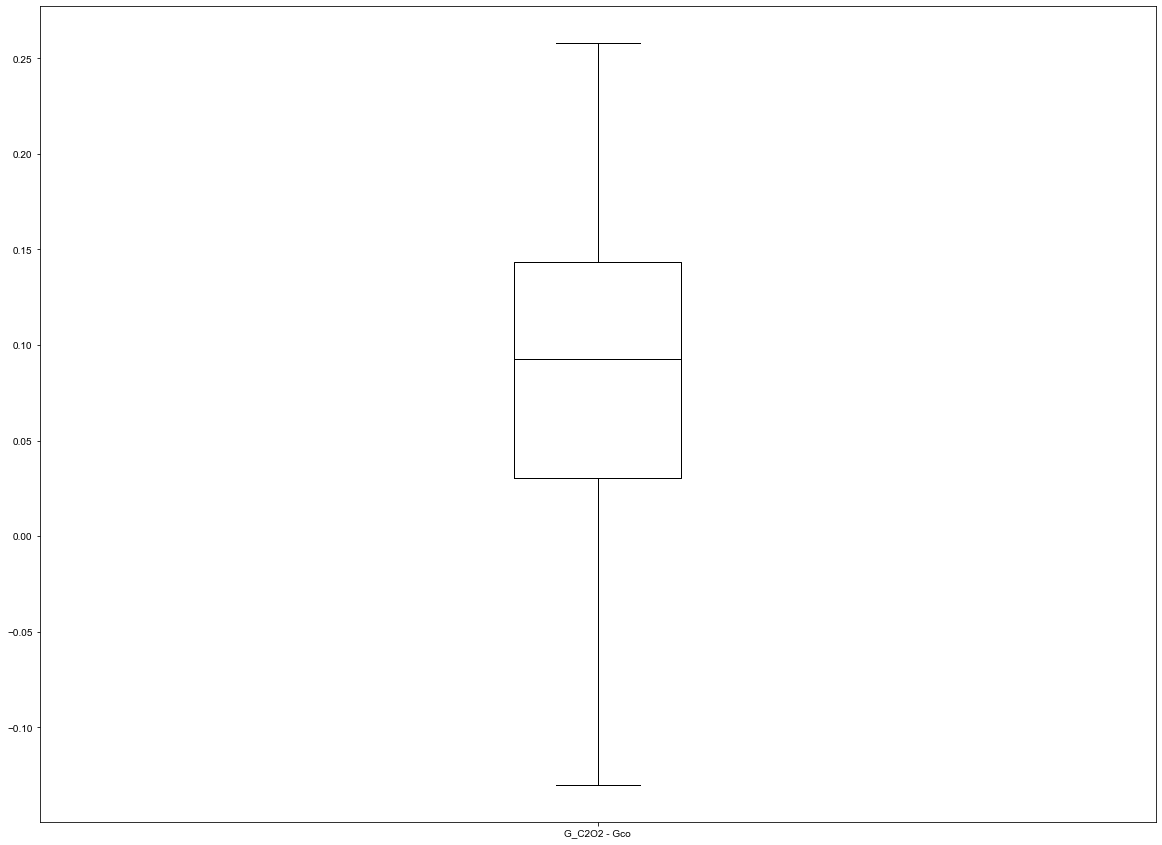

In [17]:
final_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='G_C2O2 - Gco', grid=False, figsize=(20, 15));

# 3. Machine Learning

## Feature Selection and Performance Testing

### Round 1

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instantiate regressor algorithms
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = XGBRegressor(random_state=42)
light = LGBMRegressor(random_state=42)

regressors = [GBR, KNR, RFR, SR, ridge, xgbr, light]

In [19]:
# Create an empty df to save the results of each regressor for each round of feature removal
results_df = pd.DataFrame(columns = ['# Features', 'GBR', 'KNR', 'RFR', 'SVR', 'RR', 'XGBR', 'LightGBM', 'Time'])

In [20]:
val_score(final_df, 1, regressors, results_df)

In [21]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.0251, 0.0337]","[0.0631, 0.0759]","[0.0474, 0.0609]","[0.0738, 0.0865]","[0.071, 0.0874]","[0.031, 0.0431]","[0.0619, 0.0749]",42.991859


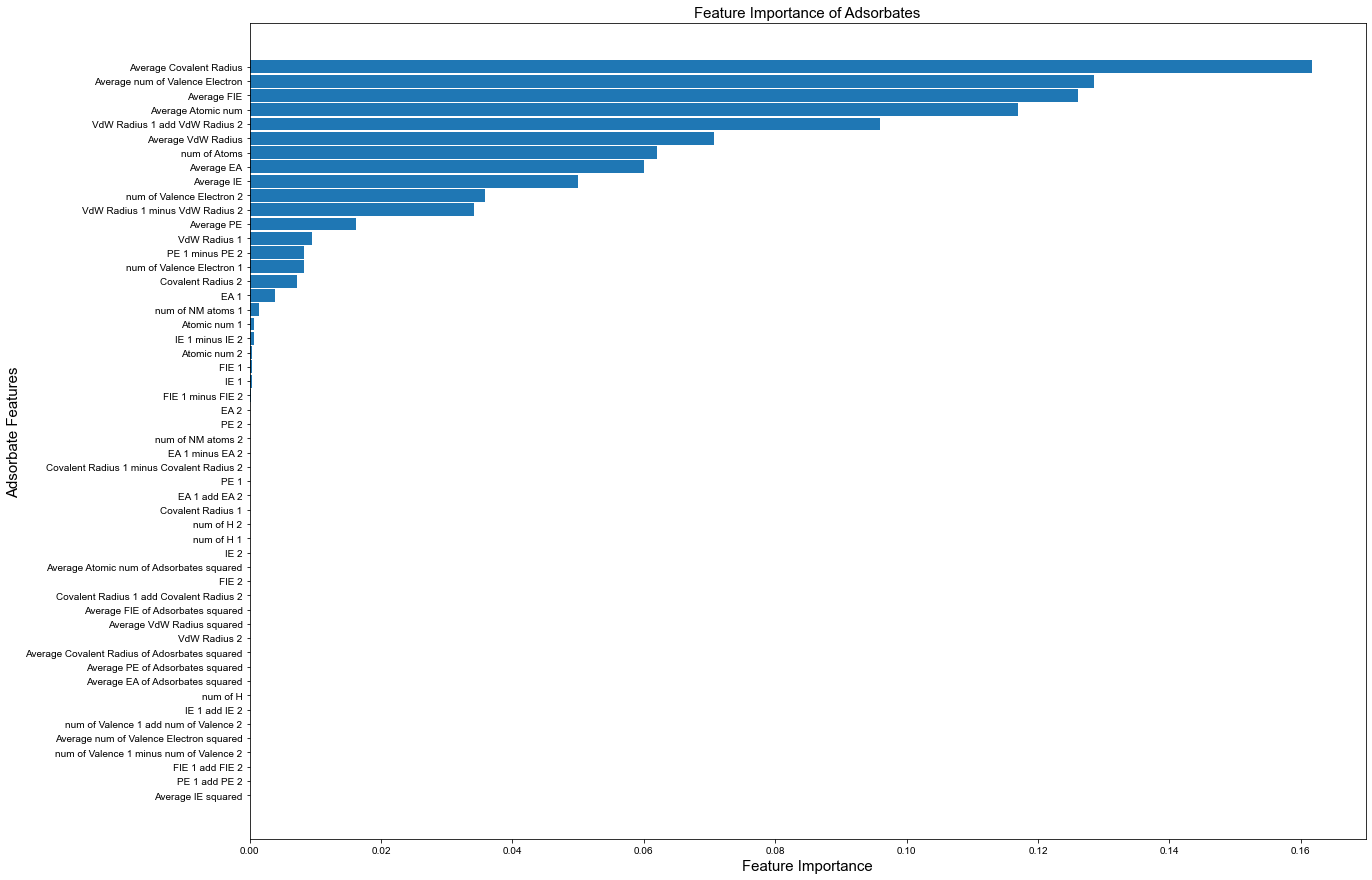

In [22]:
feature_importance(XGBRegressor(), final_df)

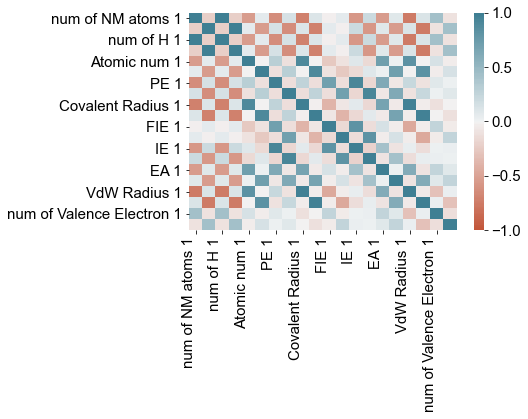

In [23]:
pearson_correlation(final_df)

### Round 2

In [24]:
# make a copy of the df from the previoud edition
df_v2 = final_df.copy()

In [25]:
# Drop the features
df_v2 = df_v2.drop(columns = ['PE 1 add PE 2',
       'Covalent Radius 1 add Covalent Radius 2','VdW Radius 1 add VdW Radius 2',
       'FIE 1 add FIE 2', 'EA 1 add EA 2',
       'num of Valence 1 add num of Valence 2',
       'IE 1 add IE 2'])

In [26]:
val_score(df_v2, 2, regressors, results_df)

In [27]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.0251, 0.0337]","[0.0631, 0.0759]","[0.0474, 0.0609]","[0.0738, 0.0865]","[0.071, 0.0874]","[0.031, 0.0431]","[0.0619, 0.0749]",42.991859
2,45,"[0.0258, 0.0347]","[0.0629, 0.0757]","[0.0478, 0.0613]","[0.0738, 0.0865]","[0.0748, 0.0919]","[0.031, 0.043]","[0.0619, 0.075]",40.799988


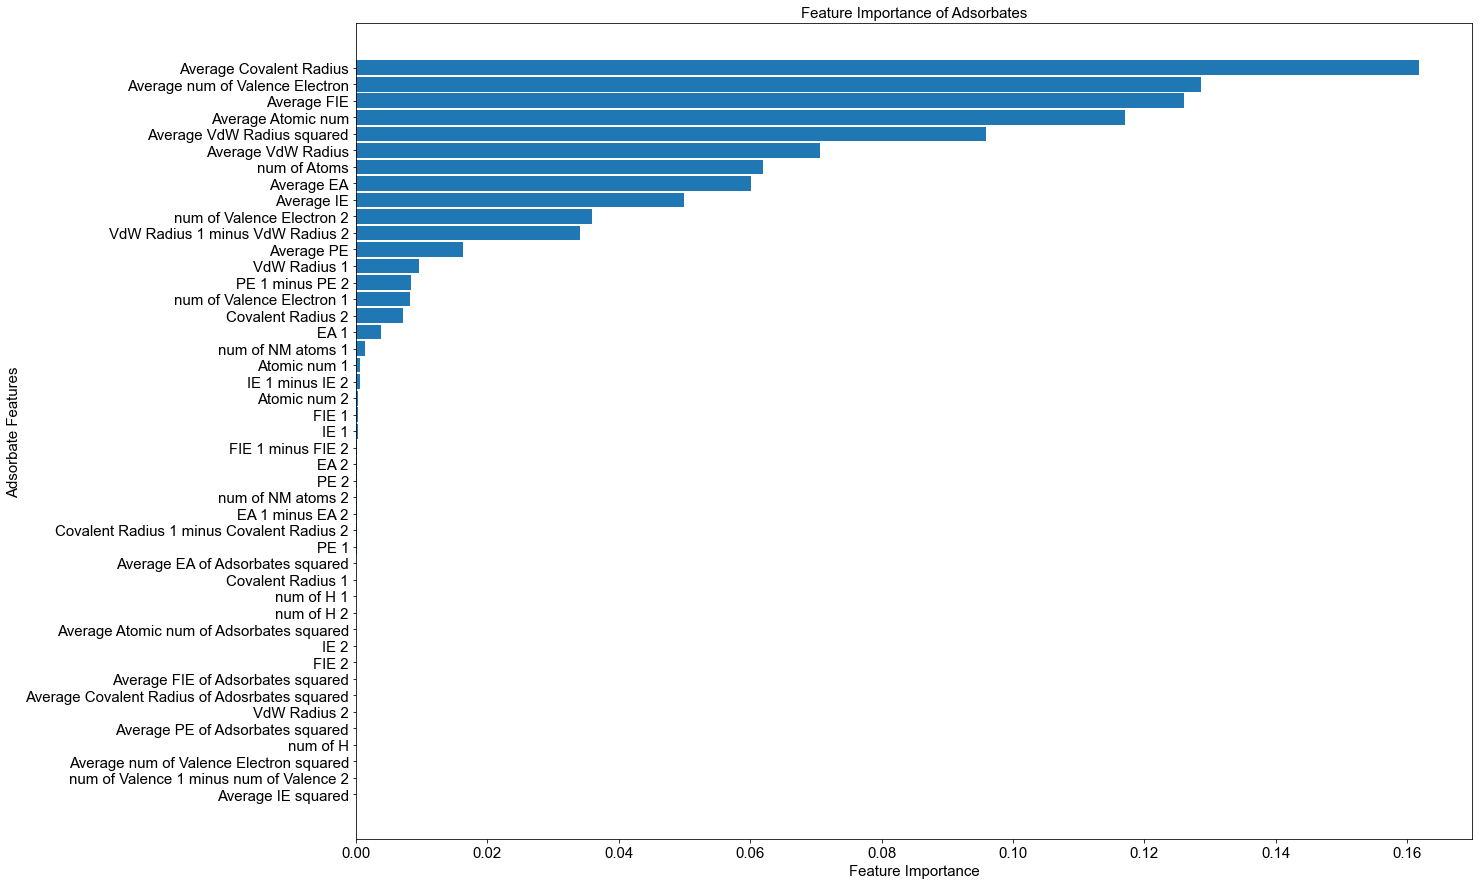

In [28]:
feature_importance(XGBRegressor(), df_v2)

### Round 3

In [29]:
df_v3 = df_v2.copy()

In [30]:
df_v3 = df_v3.drop(columns = ['Average EA of Adsorbates squared', 'Average PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Average FIE of Adsorbates squared',
       'Average Atomic num of Adsorbates squared',
       'Average num of Valence Electron squared', 'Average IE squared'])

In [31]:
val_score(df_v3, 3, regressors, results_df)

In [32]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.0251, 0.0337]","[0.0631, 0.0759]","[0.0474, 0.0609]","[0.0738, 0.0865]","[0.071, 0.0874]","[0.031, 0.0431]","[0.0619, 0.0749]",42.991859
2,45,"[0.0258, 0.0347]","[0.0629, 0.0757]","[0.0478, 0.0613]","[0.0738, 0.0865]","[0.0748, 0.0919]","[0.031, 0.043]","[0.0619, 0.075]",40.799988
3,38,"[0.0264, 0.0355]","[0.0731, 0.0836]","[0.0485, 0.0621]","[0.0789, 0.0927]","[0.0767, 0.0945]","[0.031, 0.043]","[0.0619, 0.0752]",38.745512


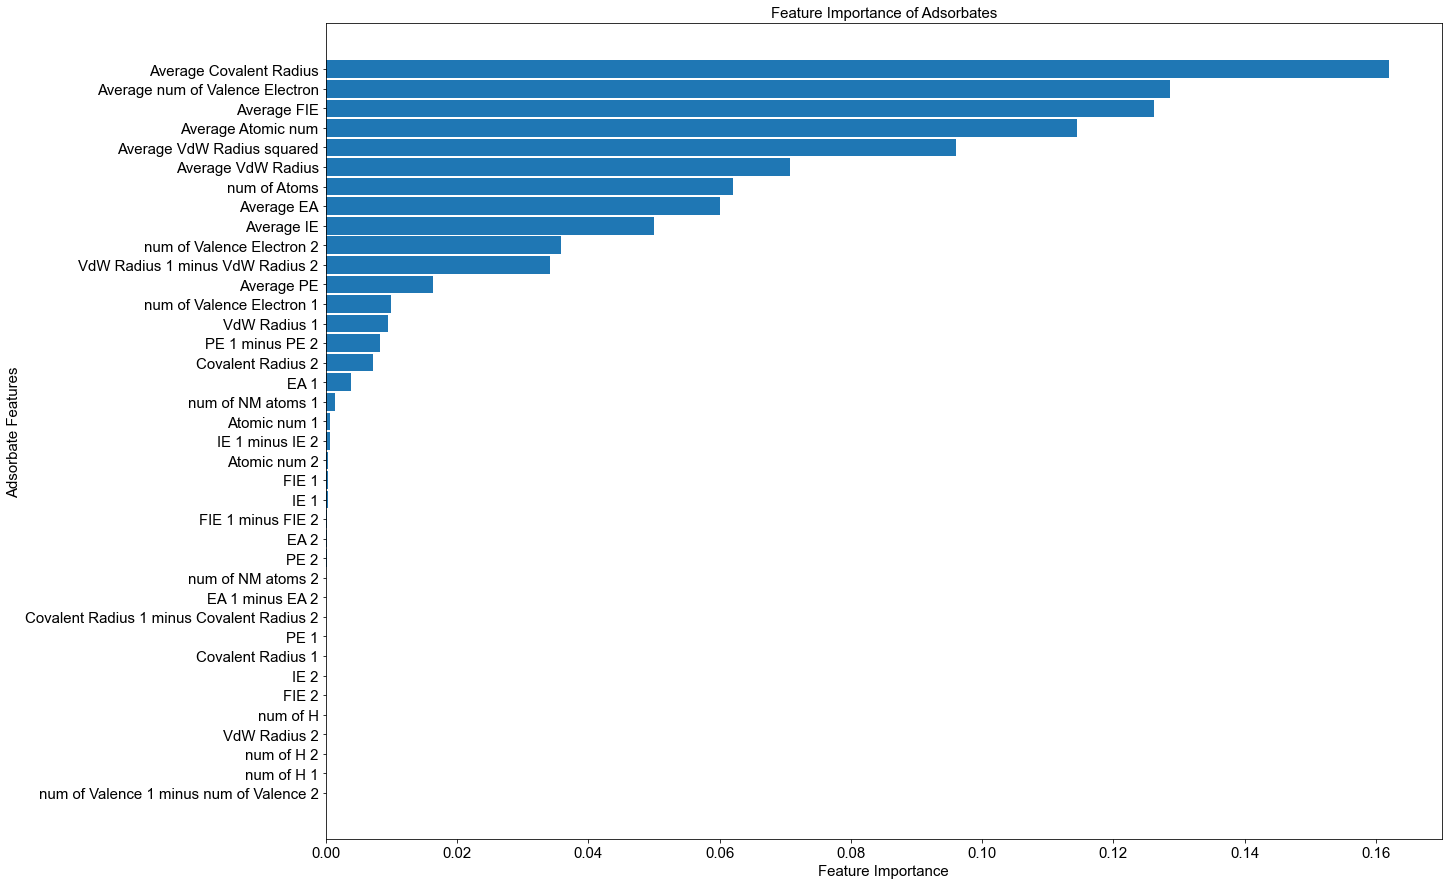

In [33]:
feature_importance(XGBRegressor(), df_v3)

### Round 4

In [34]:
df_v4 = df_v3.copy()

In [35]:
df_v4 = df_v4.drop(columns = ['num of H 1', 'num of H 2', 'num of H', 'FIE 1',
       'FIE 2', 'IE 1', 'IE 2', 'PE 1', 'PE 2'])

In [36]:
val_score(df_v4, 4, regressors, results_df)

In [37]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.0251, 0.0337]","[0.0631, 0.0759]","[0.0474, 0.0609]","[0.0738, 0.0865]","[0.071, 0.0874]","[0.031, 0.0431]","[0.0619, 0.0749]",42.991859
2,45,"[0.0258, 0.0347]","[0.0629, 0.0757]","[0.0478, 0.0613]","[0.0738, 0.0865]","[0.0748, 0.0919]","[0.031, 0.043]","[0.0619, 0.075]",40.799988
3,38,"[0.0264, 0.0355]","[0.0731, 0.0836]","[0.0485, 0.0621]","[0.0789, 0.0927]","[0.0767, 0.0945]","[0.031, 0.043]","[0.0619, 0.0752]",38.745512
4,29,"[0.0253, 0.0342]","[0.0736, 0.0853]","[0.0472, 0.0607]","[0.0791, 0.0929]","[0.0763, 0.0935]","[0.0303, 0.0426]","[0.0606, 0.0733]",36.495441


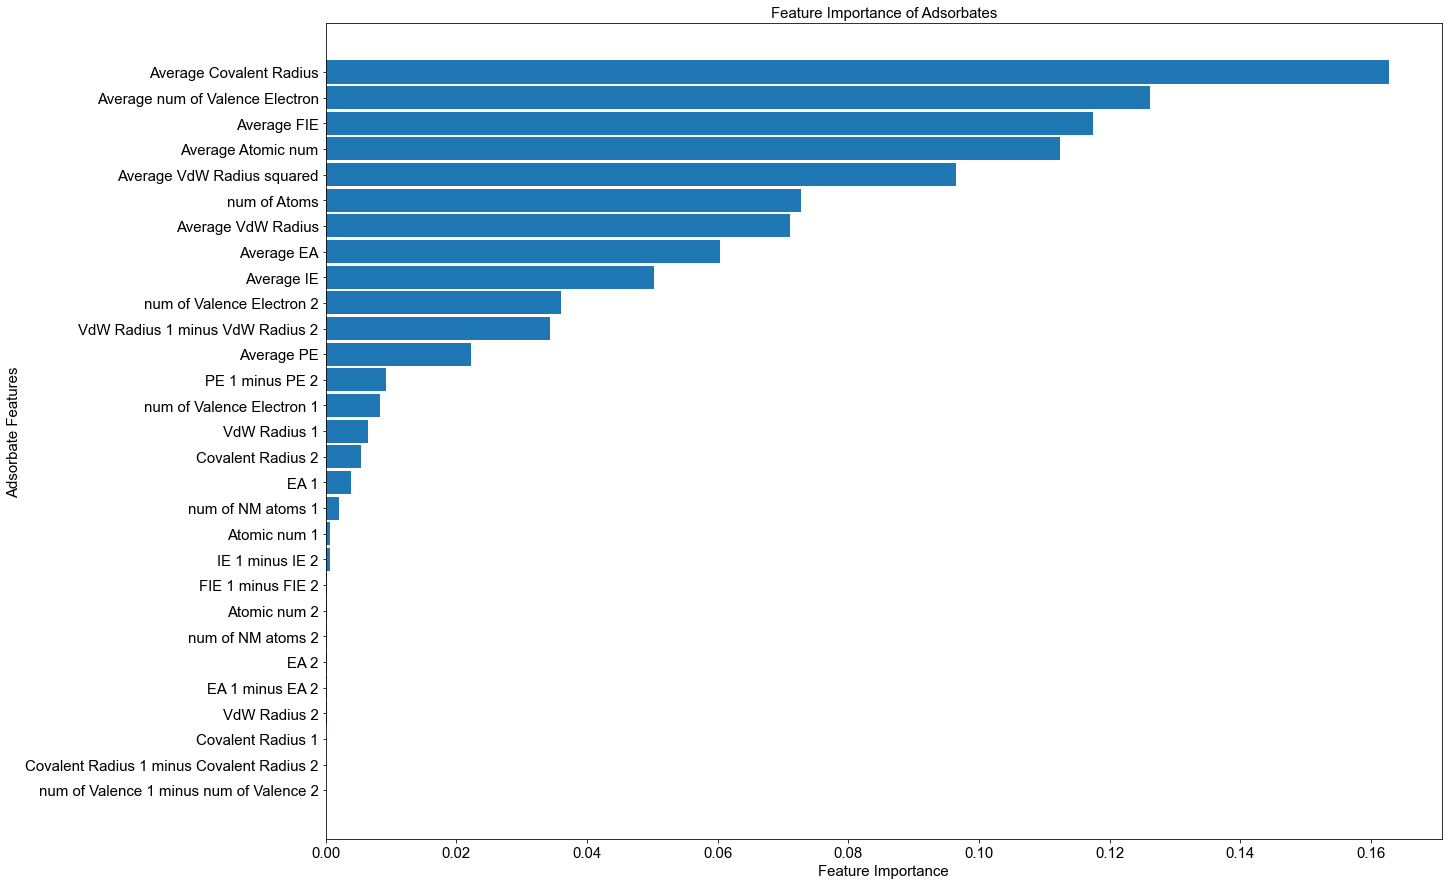

In [38]:
feature_importance(XGBRegressor(), df_v4)

### Round 5

In [265]:
df_v5 = df_v4.copy()

In [266]:
df_v5 = df_v5.drop(columns = ['Average VdW Radius squared', 'Atomic num 1', 'Atomic num 2', 
                              'FIE 1 minus FIE 2', 'EA 1', 'EA 2', 'num of NM atoms 1', 'num of NM atoms 2', 'Covalent Radius 1',
                              'Covalent Radius 2'])

In [267]:
val_score(df_v5, 5, regressors, results_df)

C:\Users\wdh\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [268]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.0251, 0.0337]","[0.0631, 0.0759]","[0.0474, 0.0609]","[0.0738, 0.0865]","[0.071, 0.0874]","[0.031, 0.0431]","[0.0619, 0.0749]",42.991859
2,45,"[0.0258, 0.0347]","[0.0629, 0.0757]","[0.0478, 0.0613]","[0.0738, 0.0865]","[0.0748, 0.0919]","[0.031, 0.043]","[0.0619, 0.075]",40.799988
3,38,"[0.0264, 0.0355]","[0.0731, 0.0836]","[0.0485, 0.0621]","[0.0789, 0.0927]","[0.0767, 0.0945]","[0.031, 0.043]","[0.0619, 0.0752]",38.745512
4,29,"[0.0253, 0.0342]","[0.0736, 0.0853]","[0.0472, 0.0607]","[0.0791, 0.0929]","[0.0763, 0.0935]","[0.0303, 0.0426]","[0.0606, 0.0733]",36.495441
5,19,"[0.0228, 0.0311]","[0.0703, 0.0837]","[0.0446, 0.0577]","[0.0775, 0.0915]","[0.0746, 0.0905]","[0.0252, 0.0363]","[0.0599, 0.0722]",33.713251
6,8,"[0.0274, 0.0376]","[0.0691, 0.0849]","[0.0422, 0.055]","[0.0756, 0.0889]","[0.0699, 0.0848]","[0.0256, 0.0371]","[0.0628, 0.0775]",30.936103
7,7,"[0.0294, 0.0384]","[0.0698, 0.0854]","[0.0451, 0.0567]","[0.0779, 0.0929]","[0.0724, 0.0856]","[0.026, 0.0368]","[0.0672, 0.0825]",30.603018
8,6,"[0.0275, 0.0365]","[0.0761, 0.0918]","[0.0445, 0.0556]","[0.0802, 0.1002]","[0.0683, 0.0866]","[0.0223, 0.0308]","[0.0634, 0.079]",30.224880
9,5,"[0.0208, 0.0277]","[0.0694, 0.0825]","[0.0398, 0.0484]","[0.0795, 0.0989]","[0.0668, 0.0848]","[0.017, 0.0248]","[0.0629, 0.0784]",29.671831
10,4,"[0.0225, 0.0324]","[0.075, 0.0899]","[0.0401, 0.0515]","[0.0771, 0.0973]","[0.0665, 0.0846]","[0.0177, 0.0274]","[0.0638, 0.0803]",29.468156


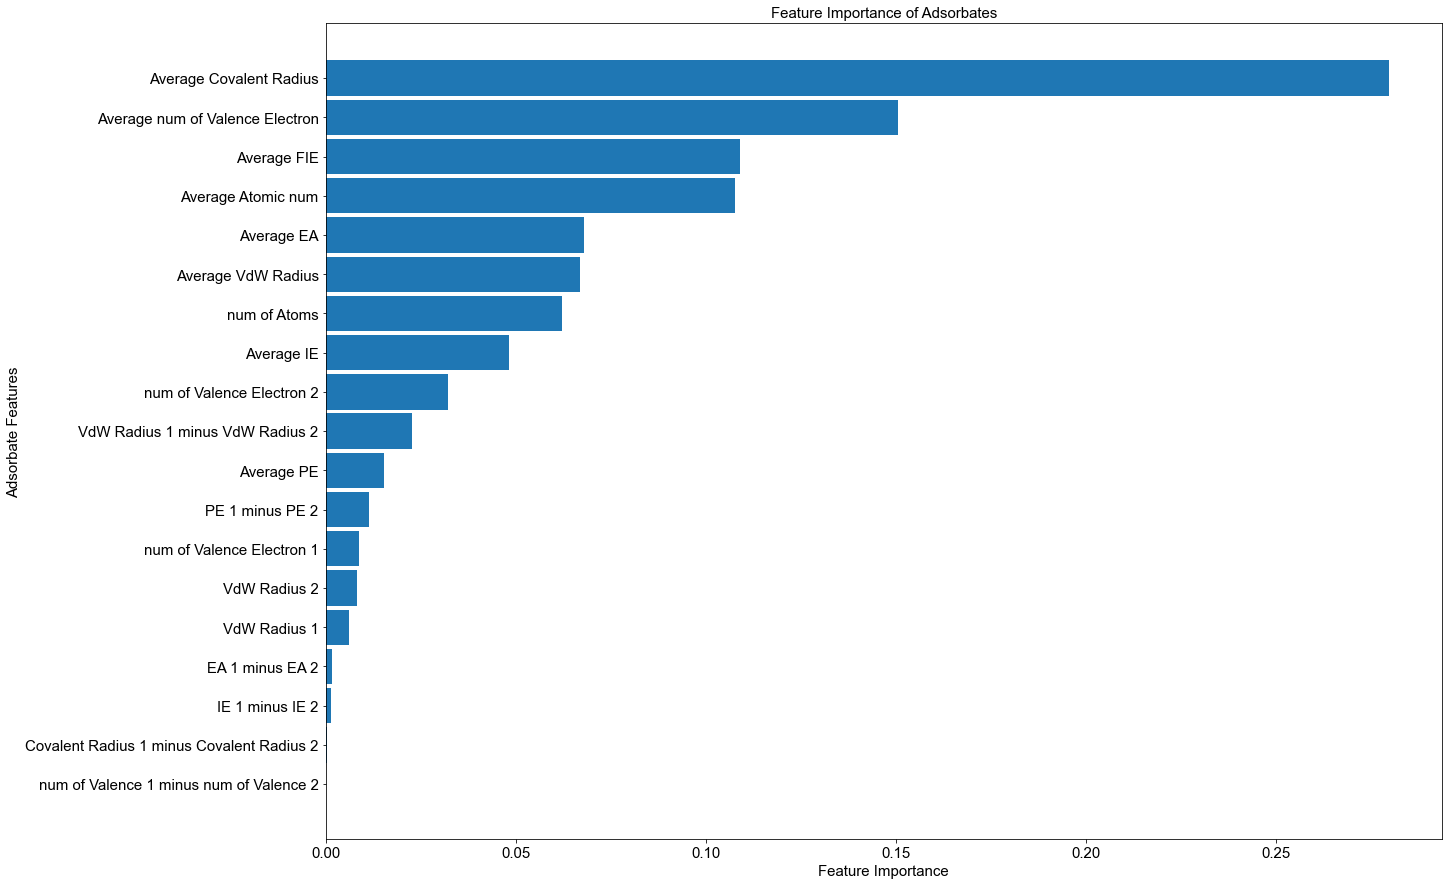

In [269]:
feature_importance(XGBRegressor(), df_v5)

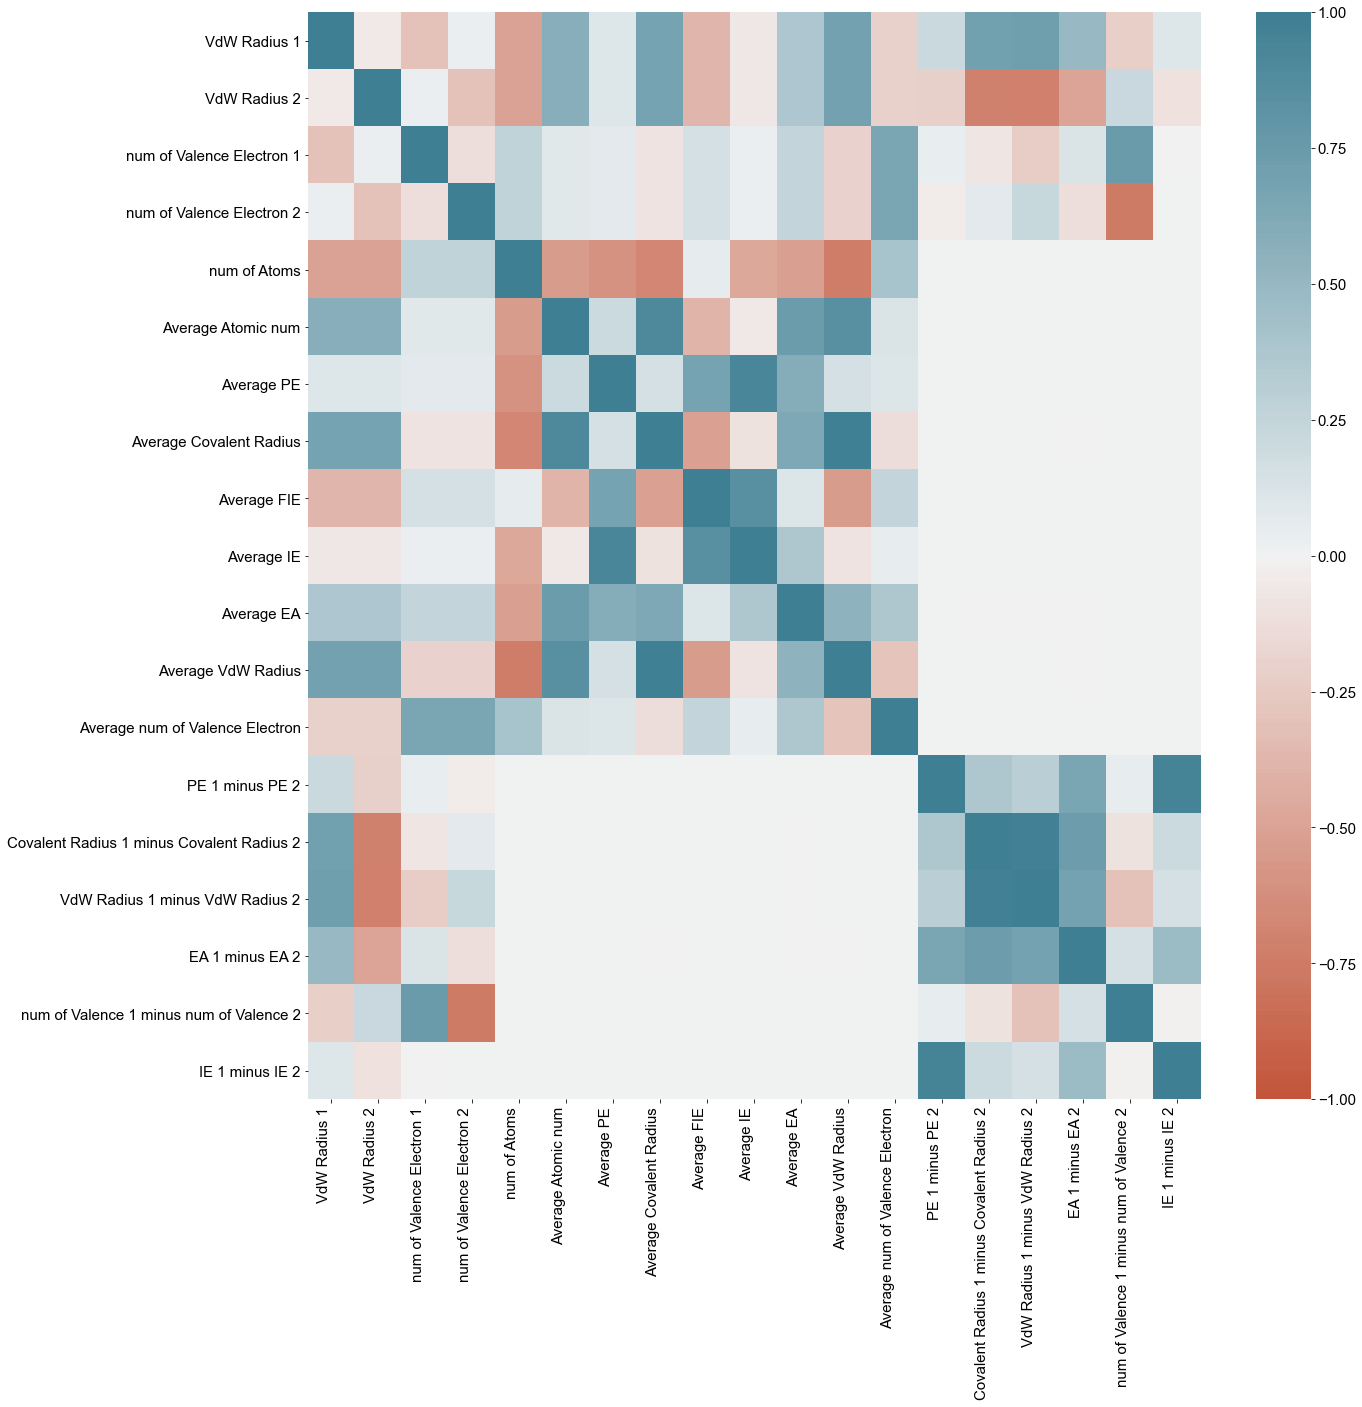

In [270]:
pearson_correlation(df_v5, last=True)

### Round 6

In [271]:
df_v6 = df_v5.copy()

In [272]:
df_v6 = df_v6.drop(columns = ['num of Atoms', 'VdW Radius 1 minus VdW Radius 2', 'Average FIE', 'IE 1 minus IE 2', 'VdW Radius 2',
                              'num of Valence Electron 1', 'num of Valence Electron 2', 'VdW Radius 1',
                              'Average Atomic num', 'Average VdW Radius', 'Average PE'])

In [273]:
val_score(df_v6, 6, regressors, results_df)

C:\Users\wdh\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [274]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.0251, 0.0337]","[0.0631, 0.0759]","[0.0474, 0.0609]","[0.0738, 0.0865]","[0.071, 0.0874]","[0.031, 0.0431]","[0.0619, 0.0749]",42.991859
2,45,"[0.0258, 0.0347]","[0.0629, 0.0757]","[0.0478, 0.0613]","[0.0738, 0.0865]","[0.0748, 0.0919]","[0.031, 0.043]","[0.0619, 0.075]",40.799988
3,38,"[0.0264, 0.0355]","[0.0731, 0.0836]","[0.0485, 0.0621]","[0.0789, 0.0927]","[0.0767, 0.0945]","[0.031, 0.043]","[0.0619, 0.0752]",38.745512
4,29,"[0.0253, 0.0342]","[0.0736, 0.0853]","[0.0472, 0.0607]","[0.0791, 0.0929]","[0.0763, 0.0935]","[0.0303, 0.0426]","[0.0606, 0.0733]",36.495441
5,19,"[0.0228, 0.0311]","[0.0703, 0.0837]","[0.0446, 0.0577]","[0.0775, 0.0915]","[0.0746, 0.0905]","[0.0252, 0.0363]","[0.0599, 0.0722]",33.713251
6,8,"[0.0311, 0.0408]","[0.0707, 0.0847]","[0.0469, 0.0593]","[0.0788, 0.094]","[0.0738, 0.0873]","[0.0269, 0.0379]","[0.0674, 0.0828]",30.533119
7,7,"[0.0294, 0.0384]","[0.0698, 0.0854]","[0.0451, 0.0567]","[0.0779, 0.0929]","[0.0724, 0.0856]","[0.026, 0.0368]","[0.0672, 0.0825]",30.603018
8,6,"[0.0275, 0.0365]","[0.0761, 0.0918]","[0.0445, 0.0556]","[0.0802, 0.1002]","[0.0683, 0.0866]","[0.0223, 0.0308]","[0.0634, 0.079]",30.224880
9,5,"[0.0208, 0.0277]","[0.0694, 0.0825]","[0.0398, 0.0484]","[0.0795, 0.0989]","[0.0668, 0.0848]","[0.017, 0.0248]","[0.0629, 0.0784]",29.671831
10,4,"[0.0225, 0.0324]","[0.075, 0.0899]","[0.0401, 0.0515]","[0.0771, 0.0973]","[0.0665, 0.0846]","[0.0177, 0.0274]","[0.0638, 0.0803]",29.468156


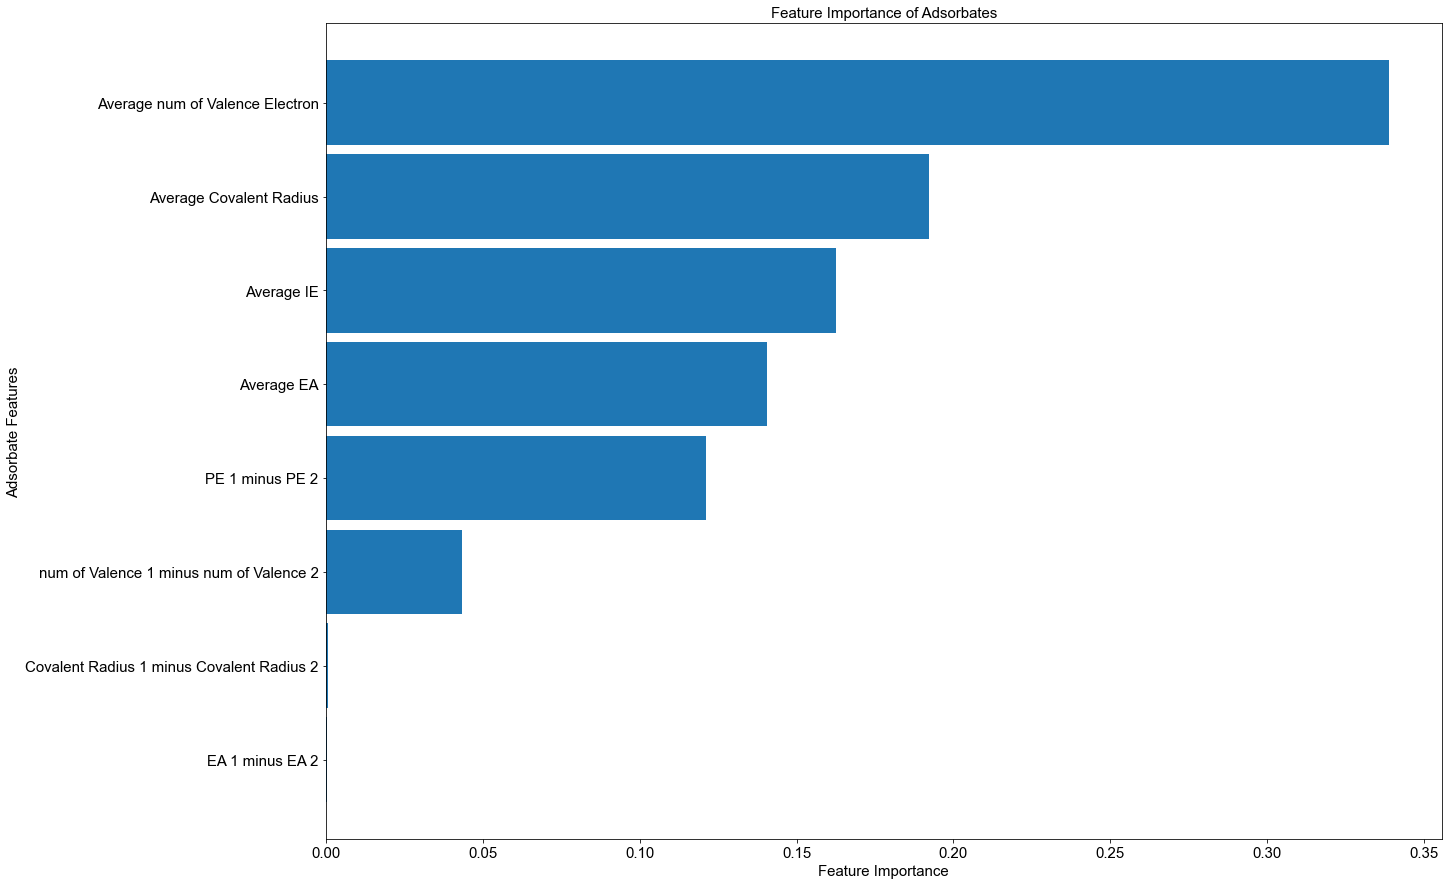

In [275]:
feature_importance(XGBRegressor(), df_v6)

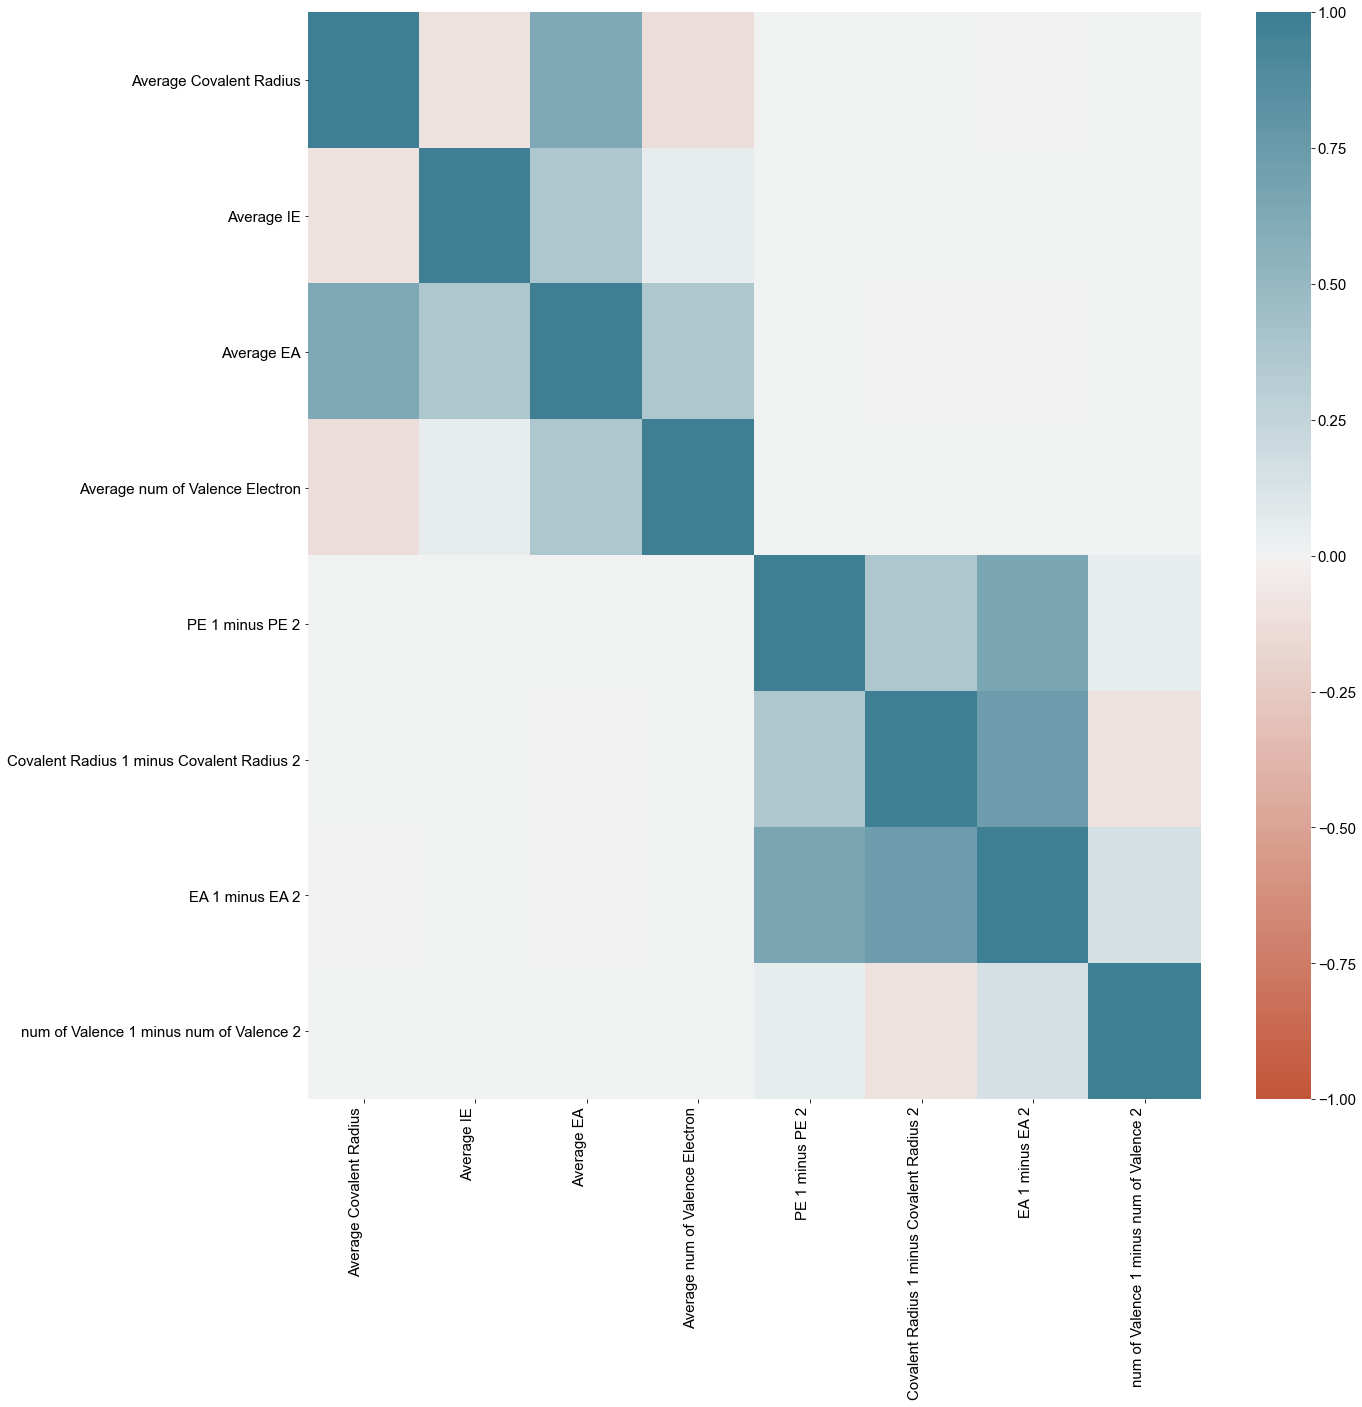

In [276]:
pearson_correlation(df_v6, last=True)

### Round 7

In [277]:
df_v7 = df_v6.copy()

In [278]:
df_v7 = df_v7.drop(columns = ['EA 1 minus EA 2'])

In [279]:
val_score(df_v7, 7, regressors, results_df)

C:\Users\wdh\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [280]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.0251, 0.0337]","[0.0631, 0.0759]","[0.0474, 0.0609]","[0.0738, 0.0865]","[0.071, 0.0874]","[0.031, 0.0431]","[0.0619, 0.0749]",42.991859
2,45,"[0.0258, 0.0347]","[0.0629, 0.0757]","[0.0478, 0.0613]","[0.0738, 0.0865]","[0.0748, 0.0919]","[0.031, 0.043]","[0.0619, 0.075]",40.799988
3,38,"[0.0264, 0.0355]","[0.0731, 0.0836]","[0.0485, 0.0621]","[0.0789, 0.0927]","[0.0767, 0.0945]","[0.031, 0.043]","[0.0619, 0.0752]",38.745512
4,29,"[0.0253, 0.0342]","[0.0736, 0.0853]","[0.0472, 0.0607]","[0.0791, 0.0929]","[0.0763, 0.0935]","[0.0303, 0.0426]","[0.0606, 0.0733]",36.495441
5,19,"[0.0228, 0.0311]","[0.0703, 0.0837]","[0.0446, 0.0577]","[0.0775, 0.0915]","[0.0746, 0.0905]","[0.0252, 0.0363]","[0.0599, 0.0722]",33.713251
6,8,"[0.0311, 0.0408]","[0.0707, 0.0847]","[0.0469, 0.0593]","[0.0788, 0.094]","[0.0738, 0.0873]","[0.0269, 0.0379]","[0.0674, 0.0828]",30.533119
7,7,"[0.0294, 0.0384]","[0.0698, 0.0854]","[0.0451, 0.0567]","[0.0779, 0.0929]","[0.0724, 0.0856]","[0.026, 0.0368]","[0.0672, 0.0825]",30.370601
8,6,"[0.0275, 0.0365]","[0.0761, 0.0918]","[0.0445, 0.0556]","[0.0802, 0.1002]","[0.0683, 0.0866]","[0.0223, 0.0308]","[0.0634, 0.079]",30.224880
9,5,"[0.0208, 0.0277]","[0.0694, 0.0825]","[0.0398, 0.0484]","[0.0795, 0.0989]","[0.0668, 0.0848]","[0.017, 0.0248]","[0.0629, 0.0784]",29.671831
10,4,"[0.0225, 0.0324]","[0.075, 0.0899]","[0.0401, 0.0515]","[0.0771, 0.0973]","[0.0665, 0.0846]","[0.0177, 0.0274]","[0.0638, 0.0803]",29.468156


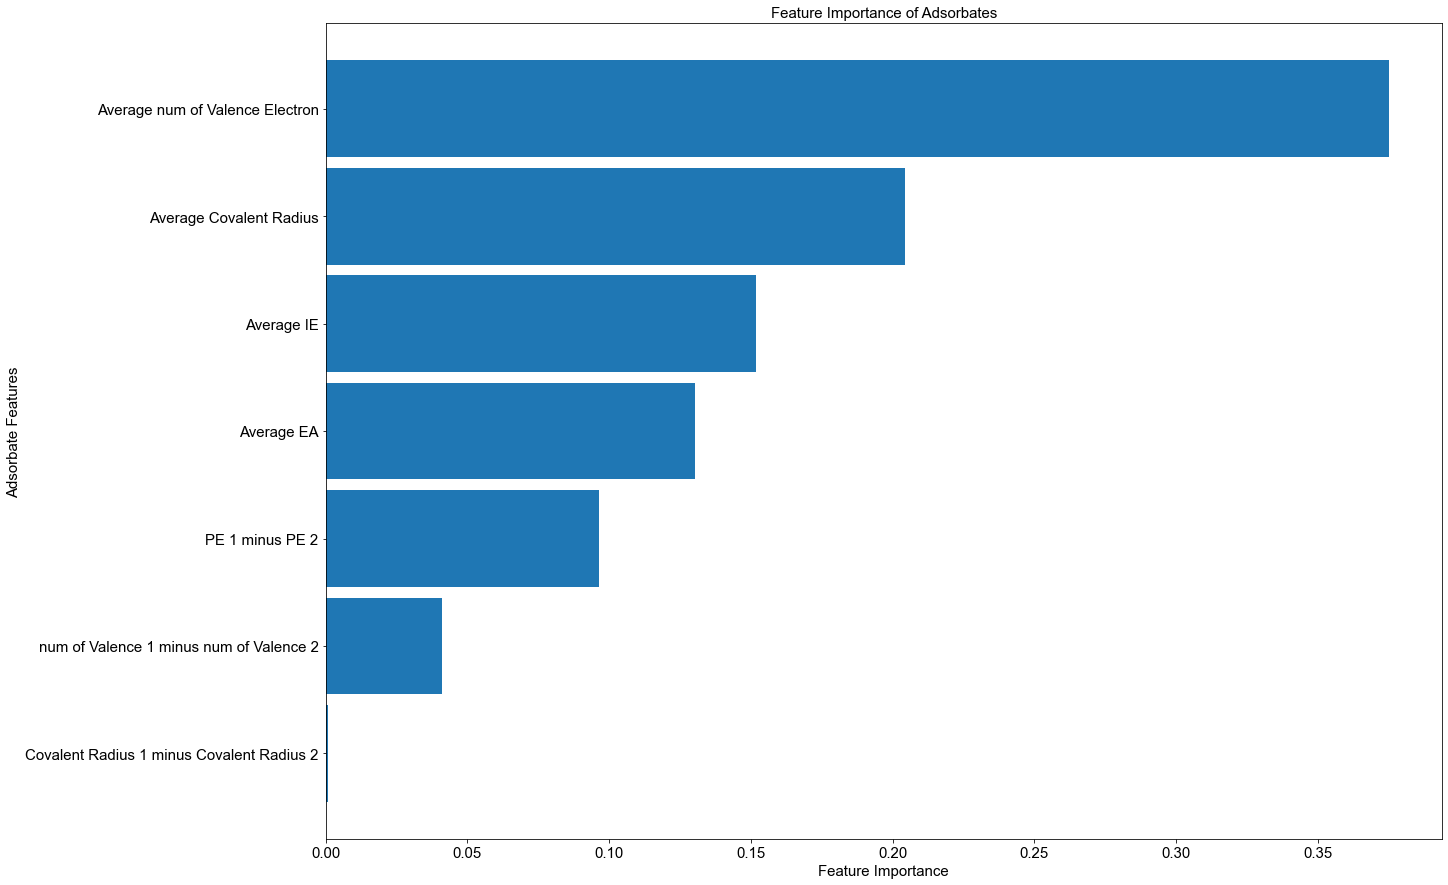

In [281]:
feature_importance(XGBRegressor(), df_v7)

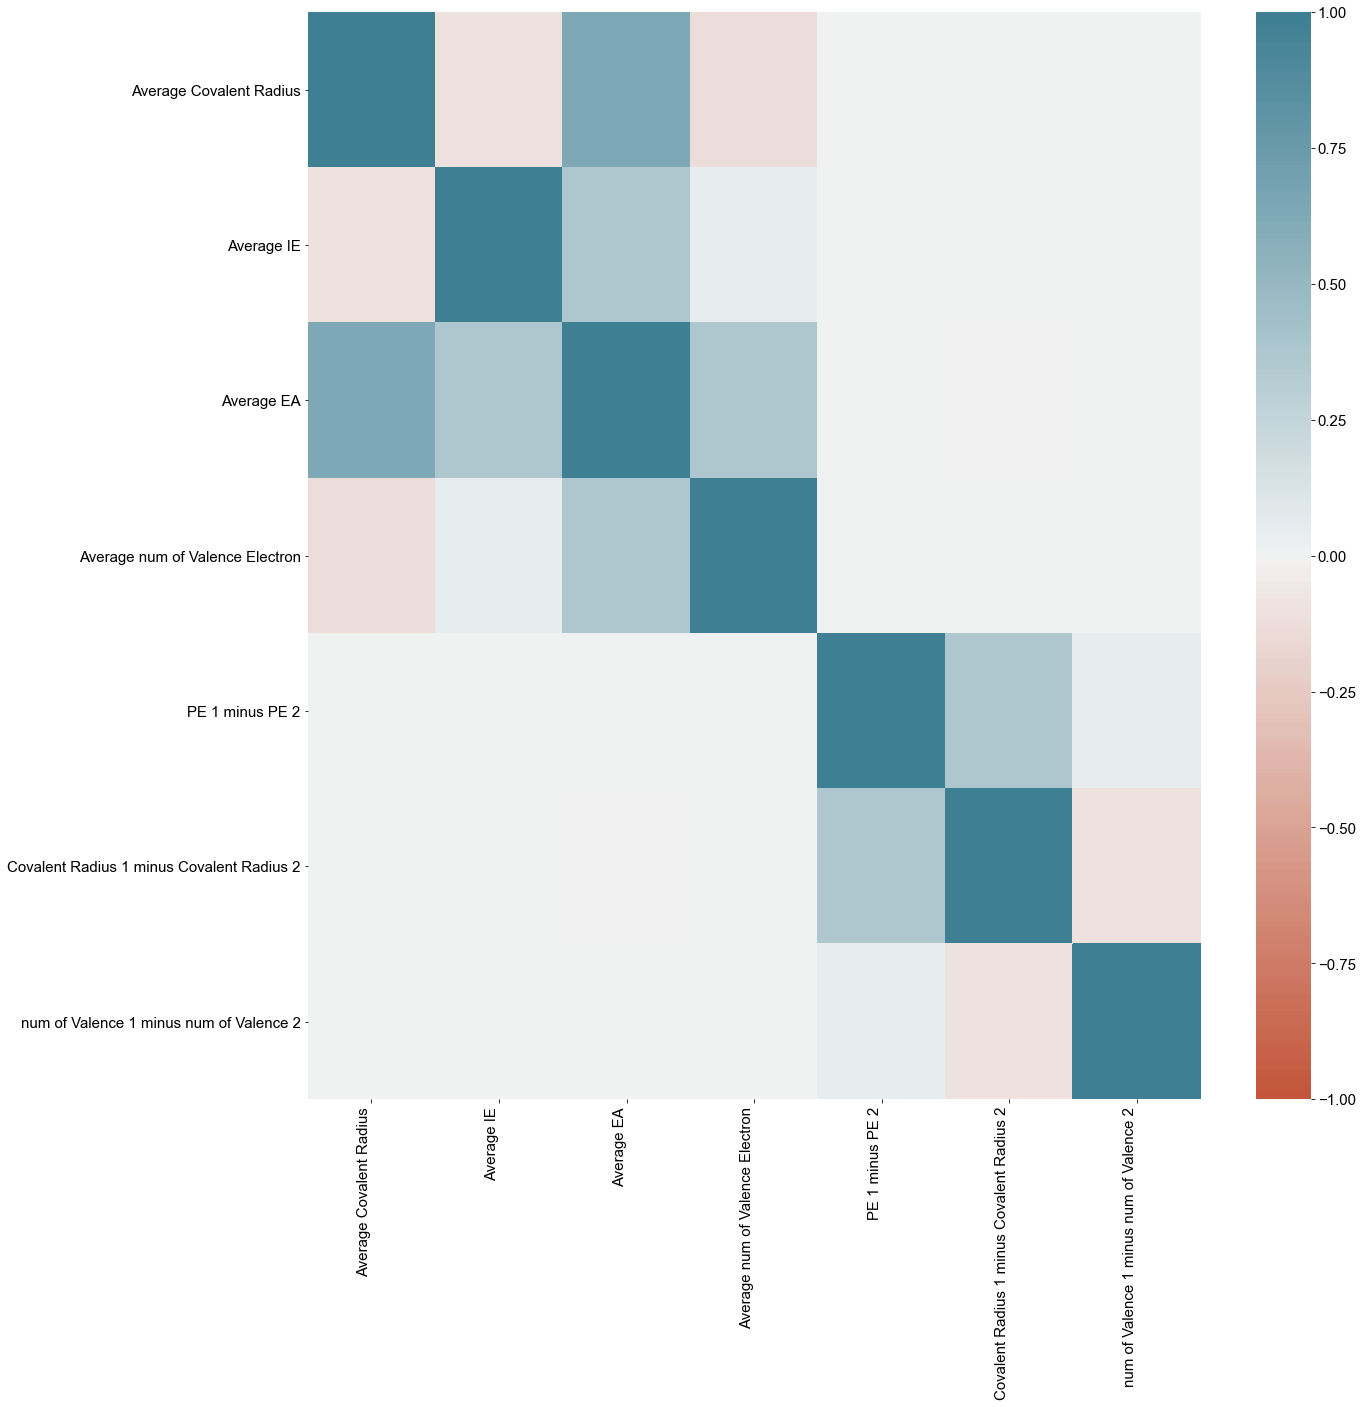

In [282]:
pearson_correlation(df_v7, last=True)

### Round 8

In [283]:
df_v8 = df_v7.copy()

In [284]:
df_v8 = df_v8.drop(columns = [ 'Average EA'])

In [285]:
val_score(df_v8, 8, regressors, results_df)

C:\Users\wdh\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [286]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.0251, 0.0337]","[0.0631, 0.0759]","[0.0474, 0.0609]","[0.0738, 0.0865]","[0.071, 0.0874]","[0.031, 0.0431]","[0.0619, 0.0749]",42.991859
2,45,"[0.0258, 0.0347]","[0.0629, 0.0757]","[0.0478, 0.0613]","[0.0738, 0.0865]","[0.0748, 0.0919]","[0.031, 0.043]","[0.0619, 0.075]",40.799988
3,38,"[0.0264, 0.0355]","[0.0731, 0.0836]","[0.0485, 0.0621]","[0.0789, 0.0927]","[0.0767, 0.0945]","[0.031, 0.043]","[0.0619, 0.0752]",38.745512
4,29,"[0.0253, 0.0342]","[0.0736, 0.0853]","[0.0472, 0.0607]","[0.0791, 0.0929]","[0.0763, 0.0935]","[0.0303, 0.0426]","[0.0606, 0.0733]",36.495441
5,19,"[0.0228, 0.0311]","[0.0703, 0.0837]","[0.0446, 0.0577]","[0.0775, 0.0915]","[0.0746, 0.0905]","[0.0252, 0.0363]","[0.0599, 0.0722]",33.713251
6,8,"[0.0311, 0.0408]","[0.0707, 0.0847]","[0.0469, 0.0593]","[0.0788, 0.094]","[0.0738, 0.0873]","[0.0269, 0.0379]","[0.0674, 0.0828]",30.533119
7,7,"[0.0294, 0.0384]","[0.0698, 0.0854]","[0.0451, 0.0567]","[0.0779, 0.0929]","[0.0724, 0.0856]","[0.026, 0.0368]","[0.0672, 0.0825]",30.370601
8,6,"[0.0275, 0.0365]","[0.0761, 0.0918]","[0.0445, 0.0556]","[0.0802, 0.1002]","[0.0683, 0.0866]","[0.0223, 0.0308]","[0.0634, 0.079]",29.980294
9,5,"[0.0208, 0.0277]","[0.0694, 0.0825]","[0.0398, 0.0484]","[0.0795, 0.0989]","[0.0668, 0.0848]","[0.017, 0.0248]","[0.0629, 0.0784]",29.671831
10,4,"[0.0225, 0.0324]","[0.075, 0.0899]","[0.0401, 0.0515]","[0.0771, 0.0973]","[0.0665, 0.0846]","[0.0177, 0.0274]","[0.0638, 0.0803]",29.468156


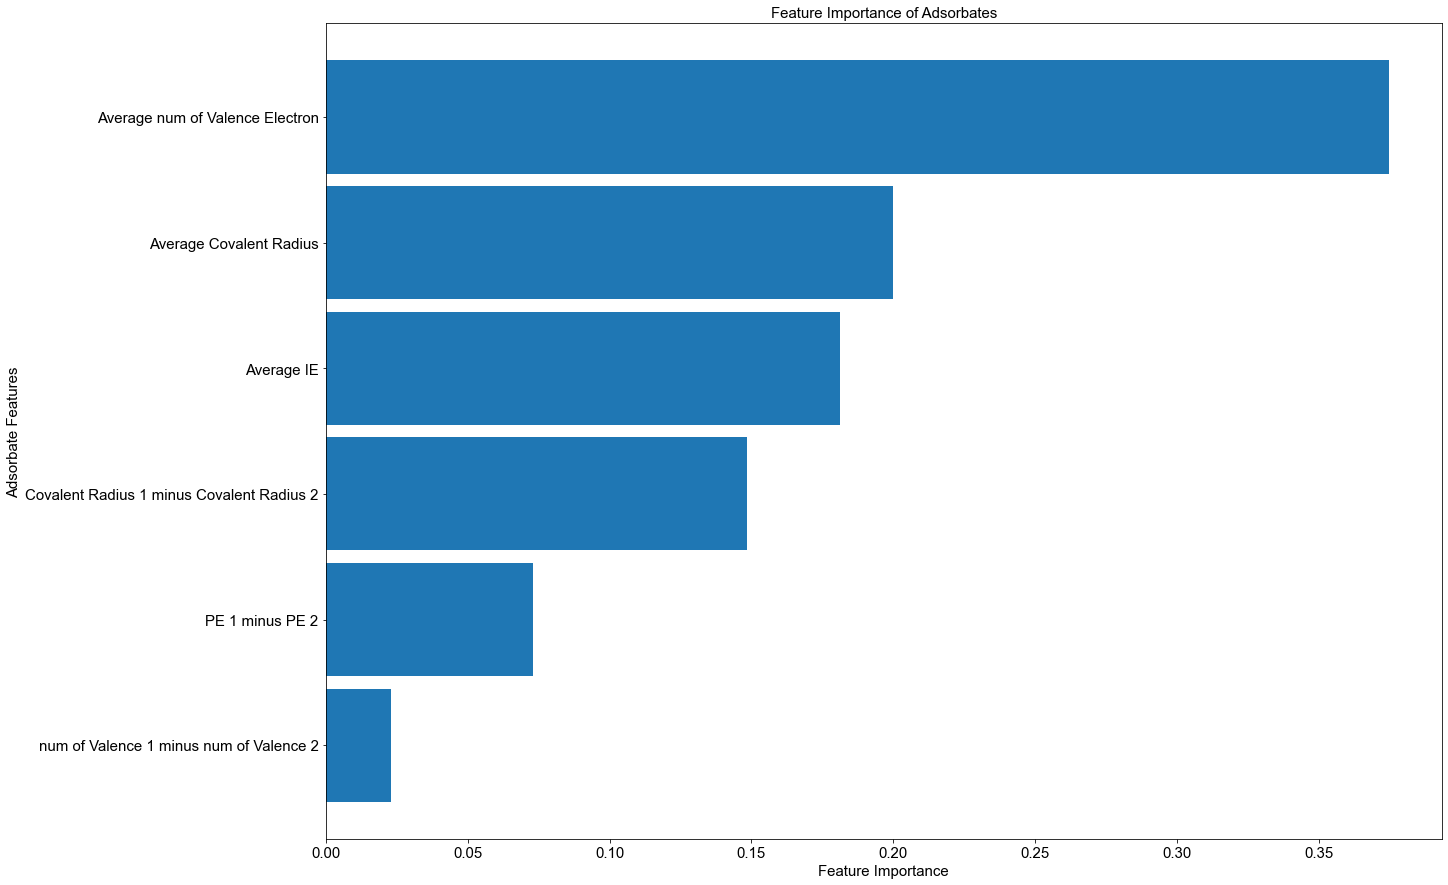

In [287]:
feature_importance(XGBRegressor(), df_v8)

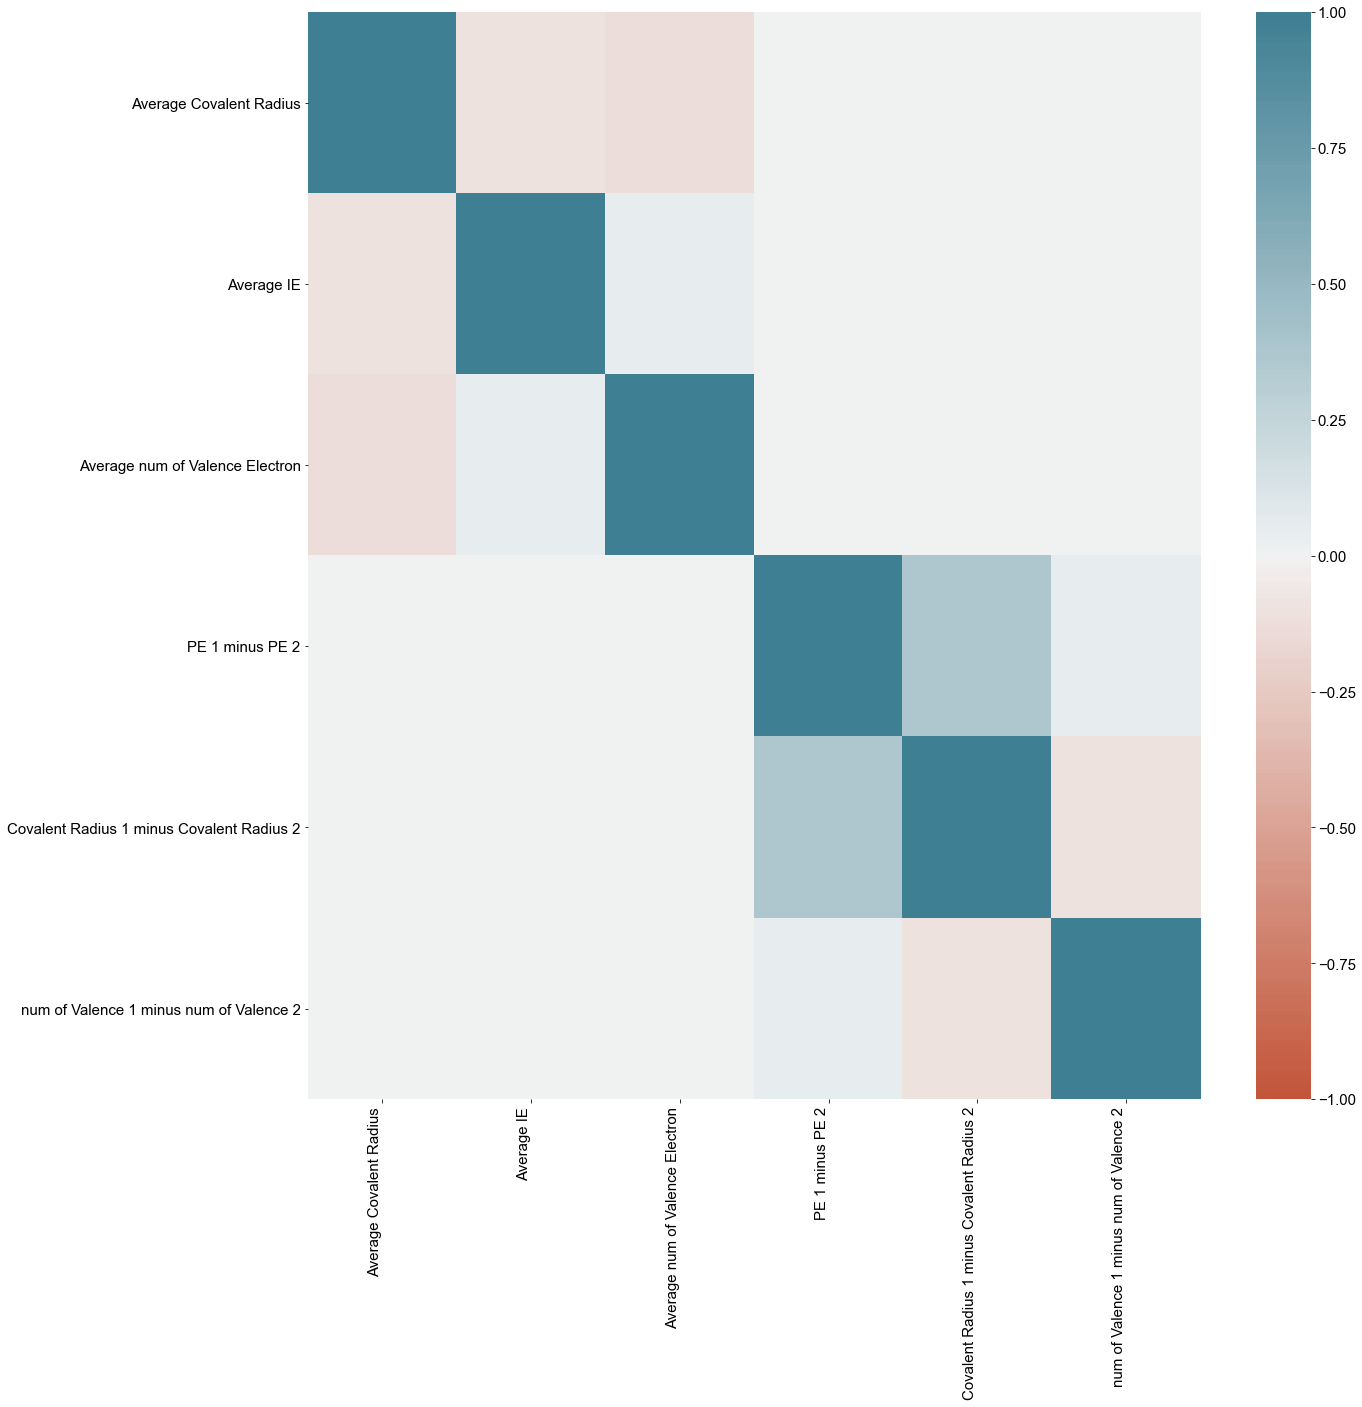

In [288]:
pearson_correlation(df_v8, last=True)

### Round 9

In [289]:
df_v9 = df_v8.copy()

In [290]:
df_v9 = df_v9.drop(columns = ['PE 1 minus PE 2'])

In [291]:
val_score(df_v9, 9, regressors, results_df)

C:\Users\wdh\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [292]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.0251, 0.0337]","[0.0631, 0.0759]","[0.0474, 0.0609]","[0.0738, 0.0865]","[0.071, 0.0874]","[0.031, 0.0431]","[0.0619, 0.0749]",42.991859
2,45,"[0.0258, 0.0347]","[0.0629, 0.0757]","[0.0478, 0.0613]","[0.0738, 0.0865]","[0.0748, 0.0919]","[0.031, 0.043]","[0.0619, 0.075]",40.799988
3,38,"[0.0264, 0.0355]","[0.0731, 0.0836]","[0.0485, 0.0621]","[0.0789, 0.0927]","[0.0767, 0.0945]","[0.031, 0.043]","[0.0619, 0.0752]",38.745512
4,29,"[0.0253, 0.0342]","[0.0736, 0.0853]","[0.0472, 0.0607]","[0.0791, 0.0929]","[0.0763, 0.0935]","[0.0303, 0.0426]","[0.0606, 0.0733]",36.495441
5,19,"[0.0228, 0.0311]","[0.0703, 0.0837]","[0.0446, 0.0577]","[0.0775, 0.0915]","[0.0746, 0.0905]","[0.0252, 0.0363]","[0.0599, 0.0722]",33.713251
6,8,"[0.0311, 0.0408]","[0.0707, 0.0847]","[0.0469, 0.0593]","[0.0788, 0.094]","[0.0738, 0.0873]","[0.0269, 0.0379]","[0.0674, 0.0828]",30.533119
7,7,"[0.0294, 0.0384]","[0.0698, 0.0854]","[0.0451, 0.0567]","[0.0779, 0.0929]","[0.0724, 0.0856]","[0.026, 0.0368]","[0.0672, 0.0825]",30.370601
8,6,"[0.0275, 0.0365]","[0.0761, 0.0918]","[0.0445, 0.0556]","[0.0802, 0.1002]","[0.0683, 0.0866]","[0.0223, 0.0308]","[0.0634, 0.079]",29.980294
9,5,"[0.0208, 0.0277]","[0.0694, 0.0825]","[0.0398, 0.0484]","[0.0795, 0.0989]","[0.0668, 0.0848]","[0.017, 0.0248]","[0.0629, 0.0784]",29.416079
10,4,"[0.0225, 0.0324]","[0.075, 0.0899]","[0.0401, 0.0515]","[0.0771, 0.0973]","[0.0665, 0.0846]","[0.0177, 0.0274]","[0.0638, 0.0803]",29.468156


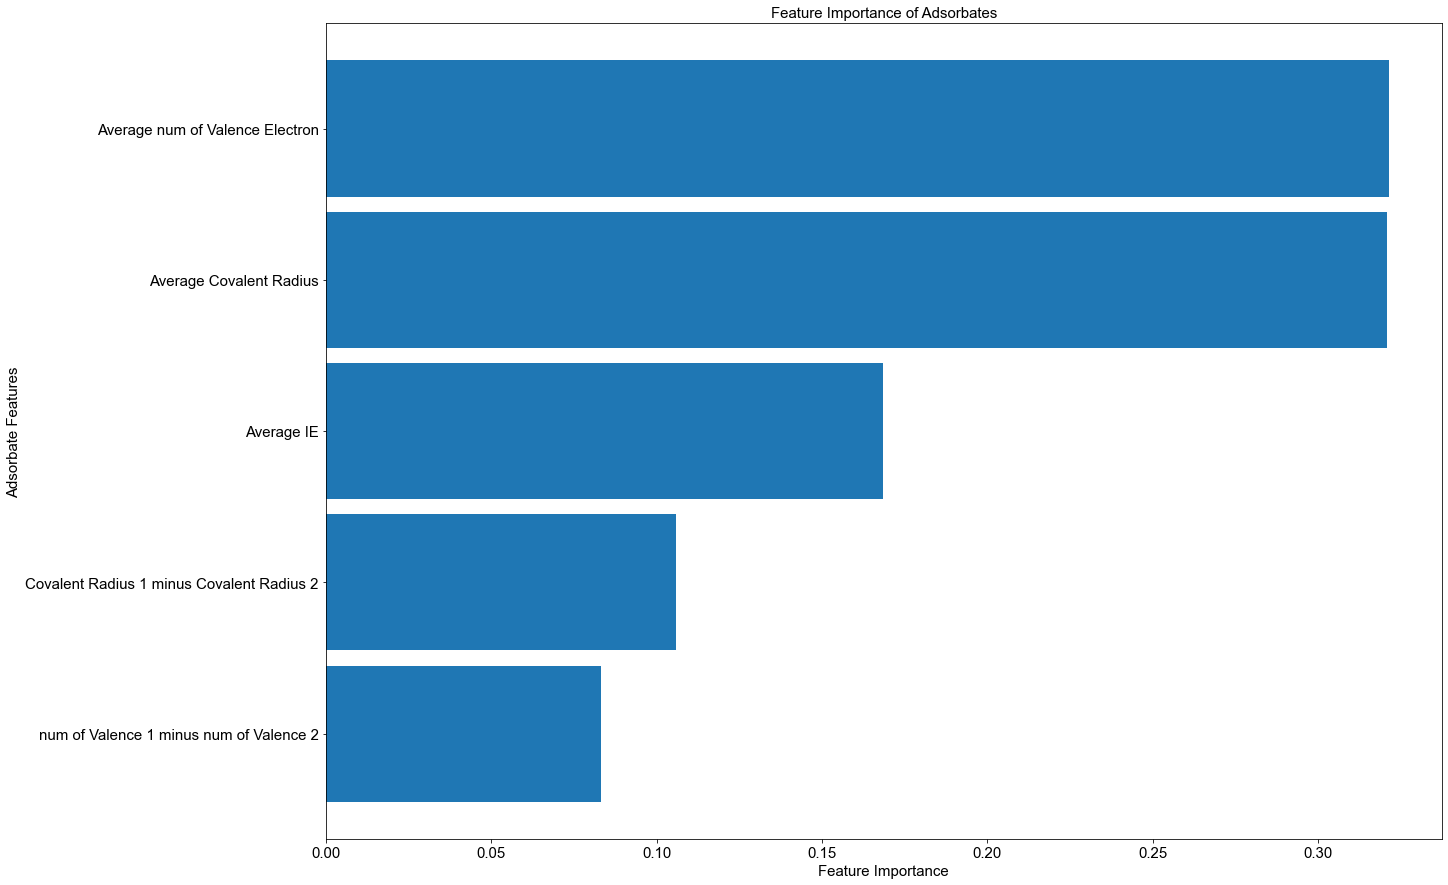

In [293]:
feature_importance(XGBRegressor(), df_v9)

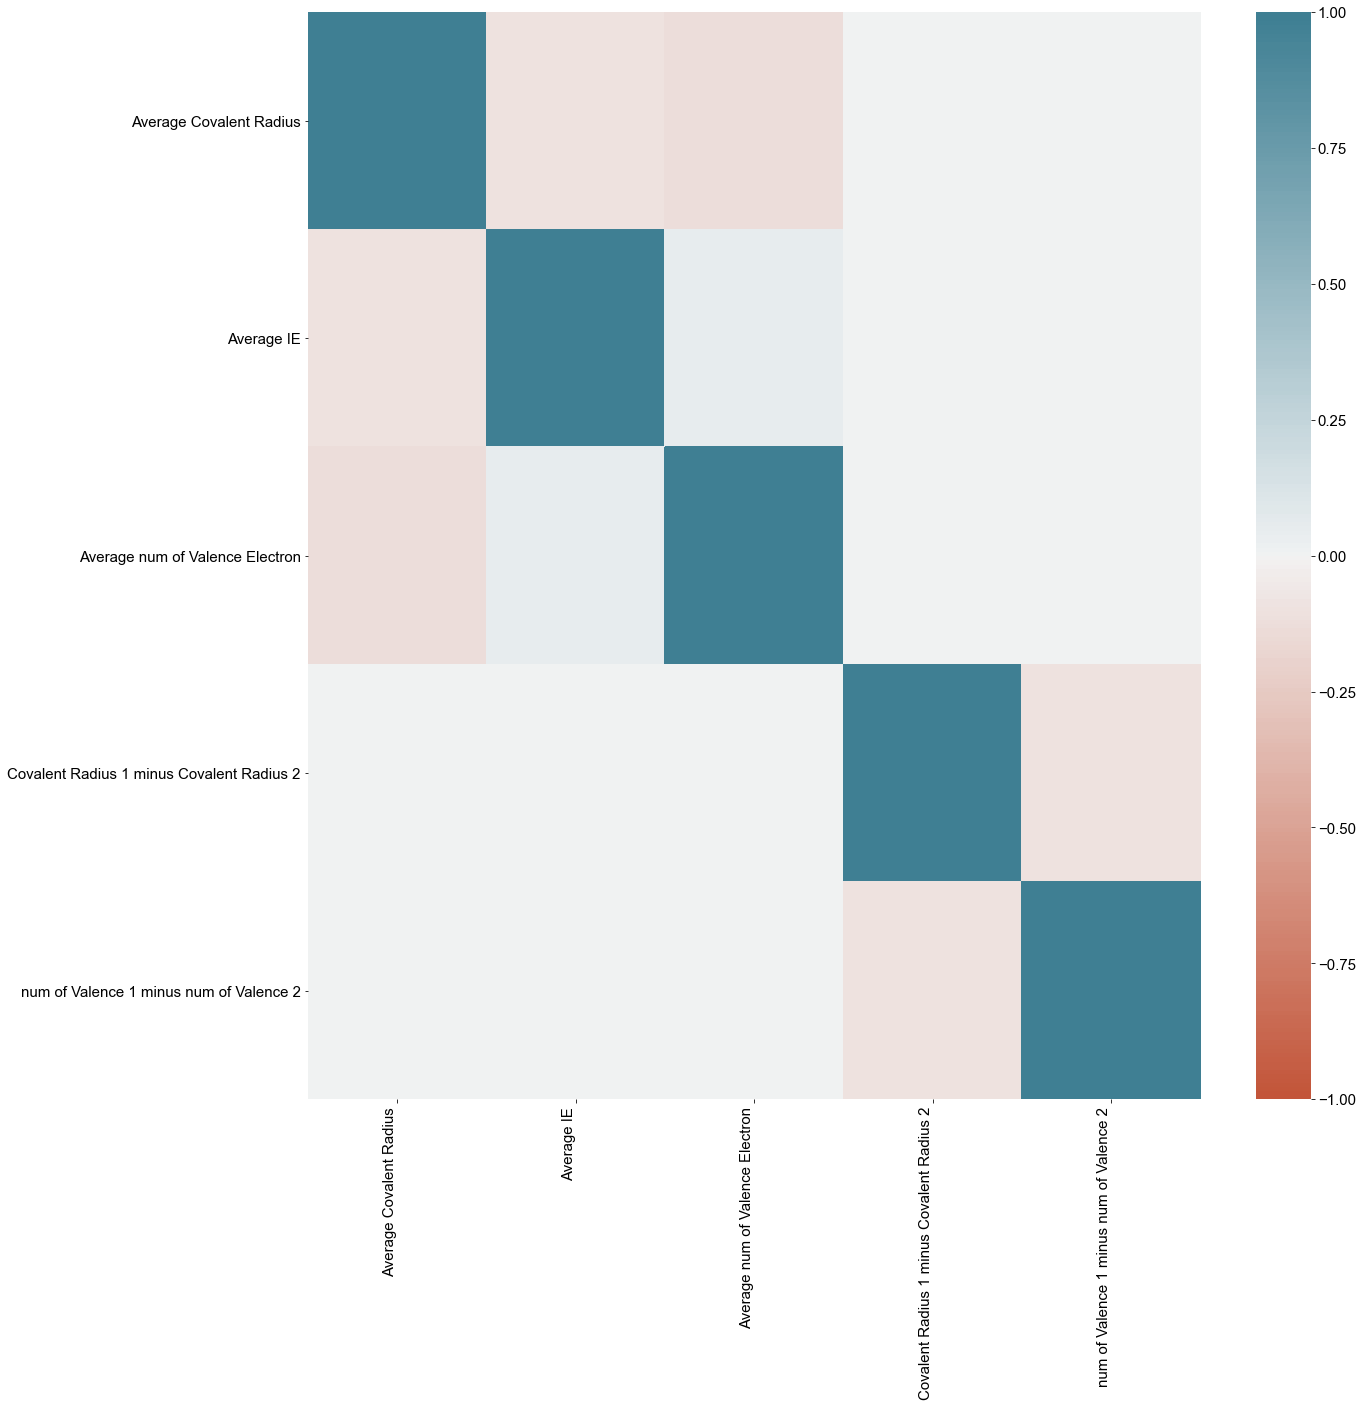

In [294]:
pearson_correlation(df_v9, last=True)

### Round 10

In [295]:
df_v10 = df_v7.copy()

In [296]:
df_v10 = df_v10.drop(columns = ['Average EA', 'Covalent Radius 1 minus Covalent Radius 2', 'num of Valence 1 minus num of Valence 2'])

In [297]:
val_score(df_v10, 10, regressors, results_df)

C:\Users\wdh\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [298]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.0251, 0.0337]","[0.0631, 0.0759]","[0.0474, 0.0609]","[0.0738, 0.0865]","[0.071, 0.0874]","[0.031, 0.0431]","[0.0619, 0.0749]",42.991859
2,45,"[0.0258, 0.0347]","[0.0629, 0.0757]","[0.0478, 0.0613]","[0.0738, 0.0865]","[0.0748, 0.0919]","[0.031, 0.043]","[0.0619, 0.075]",40.799988
3,38,"[0.0264, 0.0355]","[0.0731, 0.0836]","[0.0485, 0.0621]","[0.0789, 0.0927]","[0.0767, 0.0945]","[0.031, 0.043]","[0.0619, 0.0752]",38.745512
4,29,"[0.0253, 0.0342]","[0.0736, 0.0853]","[0.0472, 0.0607]","[0.0791, 0.0929]","[0.0763, 0.0935]","[0.0303, 0.0426]","[0.0606, 0.0733]",36.495441
5,19,"[0.0228, 0.0311]","[0.0703, 0.0837]","[0.0446, 0.0577]","[0.0775, 0.0915]","[0.0746, 0.0905]","[0.0252, 0.0363]","[0.0599, 0.0722]",33.713251
6,8,"[0.0311, 0.0408]","[0.0707, 0.0847]","[0.0469, 0.0593]","[0.0788, 0.094]","[0.0738, 0.0873]","[0.0269, 0.0379]","[0.0674, 0.0828]",30.533119
7,7,"[0.0294, 0.0384]","[0.0698, 0.0854]","[0.0451, 0.0567]","[0.0779, 0.0929]","[0.0724, 0.0856]","[0.026, 0.0368]","[0.0672, 0.0825]",30.370601
8,6,"[0.0275, 0.0365]","[0.0761, 0.0918]","[0.0445, 0.0556]","[0.0802, 0.1002]","[0.0683, 0.0866]","[0.0223, 0.0308]","[0.0634, 0.079]",29.980294
9,5,"[0.0208, 0.0277]","[0.0694, 0.0825]","[0.0398, 0.0484]","[0.0795, 0.0989]","[0.0668, 0.0848]","[0.017, 0.0248]","[0.0629, 0.0784]",29.416079
10,4,"[0.0225, 0.0324]","[0.075, 0.0899]","[0.0401, 0.0515]","[0.0771, 0.0973]","[0.0665, 0.0846]","[0.0177, 0.0274]","[0.0638, 0.0803]",29.437613


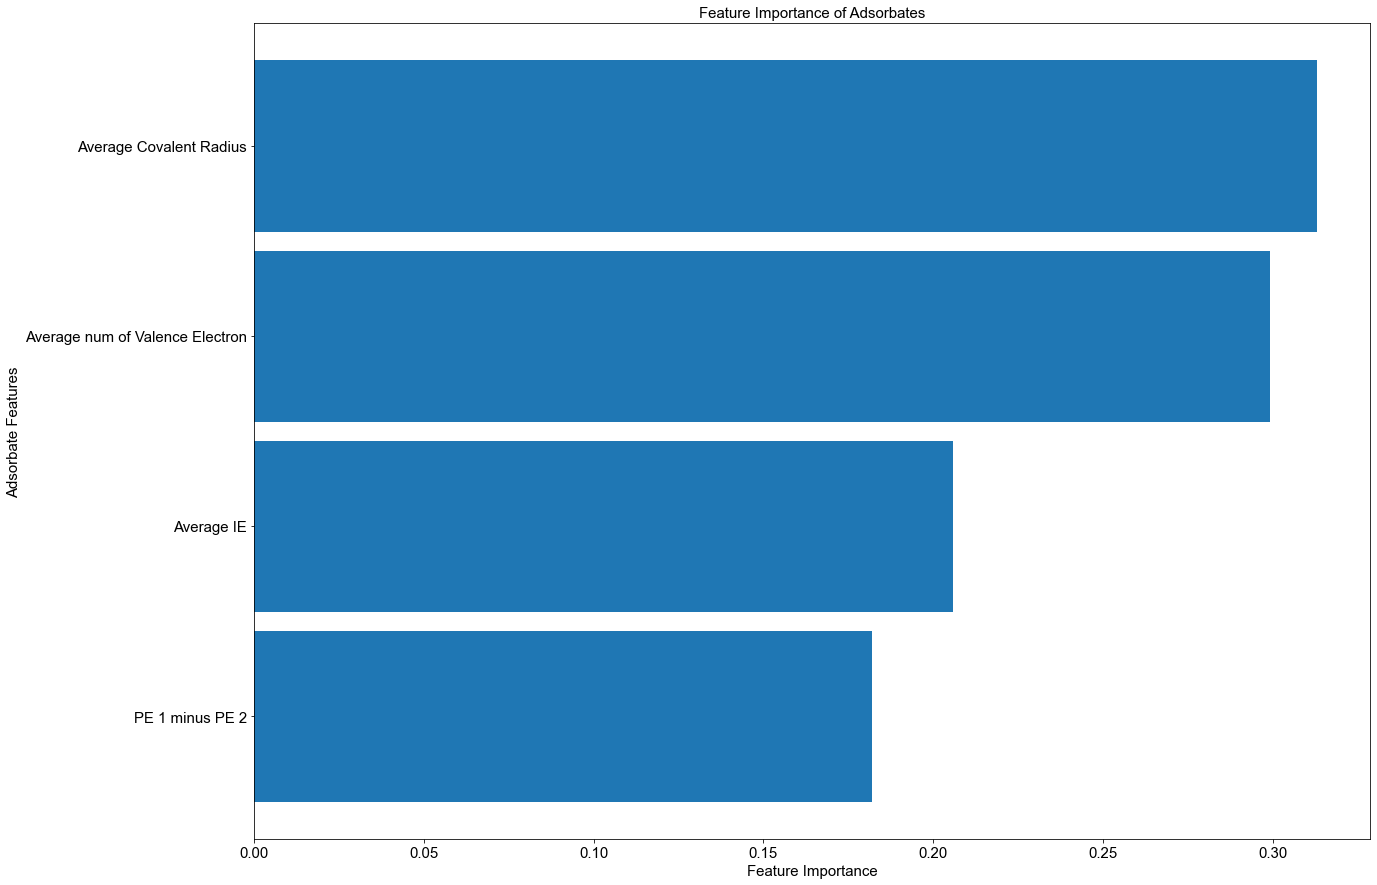

In [299]:
feature_importance(XGBRegressor(), df_v10)

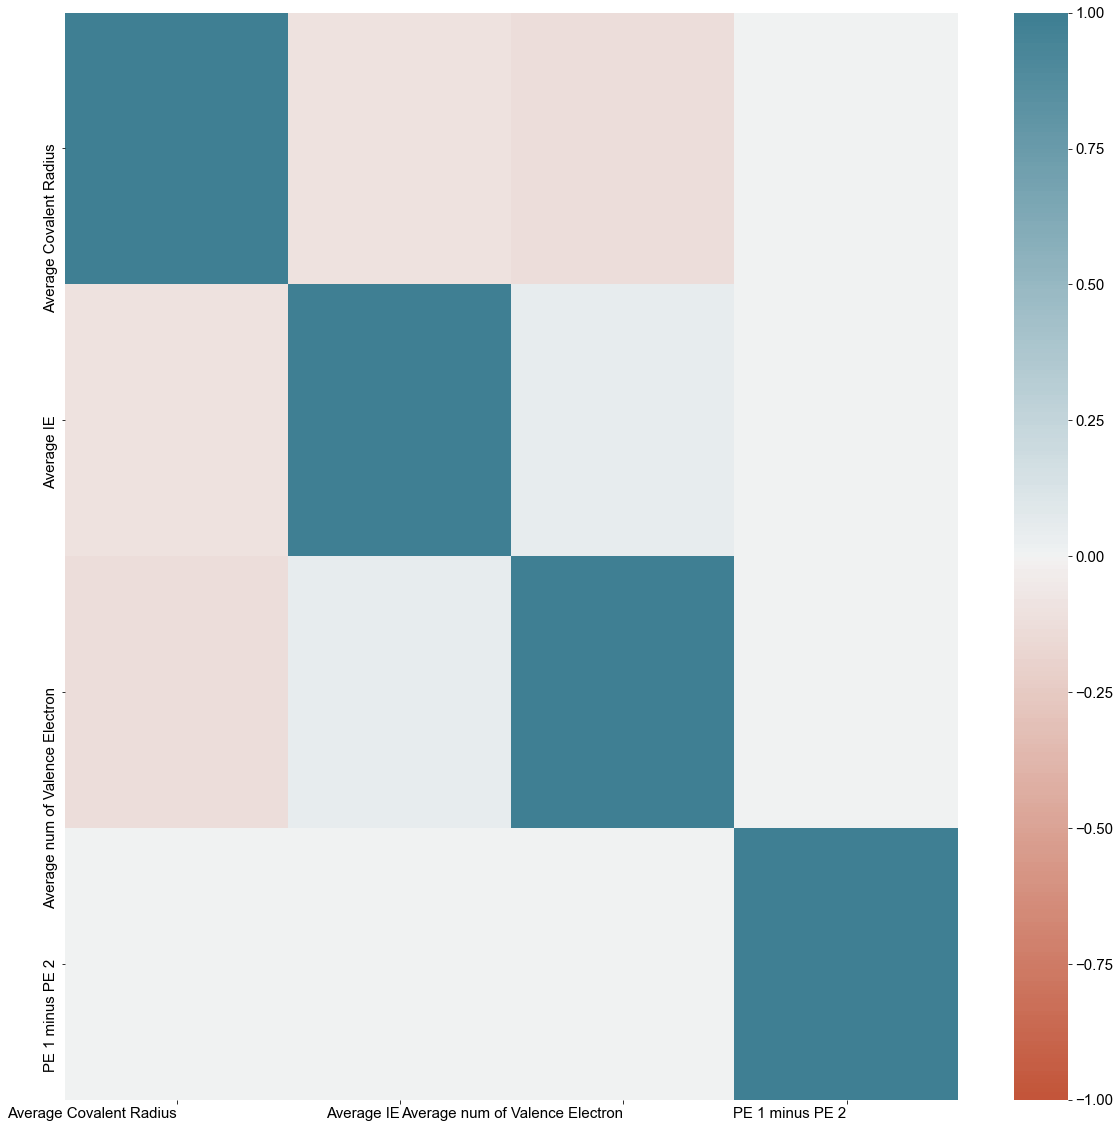

In [300]:
pearson_correlation(df_v10, last=True)

### Final Feature Selection Figures

<ipython-input-367-622f58d23fda>:69: UserWarning:

FixedFormatter should only be used together with FixedLocator



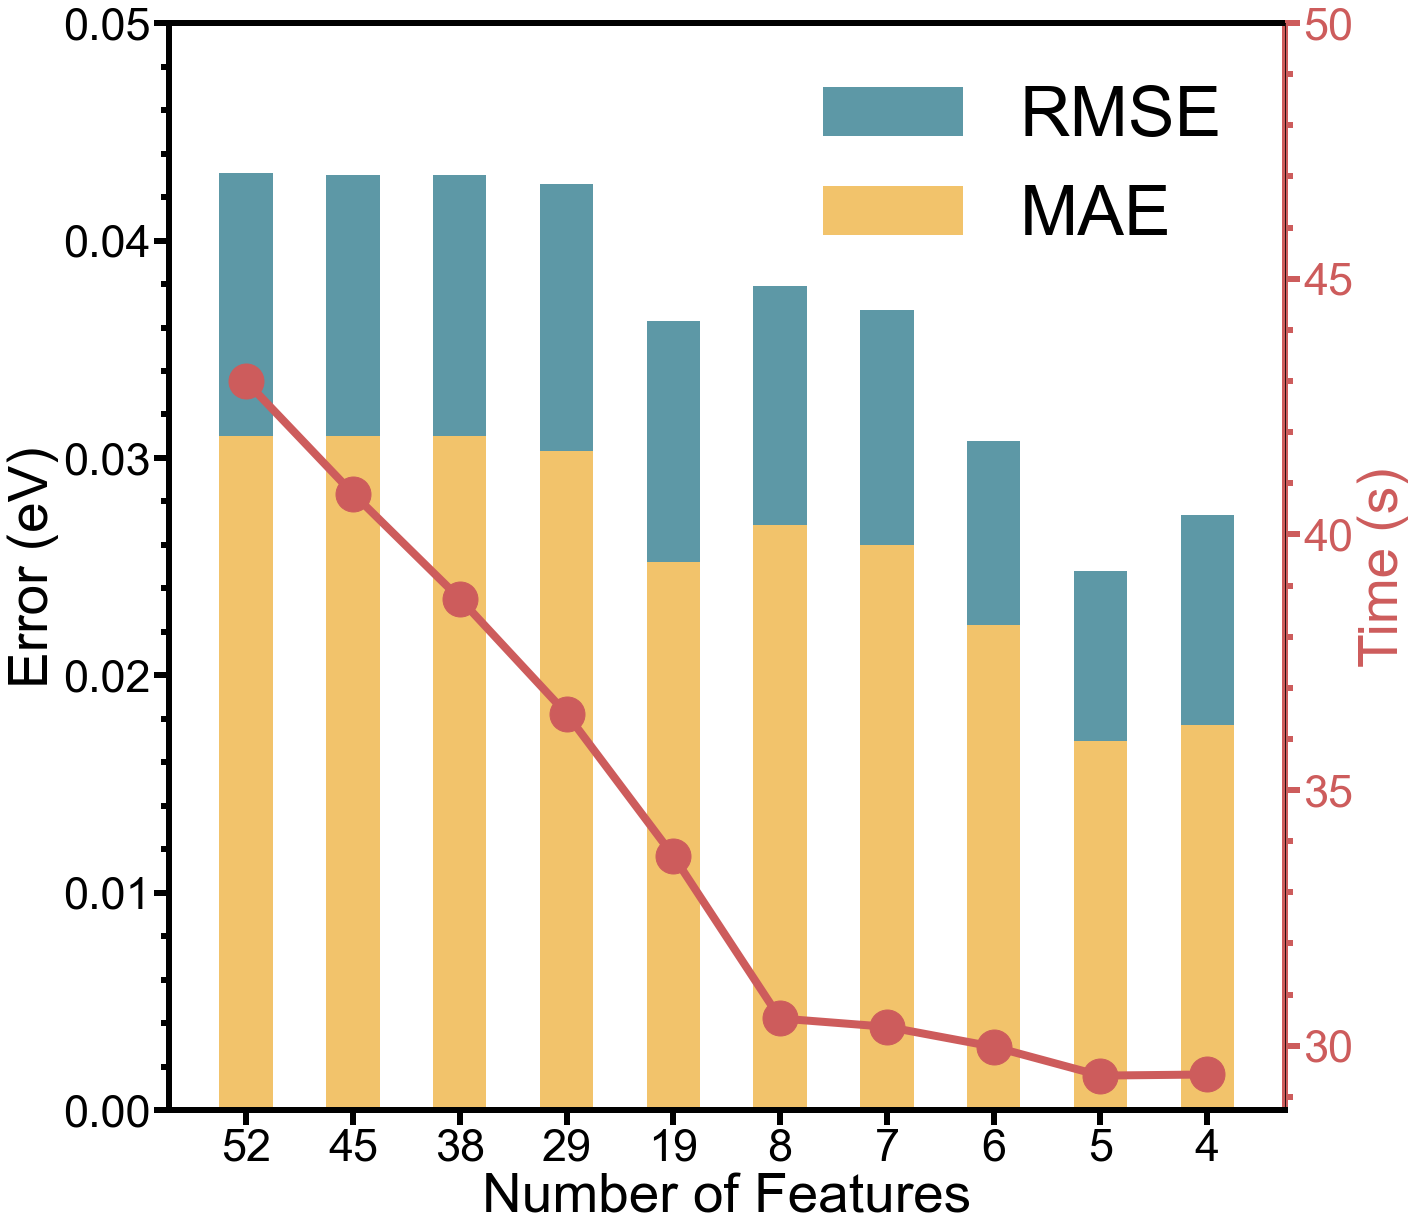

In [367]:
# Get XGBR MAE values
mae_0 = results_df['XGBR'][1][0]
mae_1 = results_df['XGBR'][2][0]
mae_2 = results_df['XGBR'][3][0]
mae_3 = results_df['XGBR'][4][0]
mae_4 = results_df['XGBR'][5][0]
mae_5 = results_df['XGBR'][6][0]
mae_6 = results_df['XGBR'][7][0]
mae_7 = results_df['XGBR'][8][0]
mae_8 = results_df['XGBR'][9][0]
mae_9 = results_df['XGBR'][10][0]
mae = [mae_0, mae_1, mae_2, mae_3, mae_4, mae_5, mae_6, mae_7, mae_8, mae_9]

# Get XGBR RMSE values
rmse_0 = results_df['XGBR'][1][1]
rmse_1 = results_df['XGBR'][2][1]
rmse_2 = results_df['XGBR'][3][1]
rmse_3 = results_df['XGBR'][4][1]
rmse_4 = results_df['XGBR'][5][1]
rmse_5 = results_df['XGBR'][6][1]
rmse_6 = results_df['XGBR'][7][1]
rmse_7 = results_df['XGBR'][8][1]
rmse_8 = results_df['XGBR'][9][1]
rmse_9 = results_df['XGBR'][10][1]
rmse = [rmse_0, rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6, rmse_7, rmse_8, rmse_9]

# Get run times
time1 = results_df['Time'][1]
time2 = results_df['Time'][2]
time3 = results_df['Time'][3]
time4 = results_df['Time'][4]
time5 = results_df['Time'][5]
time6 = results_df['Time'][6]
time7 = results_df['Time'][7]
time8 = results_df['Time'][8]
time9 = results_df['Time'][9]
time10 = results_df['Time'][10]
run_time = [time1, time2, time3, time4, time5, time6, time7, time8, time9, time10]

# Get # of features
feature1 = str(results_df['# Features'][1])
feature2 = str(results_df['# Features'][2])
feature3 = str(results_df['# Features'][3])
feature4 = str(results_df['# Features'][4])
feature5 = str(results_df['# Features'][5])
feature6 = str(results_df['# Features'][6])
feature7 = str(results_df['# Features'][7])
feature8 = str(results_df['# Features'][8])
feature9 = str(results_df['# Features'][9])
feature10 = str(results_df['# Features'][10])
ml_features = [feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10]

# Plot figure
ml_features = np.array(ml_features)
run_time = np.array(run_time)
data1 = np.array(rmse)
data2 = np.array(mae)

m1_t = pd.DataFrame({
 'run_time' : run_time,
 'RMSE (eV)' : data1,
 'MAE (eV)' : data2})

fig, ax1 = plt.subplots()

bar1 = ax1.bar(ml_features, m1_t['RMSE (eV)'].values.flatten(), color='#5D98A6', label='RMSE', width=0.5)
bar2 = ax1.bar(ml_features, m1_t['MAE (eV)'].values.flatten(), color='#F2C36B', label='MAE', width=0.5)

ax1.set_xticklabels(ml_features)
ax1.tick_params(axis='y', labelcolor='black', labelsize = 45, width=6, length=15, color='black', which='major')
ax1.tick_params(axis='x', labelcolor='black', labelsize = 45, width=6, length=15, color='black', which='major')
ax1.tick_params(axis='y', labelcolor='black', labelsize = 45, width=6, length=8, color='black', which="minor")

ax1.minorticks_on()
ax1.set_yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05])

plt.legend([bar1, bar2], ['RMSE', 'MAE'], frameon=False, fontsize = 70);

ax2 = ax1.twinx()

linecolor = '#CD5C5C'
line1 = ax2.plot(ml_features, m1_t['run_time'], marker = 'o', color = linecolor, linewidth = 8, markersize = 35)
ax2.tick_params(axis='y', labelcolor=linecolor, labelsize = 45, width=6, length=15, color=linecolor, which='major')
ax2.tick_params(axis='y', labelcolor=linecolor, labelsize = 45, width=6, length=8, color=linecolor, which="minor")

ax1.set_xlabel('Number of Features', size = 55)
ax1.set_ylabel('Error (eV)', color='black', size = 55)
ax2.set_ylabel('Time (s)', color=linecolor, size = 55)
ax2.minorticks_on()
ax2.set_yticks([30, 35, 40, 45, 50])

for axis in ['top','bottom','left','right']:
    if axis == 'right':
        ax1.spines[axis].set_color(linecolor)
    ax1.spines[axis].set_linewidth(6)

plt.show()

In [302]:
# Save errors to csv
results_df.to_csv('CO Dimerization Errors.csv')

<ipython-input-368-7e0a8b2feb5b>:23: UserWarning:

FixedFormatter should only be used together with FixedLocator



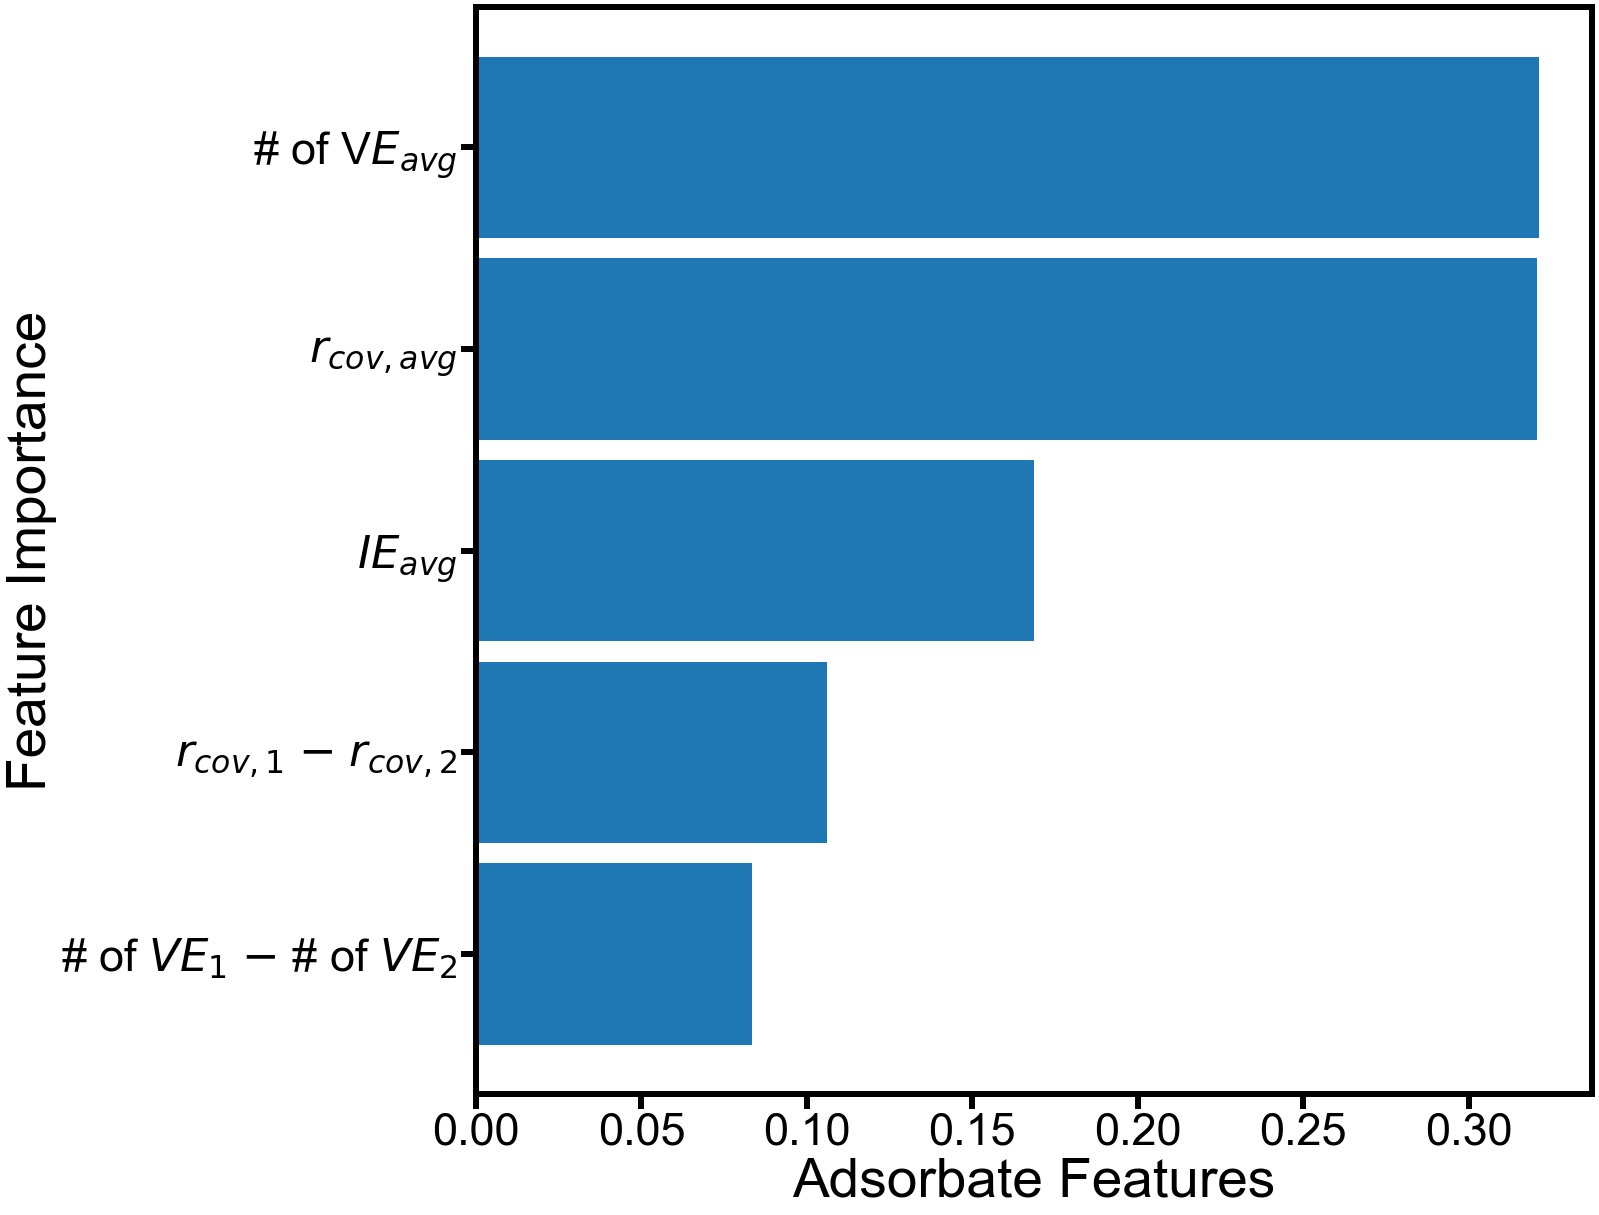

In [368]:
# Plot final feature importance figure

importance_labels = ['# of V$E_{avg}$', '$r_{cov, avg}$', '$IE_{avg}$', '$r_{cov, 1}$ $-$ $r_{cov, 2}$', '# of $VE_{1}$ $-$ # of $VE_{2}$']
importance_labels = reversed(importance_labels)

features = df_v9.iloc[:, 0:-1]
target = df_v9.iloc[:, -1]

xgbr.fit(features, target)

importance = xgbr.feature_importances_
features = df_v9.columns[0:-1]

col = zip(features, importance)

# sort and save features based on its importance into a dataframe
importance_data = pd.DataFrame(col, columns=['feature', 'importance'])
importance_data_asc = importance_data.sort_values('importance')

# plot the importance data
fig, ax = plt.subplots()
plt.barh(y=importance_data_asc['feature'], width=importance_data_asc['importance'], height=0.9, color='tab:blue')
ax.set_yticklabels(importance_labels)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(6)

ax.tick_params(axis='x', colors='black', width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', width=6, length=15, color='black')    

ax.set_xlabel("Adsorbate Features", fontsize = 55)
ax.set_ylabel("Feature Importance", fontsize = 55)

ax.tick_params(axis='x', colors='black', labelsize = 45, width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', labelsize = 45, width=6, length=15, color='black')

plt.show();

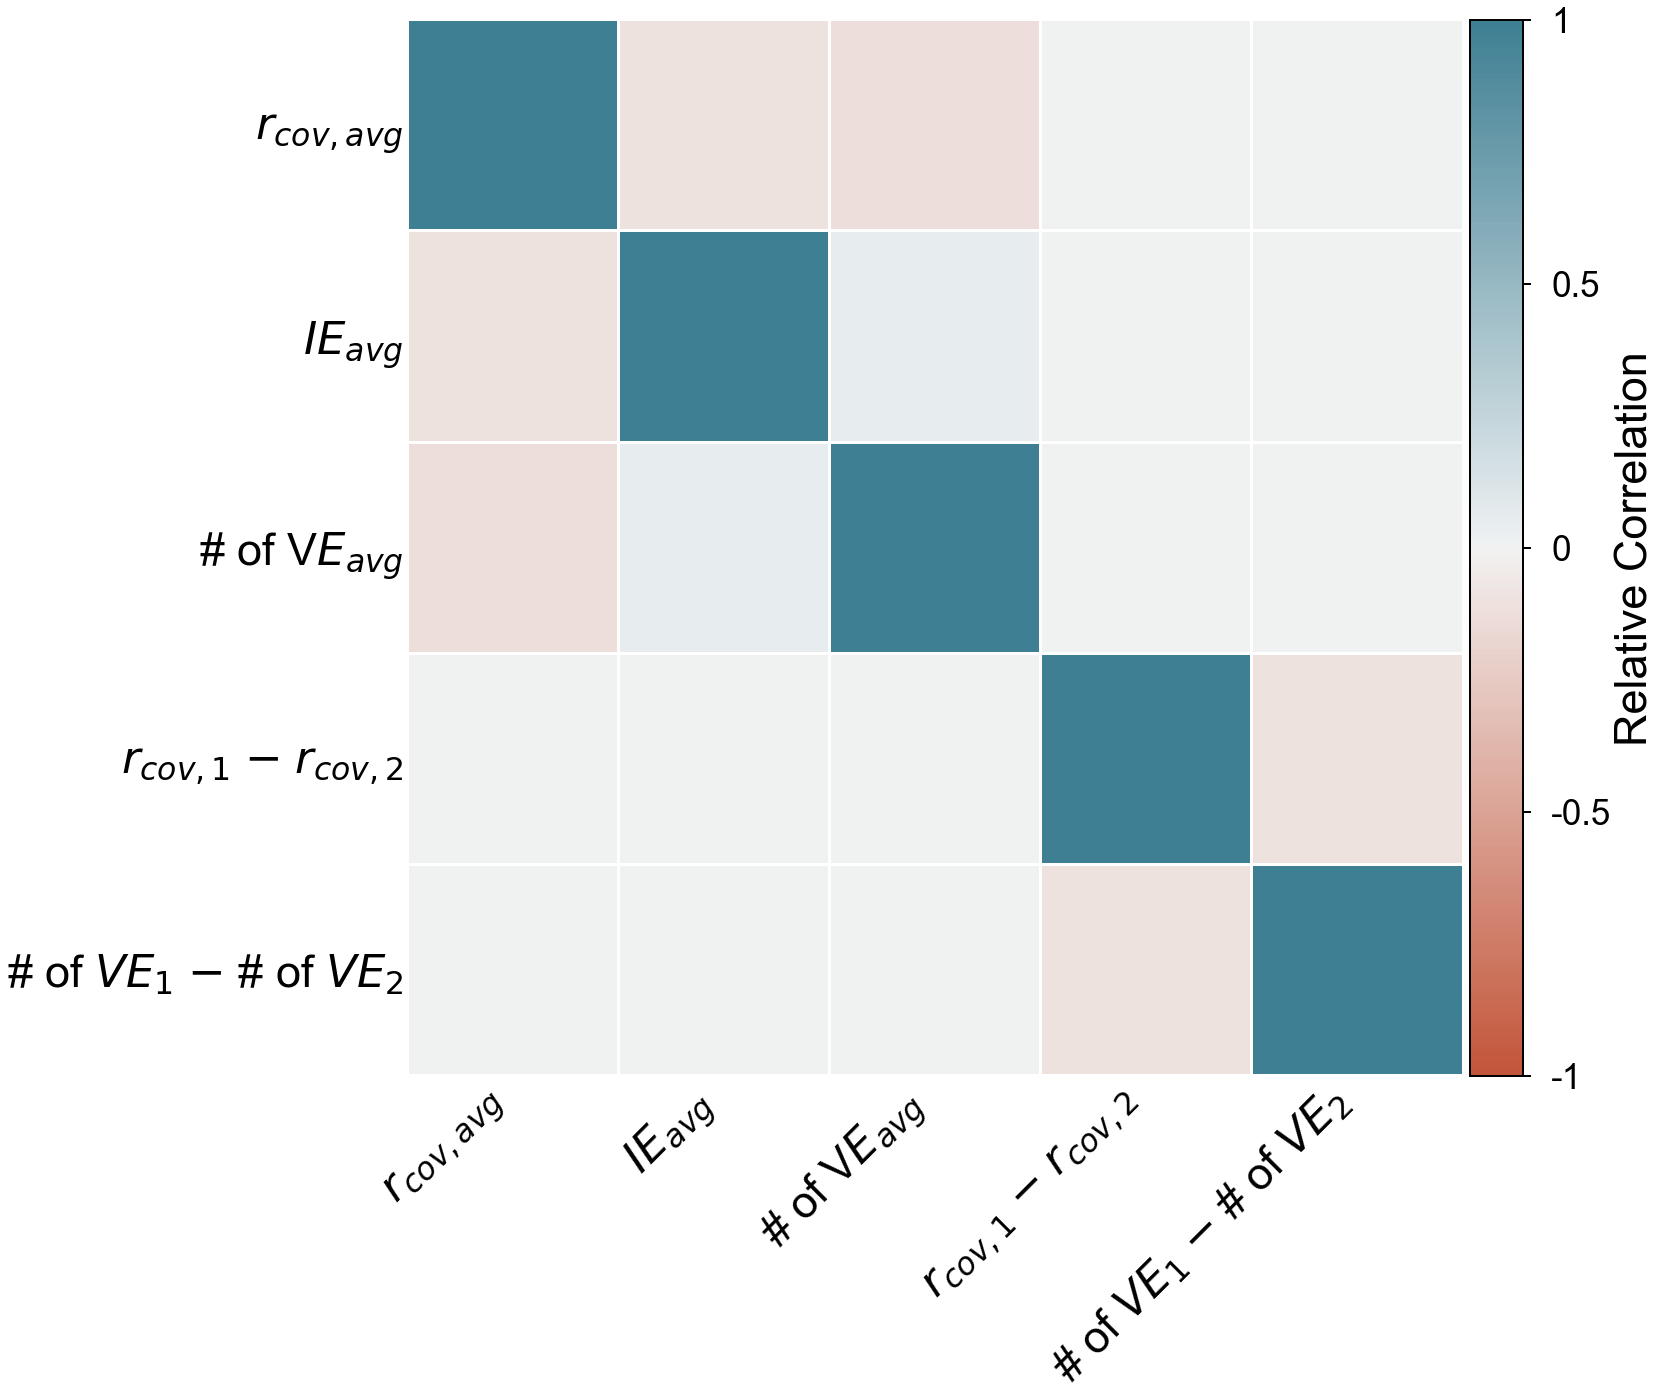

In [308]:
# Plot final correlation figure
from mpl_toolkits.axes_grid1 import make_axes_locatable

corr_labels = ['$r_{cov, avg}$', '$IE_{avg}$', '# of V$E_{avg}$', 
               '$r_{cov, 1}$ $-$ $r_{cov, 2}$', '# of $VE_{1}$ $-$ # of $VE_{2}$']

data = df_v9.iloc[:, :-1]

corr = data.corr()
#sns.set(font_scale=4)

ax = sns.heatmap(corr, linewidth=2,
                 cmap = sns.diverging_palette(20, 220, n=220), square = True, vmin = -1, vmax = 1,
                 cbar=False)
plt.xticks(ha='right')
  
#ax.figure.axes[-1].yaxis.label.set_size(35)

divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1) 
cbar = plt.colorbar(ax.collections[0], cax=cax)
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.ax.set_yticklabels(['-1', '-0.5', '0', '0.5', '1'], size=35)
cbar.ax.set_ylabel("Relative Correlation", fontsize = 45)
cbar.ax.tick_params(axis='y', which='major', length=8, width = 2, pad=20)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)


    
ax.set_xticklabels(corr_labels, rotation = 45, size = 35)
ax.set_yticklabels(corr_labels, rotation = 0, size = 35)

ax.tick_params(axis='x', labelcolor='black', labelsize = 45, width=0, length=0, color='black') 
ax.tick_params(axis='y', labelcolor='black', labelsize = 45, width=0, length=0, color='black') 

plt.show()

# 4. XGBR Hyperparameter Tuning

In [309]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost
import lightgbm

In [310]:
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = xgboost.XGBRegressor(random_state=42)
light = lightgbm.LGBMRegressor(random_state=42)

In [311]:
features = df_v9.iloc[:, 0:-1]
target = df_v9.iloc[:, -1]

In [312]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold


# Defining XGBR hyperparameters
xgbr_grid = {
    
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.3, 1, 2],
    'colsample_bytree': [0.1, 0.5, 0.8, 1],
    'colsample_bylevel': [0.1, 0.5, 0.8, 1],

}


fold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [313]:
# Performing Randomized CV search on XGBR
xgbr_grid_cv = GridSearchCV(estimator = xgbr, cv = fold,
            param_grid = xgbr_grid, n_jobs = -1, scoring='neg_root_mean_squared_error',
            verbose = 5, return_train_score = True)

In [314]:
xgbr_grid_cv.fit(features, target)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 2146 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 3010 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 3496 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 4576 tasks      | e

GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=42),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=n...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.1, 0.5, 0.8, 1],
                         'colsa

In [315]:
xgbr_grid_cv.best_params_

{'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'learning_rate': 0.3,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 300}

In [316]:
xgbr_grid_cv.best_score_

-0.020639764156510518

In [317]:
xgbr_grid_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=16, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [318]:
from sklearn.model_selection import cross_val_score

xgbr_optimized = xgbr_grid_cv.best_estimator_

rmse_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_root_mean_squared_error')
mae_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_mean_absolute_error')

In [319]:
optimized_xgbr_rmse = np.abs(rmse_score).mean()
optimized_xgbr_mae = np.abs(mae_score).mean()

In [320]:
optimized_xgbr_rmse, optimized_xgbr_mae

(0.020639764156510518, 0.013701632346535828)

# 5. Analysis of Separation Ratios

In [321]:
from tqdm.auto import tqdm

separations = [2,3,4,5,6,7,8,9,10]

mae_results = []
rmse_results = []
r2_results = []

for split in tqdm(separations):
    fold = RepeatedKFold(n_splits=split, n_repeats=10, random_state=42)
    mae = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_mean_absolute_error')
    rmse = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_root_mean_squared_error')
    r2 = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='r2')
    mae_results.append(np.abs(mae).mean())
    rmse_results.append(np.abs(rmse).mean())
    r2_results.append(np.abs(r2).mean())

In [322]:
def squarify(fig):
    w, h = fig.get_size_inches()
    if w > h:
        t = fig.subplotpars.top
        b = fig.subplotpars.bottom
        axs = h*(t-b)
        l = (1.-axs/w)/2
        fig.subplots_adjust(left=l, right=1-l)
    else:
        t = fig.subplotpars.right
        b = fig.subplotpars.left
        axs = w*(t-b)
        l = (1.-axs/h)/2
        fig.subplots_adjust(bottom=l, top=1-l)
    
    return fig

## Training/Testing Ratio Final Plot

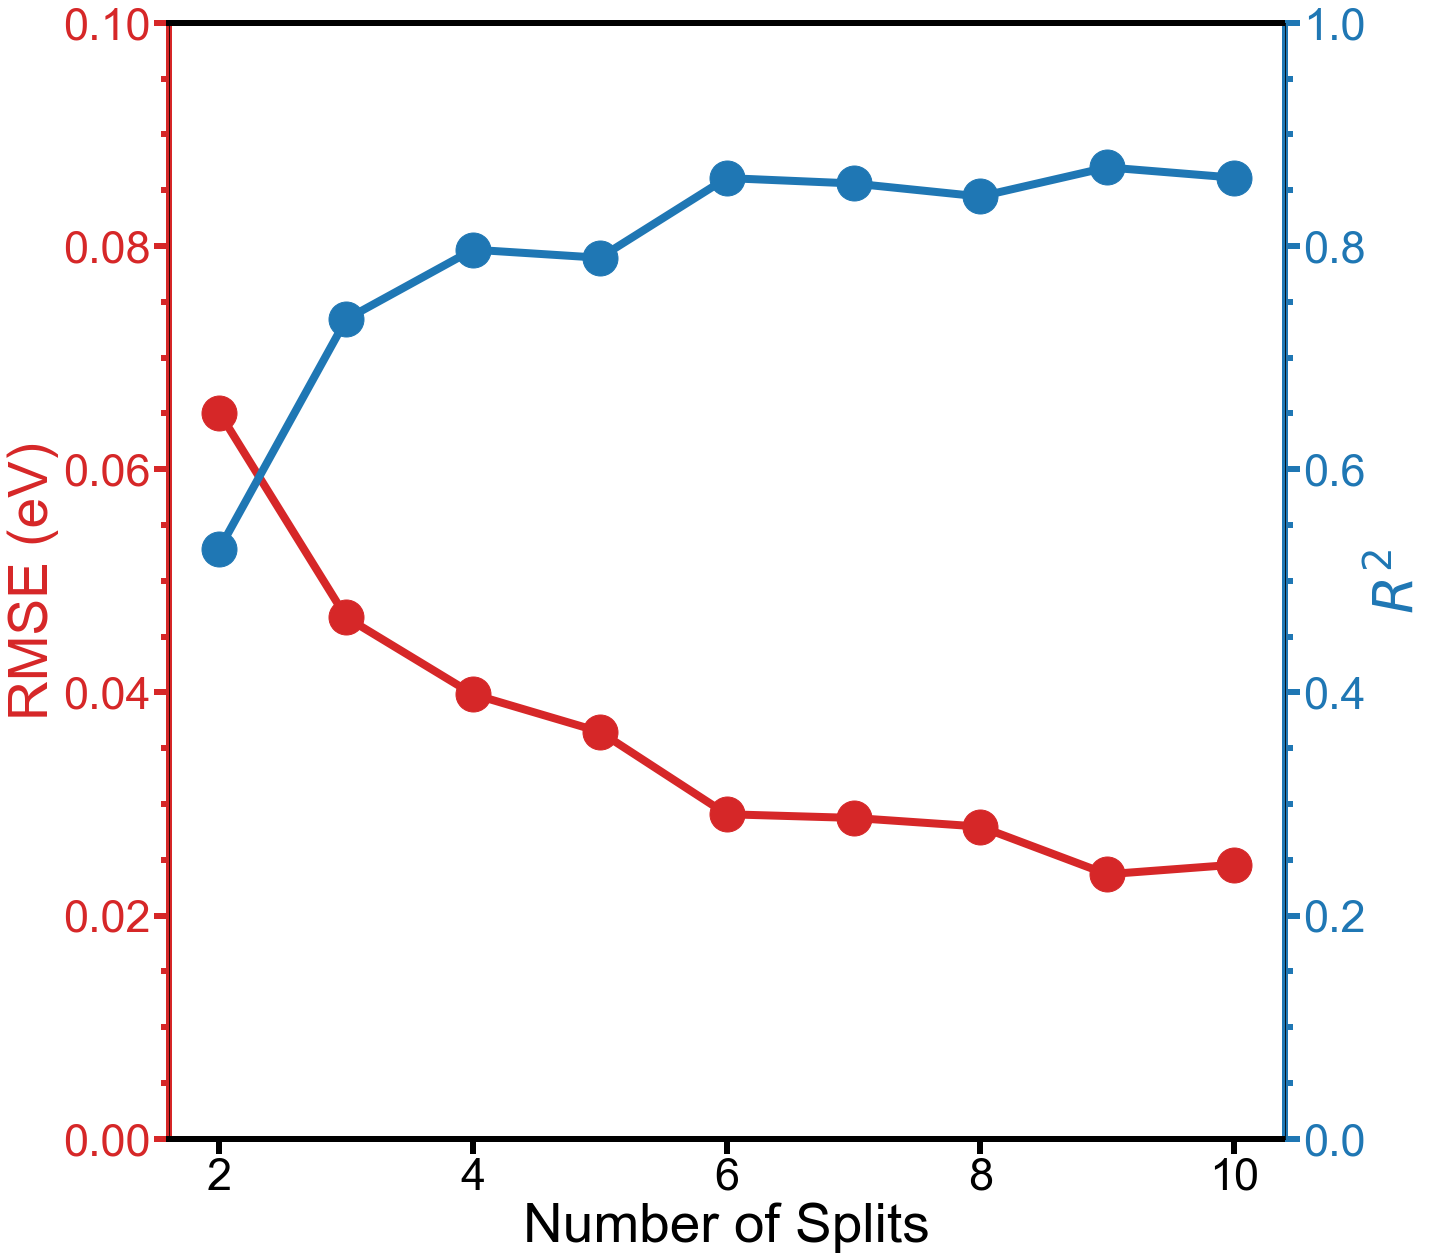

In [369]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

t = separations
data1 = np.array(rmse_results)
data2 = np.array(r2_results)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Splits', size = 55)
ax1.set_ylabel('RMSE (eV)', color=color, size = 55)
ax1.plot(t, data1, color=color, marker = 'o', linewidth = 8, markersize = 35, label = 'RMSE (eV)')
ax1.tick_params(axis='y', labelcolor=color, labelsize = 45, width=6, length=15, color=color, which="major")
ax1.tick_params(axis='y', labelcolor=color, labelsize = 45, width=6, length=8, color=color, which="minor")

ax1.tick_params(axis='x', colors='black', labelsize = 45, width=6, length=15, color='black')
for axis in ['top','bottom','left','right']:
    if axis == 'left':
        ax1.spines[axis].set_color(color)
    ax1.spines[axis].set_linewidth(6)

#plt.xticks(fontsize=45, color='black')
ax1.minorticks_on()
ax1.set_yticks([0, 0.02, 0.04, 0.06, 0.08, 0.1])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$R^2$', color=color, size = 55)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color, marker = 'o', linewidth = 8, markersize = 35, label = '$R^2$')
ax2.tick_params(axis='y', labelcolor=color, labelsize = 45, width=6, length=15, color=color, which='major')
ax2.tick_params(axis='y', labelcolor=color, labelsize = 45, width=6, length=8, color=color, which="minor")

for axis in ['top','bottom','left','right']:
    if axis == 'right':
        ax1.spines[axis].set_color(color)
    ax1.spines[axis].set_linewidth(6)

ax2.minorticks_on()
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

#ax1.legend(lines, labels, loc=9, frameon=False, fontsize = 45)
fig = squarify(fig)
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# 6. Neural Network Implementation

In [324]:
from nn import train_model_rmse, train_model_mae, load_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.9, random_state = 42)

In [325]:
import time

start = time.time()
model_history_rmse = train_model_rmse(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - 1s 1s/step - loss: 0.1441 - val_loss: 0.0974

Epoch 00001: val_loss improved from inf to 0.09735, saving model to model_best_weights.h5
Epoch 2/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.1486 - val_loss: 0.0966

Epoch 00002: val_loss improved from 0.09735 to 0.09661, saving model to model_best_weights.h5
Epoch 3/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1417 - val_loss: 0.0960

Epoch 00003: val_loss improved from 0.09661 to 0.09595, saving model to model_best_weights.h5
Epoch 4/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1403 - val_loss: 0.0953

Epoch 00004: val_loss improved from 0.09595 to 0.09532, saving model to model_best_weights.h5
Epoch 5/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1360 - val_loss: 0.0947

Epoch 00005: val_loss improved from 0.09532 to 0.09475, saving model to model_best_weights.h5
Epoch 6/1600
1/1 [==================

1/1 [==============================] - 0s 29ms/step - loss: 0.0916 - val_loss: 0.0829

Epoch 00045: val_loss did not improve from 0.07679
Epoch 46/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0945 - val_loss: 0.0802

Epoch 00046: val_loss did not improve from 0.07679
Epoch 47/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0931 - val_loss: 0.0791

Epoch 00047: val_loss did not improve from 0.07679
Epoch 48/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0962 - val_loss: 0.0781

Epoch 00048: val_loss did not improve from 0.07679
Epoch 49/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0985 - val_loss: 0.0777

Epoch 00049: val_loss did not improve from 0.07679
Epoch 50/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.1014 - val_loss: 0.0764

Epoch 00050: val_loss improved from 0.07679 to 0.07643, saving model to model_best_weights.h5
Epoch 51/1600
1/1 [==============================] - 0s 31m

1/1 [==============================] - 0s 30ms/step - loss: 0.0855 - val_loss: 0.0606

Epoch 00096: val_loss did not improve from 0.05774
Epoch 97/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0833 - val_loss: 0.0626

Epoch 00097: val_loss did not improve from 0.05774
Epoch 98/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0782 - val_loss: 0.0679

Epoch 00098: val_loss did not improve from 0.05774
Epoch 99/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0834 - val_loss: 0.0764

Epoch 00099: val_loss did not improve from 0.05774
Epoch 100/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0774 - val_loss: 0.0830

Epoch 00100: val_loss did not improve from 0.05774
Epoch 101/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0722 - val_loss: 0.0882

Epoch 00101: val_loss did not improve from 0.05774
Epoch 102/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0781 - val_loss: 0.0928

1/1 [==============================] - 0s 30ms/step - loss: 0.0770 - val_loss: 0.0796

Epoch 00150: val_loss did not improve from 0.05774
Epoch 151/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0631 - val_loss: 0.0817

Epoch 00151: val_loss did not improve from 0.05774
Epoch 152/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0754 - val_loss: 0.0838

Epoch 00152: val_loss did not improve from 0.05774
Epoch 153/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0626 - val_loss: 0.0843

Epoch 00153: val_loss did not improve from 0.05774
Epoch 154/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0736 - val_loss: 0.0823

Epoch 00154: val_loss did not improve from 0.05774
Epoch 155/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0780 - val_loss: 0.0817

Epoch 00155: val_loss did not improve from 0.05774
Epoch 156/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0690 - val_loss: 0.0

1/1 [==============================] - 0s 31ms/step - loss: 0.0613 - val_loss: 0.0907

Epoch 00203: val_loss did not improve from 0.05556
Epoch 204/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0527 - val_loss: 0.0904

Epoch 00204: val_loss did not improve from 0.05556
Epoch 205/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0758 - val_loss: 0.0910

Epoch 00205: val_loss did not improve from 0.05556
Epoch 206/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0669 - val_loss: 0.0947

Epoch 00206: val_loss did not improve from 0.05556
Epoch 207/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0642 - val_loss: 0.0941

Epoch 00207: val_loss did not improve from 0.05556
Epoch 208/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0693 - val_loss: 0.0883

Epoch 00208: val_loss did not improve from 0.05556
Epoch 209/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0633 - val_loss: 0.0


Epoch 00256: val_loss did not improve from 0.05556
Epoch 257/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0545 - val_loss: 0.0853

Epoch 00257: val_loss did not improve from 0.05556
Epoch 258/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0665 - val_loss: 0.0802

Epoch 00258: val_loss did not improve from 0.05556
Epoch 259/1600
1/1 [==============================] - 0s 35ms/step - loss: 0.0637 - val_loss: 0.0733

Epoch 00259: val_loss did not improve from 0.05556
Epoch 260/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0589 - val_loss: 0.0702

Epoch 00260: val_loss did not improve from 0.05556
Epoch 261/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0611 - val_loss: 0.0666

Epoch 00261: val_loss did not improve from 0.05556
Epoch 262/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0611 - val_loss: 0.0670

Epoch 00262: val_loss did not improve from 0.05556
Epoch 263/1600
1/1 [==========

1/1 [==============================] - 0s 30ms/step - loss: 0.0587 - val_loss: 0.0861

Epoch 00310: val_loss did not improve from 0.05556
Epoch 311/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0565 - val_loss: 0.0841

Epoch 00311: val_loss did not improve from 0.05556
Epoch 312/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0623 - val_loss: 0.0858

Epoch 00312: val_loss did not improve from 0.05556
Epoch 313/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0645 - val_loss: 0.0835

Epoch 00313: val_loss did not improve from 0.05556
Epoch 314/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0683 - val_loss: 0.0796

Epoch 00314: val_loss did not improve from 0.05556
Epoch 315/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0700 - val_loss: 0.0798

Epoch 00315: val_loss did not improve from 0.05556
Epoch 316/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0793 - val_loss: 0.0


Epoch 00363: val_loss did not improve from 0.05556
Epoch 364/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0758 - val_loss: 0.0907

Epoch 00364: val_loss did not improve from 0.05556
Epoch 365/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0725 - val_loss: 0.0849

Epoch 00365: val_loss did not improve from 0.05556
Epoch 366/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0542 - val_loss: 0.0785

Epoch 00366: val_loss did not improve from 0.05556
Epoch 367/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0636 - val_loss: 0.0743

Epoch 00367: val_loss did not improve from 0.05556
Epoch 368/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0623 - val_loss: 0.0723

Epoch 00368: val_loss did not improve from 0.05556
Epoch 369/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0748 - val_loss: 0.0679

Epoch 00369: val_loss did not improve from 0.05556
Epoch 370/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0549 - val_loss: 0.0761

Epoch 00417: val_loss did not improve from 0.05556
Epoch 418/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0578 - val_loss: 0.0829

Epoch 00418: val_loss did not improve from 0.05556
Epoch 419/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0666 - val_loss: 0.0866

Epoch 00419: val_loss did not improve from 0.05556
Epoch 420/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0606 - val_loss: 0.0887

Epoch 00420: val_loss did not improve from 0.05556
Epoch 421/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0567 - val_loss: 0.0904

Epoch 00421: val_loss did not improve from 0.05556
Epoch 422/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0685 - val_loss: 0.0932

Epoch 00422: val_loss did not improve from 0.05556
Epoch 423/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0647 - val_loss: 0.0


Epoch 00470: val_loss did not improve from 0.05556
Epoch 471/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0655 - val_loss: 0.0722

Epoch 00471: val_loss did not improve from 0.05556
Epoch 472/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0654 - val_loss: 0.0748

Epoch 00472: val_loss did not improve from 0.05556
Epoch 473/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0704 - val_loss: 0.0781

Epoch 00473: val_loss did not improve from 0.05556
Epoch 474/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0714 - val_loss: 0.0808

Epoch 00474: val_loss did not improve from 0.05556
Epoch 475/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0648 - val_loss: 0.0841

Epoch 00475: val_loss did not improve from 0.05556
Epoch 476/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0562 - val_loss: 0.0848

Epoch 00476: val_loss did not improve from 0.05556
Epoch 477/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0609 - val_loss: 0.0864

Epoch 00524: val_loss did not improve from 0.05556
Epoch 525/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0606 - val_loss: 0.0855

Epoch 00525: val_loss did not improve from 0.05556
Epoch 526/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0690 - val_loss: 0.0747

Epoch 00526: val_loss did not improve from 0.05556
Epoch 527/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0561 - val_loss: 0.0680

Epoch 00527: val_loss did not improve from 0.05556
Epoch 528/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0656 - val_loss: 0.0683

Epoch 00528: val_loss did not improve from 0.05556
Epoch 529/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0653 - val_loss: 0.0664

Epoch 00529: val_loss did not improve from 0.05556
Epoch 530/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0596 - val_loss: 0.0


Epoch 00577: val_loss did not improve from 0.05556
Epoch 578/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0545 - val_loss: 0.0970

Epoch 00578: val_loss did not improve from 0.05556
Epoch 579/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0711 - val_loss: 0.0913

Epoch 00579: val_loss did not improve from 0.05556
Epoch 580/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0616 - val_loss: 0.0848

Epoch 00580: val_loss did not improve from 0.05556
Epoch 581/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0524 - val_loss: 0.0816

Epoch 00581: val_loss did not improve from 0.05556
Epoch 582/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0681 - val_loss: 0.0780

Epoch 00582: val_loss did not improve from 0.05556
Epoch 583/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0500 - val_loss: 0.0751

Epoch 00583: val_loss did not improve from 0.05556
Epoch 584/1600
1/1 [==========


Epoch 00630: val_loss did not improve from 0.05426
Epoch 631/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0571 - val_loss: 0.0675

Epoch 00631: val_loss did not improve from 0.05426
Epoch 632/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0555 - val_loss: 0.0684

Epoch 00632: val_loss did not improve from 0.05426
Epoch 633/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0650 - val_loss: 0.0722

Epoch 00633: val_loss did not improve from 0.05426
Epoch 634/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0598 - val_loss: 0.0728

Epoch 00634: val_loss did not improve from 0.05426
Epoch 635/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0659 - val_loss: 0.0742

Epoch 00635: val_loss did not improve from 0.05426
Epoch 636/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0516 - val_loss: 0.0804

Epoch 00636: val_loss did not improve from 0.05426
Epoch 637/1600
1/1 [==========

1/1 [==============================] - 0s 30ms/step - loss: 0.0602 - val_loss: 0.0770

Epoch 00684: val_loss did not improve from 0.05426
Epoch 685/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0609 - val_loss: 0.0771

Epoch 00685: val_loss did not improve from 0.05426
Epoch 686/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0561 - val_loss: 0.0756

Epoch 00686: val_loss did not improve from 0.05426
Epoch 687/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0615 - val_loss: 0.0763

Epoch 00687: val_loss did not improve from 0.05426
Epoch 688/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0543 - val_loss: 0.0758

Epoch 00688: val_loss did not improve from 0.05426
Epoch 689/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0611 - val_loss: 0.0782

Epoch 00689: val_loss did not improve from 0.05426
Epoch 690/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0568 - val_loss: 0.0


Epoch 00737: val_loss did not improve from 0.05426
Epoch 738/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0621 - val_loss: 0.0996

Epoch 00738: val_loss did not improve from 0.05426
Epoch 739/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0527 - val_loss: 0.0992

Epoch 00739: val_loss did not improve from 0.05426
Epoch 740/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0593 - val_loss: 0.0983

Epoch 00740: val_loss did not improve from 0.05426
Epoch 741/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0666 - val_loss: 0.0873

Epoch 00741: val_loss did not improve from 0.05426
Epoch 742/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0574 - val_loss: 0.0762

Epoch 00742: val_loss did not improve from 0.05426
Epoch 743/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0616 - val_loss: 0.0677

Epoch 00743: val_loss did not improve from 0.05426
Epoch 744/1600
1/1 [==========

1/1 [==============================] - 0s 30ms/step - loss: 0.0694 - val_loss: 0.0995

Epoch 00791: val_loss did not improve from 0.05164
Epoch 792/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0609 - val_loss: 0.0991

Epoch 00792: val_loss did not improve from 0.05164
Epoch 793/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0598 - val_loss: 0.1000

Epoch 00793: val_loss did not improve from 0.05164
Epoch 794/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0565 - val_loss: 0.1029

Epoch 00794: val_loss did not improve from 0.05164
Epoch 795/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0610 - val_loss: 0.1052

Epoch 00795: val_loss did not improve from 0.05164
Epoch 796/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0554 - val_loss: 0.1067

Epoch 00796: val_loss did not improve from 0.05164
Epoch 797/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0578 - val_loss: 0.1


Epoch 00844: val_loss did not improve from 0.05164
Epoch 845/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0472 - val_loss: 0.0781

Epoch 00845: val_loss did not improve from 0.05164
Epoch 846/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0608 - val_loss: 0.0763

Epoch 00846: val_loss did not improve from 0.05164
Epoch 847/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0606 - val_loss: 0.0759

Epoch 00847: val_loss did not improve from 0.05164
Epoch 848/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0606 - val_loss: 0.0730

Epoch 00848: val_loss did not improve from 0.05164
Epoch 849/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0496 - val_loss: 0.0715

Epoch 00849: val_loss did not improve from 0.05164
Epoch 850/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0648 - val_loss: 0.0718

Epoch 00850: val_loss did not improve from 0.05164
Epoch 851/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0539 - val_loss: 0.0898

Epoch 00898: val_loss did not improve from 0.05164
Epoch 899/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0597 - val_loss: 0.0904

Epoch 00899: val_loss did not improve from 0.05164
Epoch 900/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0570 - val_loss: 0.0890

Epoch 00900: val_loss did not improve from 0.05164
Epoch 901/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0618 - val_loss: 0.0823

Epoch 00901: val_loss did not improve from 0.05164
Epoch 902/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0503 - val_loss: 0.0857

Epoch 00902: val_loss did not improve from 0.05164
Epoch 903/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0625 - val_loss: 0.0876

Epoch 00903: val_loss did not improve from 0.05164
Epoch 904/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0695 - val_loss: 0.0


Epoch 00951: val_loss did not improve from 0.05164
Epoch 952/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0677 - val_loss: 0.0649

Epoch 00952: val_loss did not improve from 0.05164
Epoch 953/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0593 - val_loss: 0.0687

Epoch 00953: val_loss did not improve from 0.05164
Epoch 954/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0576 - val_loss: 0.0733

Epoch 00954: val_loss did not improve from 0.05164
Epoch 955/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0499 - val_loss: 0.0819

Epoch 00955: val_loss did not improve from 0.05164
Epoch 956/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0658 - val_loss: 0.0849

Epoch 00956: val_loss did not improve from 0.05164
Epoch 957/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0614 - val_loss: 0.0883

Epoch 00957: val_loss did not improve from 0.05164
Epoch 958/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0666 - val_loss: 0.0802

Epoch 01005: val_loss did not improve from 0.05164
Epoch 1006/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0541 - val_loss: 0.0795

Epoch 01006: val_loss did not improve from 0.05164
Epoch 1007/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0752 - val_loss: 0.0750

Epoch 01007: val_loss did not improve from 0.05164
Epoch 1008/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0588 - val_loss: 0.0778

Epoch 01008: val_loss did not improve from 0.05164
Epoch 1009/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0651 - val_loss: 0.0774

Epoch 01009: val_loss did not improve from 0.05164
Epoch 1010/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0612 - val_loss: 0.0806

Epoch 01010: val_loss did not improve from 0.05164
Epoch 1011/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0587 - val_los

1/1 [==============================] - 0s 29ms/step - loss: 0.0603 - val_loss: 0.0984

Epoch 01058: val_loss did not improve from 0.05164
Epoch 1059/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0589 - val_loss: 0.0946

Epoch 01059: val_loss did not improve from 0.05164
Epoch 1060/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0503 - val_loss: 0.0920

Epoch 01060: val_loss did not improve from 0.05164
Epoch 1061/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0495 - val_loss: 0.0911

Epoch 01061: val_loss did not improve from 0.05164
Epoch 1062/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0522 - val_loss: 0.0865

Epoch 01062: val_loss did not improve from 0.05164
Epoch 1063/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0651 - val_loss: 0.0838

Epoch 01063: val_loss did not improve from 0.05164
Epoch 1064/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0557 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.0632 - val_loss: 0.0762

Epoch 01111: val_loss did not improve from 0.05164
Epoch 1112/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0650 - val_loss: 0.0722

Epoch 01112: val_loss did not improve from 0.05164
Epoch 1113/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0699 - val_loss: 0.0679

Epoch 01113: val_loss did not improve from 0.05164
Epoch 1114/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0539 - val_loss: 0.0663

Epoch 01114: val_loss did not improve from 0.05164
Epoch 1115/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0570 - val_loss: 0.0654

Epoch 01115: val_loss did not improve from 0.05164
Epoch 1116/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0515 - val_loss: 0.0792

Epoch 01116: val_loss did not improve from 0.05164
Epoch 1117/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0539 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0555 - val_loss: 0.0747

Epoch 01164: val_loss did not improve from 0.05164
Epoch 1165/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0507 - val_loss: 0.0710

Epoch 01165: val_loss did not improve from 0.05164
Epoch 1166/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0703 - val_loss: 0.0695

Epoch 01166: val_loss did not improve from 0.05164
Epoch 1167/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0578 - val_loss: 0.0678

Epoch 01167: val_loss did not improve from 0.05164
Epoch 1168/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0516 - val_loss: 0.0704

Epoch 01168: val_loss did not improve from 0.05164
Epoch 1169/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0505 - val_loss: 0.0745

Epoch 01169: val_loss did not improve from 0.05164
Epoch 1170/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0667 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.0506 - val_loss: 0.0847

Epoch 01216: val_loss did not improve from 0.04044
Epoch 1217/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0616 - val_loss: 0.0850

Epoch 01217: val_loss did not improve from 0.04044
Epoch 1218/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0658 - val_loss: 0.0863

Epoch 01218: val_loss did not improve from 0.04044
Epoch 1219/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0599 - val_loss: 0.0889

Epoch 01219: val_loss did not improve from 0.04044
Epoch 1220/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0486 - val_loss: 0.0903

Epoch 01220: val_loss did not improve from 0.04044
Epoch 1221/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0481 - val_loss: 0.0922

Epoch 01221: val_loss did not improve from 0.04044
Epoch 1222/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0645 - val_los

1/1 [==============================] - 0s 33ms/step - loss: 0.0573 - val_loss: 0.0731

Epoch 01269: val_loss did not improve from 0.04044
Epoch 1270/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0606 - val_loss: 0.0736

Epoch 01270: val_loss did not improve from 0.04044
Epoch 1271/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0471 - val_loss: 0.0758

Epoch 01271: val_loss did not improve from 0.04044
Epoch 1272/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0551 - val_loss: 0.0764

Epoch 01272: val_loss did not improve from 0.04044
Epoch 1273/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0700 - val_loss: 0.0747

Epoch 01273: val_loss did not improve from 0.04044
Epoch 1274/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0511 - val_loss: 0.0763

Epoch 01274: val_loss did not improve from 0.04044
Epoch 1275/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0528 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.0409 - val_loss: 0.1034

Epoch 01322: val_loss did not improve from 0.04044
Epoch 1323/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0628 - val_loss: 0.1012

Epoch 01323: val_loss did not improve from 0.04044
Epoch 1324/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0584 - val_loss: 0.1014

Epoch 01324: val_loss did not improve from 0.04044
Epoch 1325/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0513 - val_loss: 0.1019

Epoch 01325: val_loss did not improve from 0.04044
Epoch 1326/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0523 - val_loss: 0.1049

Epoch 01326: val_loss did not improve from 0.04044
Epoch 1327/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0746 - val_loss: 0.1038

Epoch 01327: val_loss did not improve from 0.04044
Epoch 1328/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0656 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0594 - val_loss: 0.0676

Epoch 01375: val_loss did not improve from 0.04044
Epoch 1376/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0507 - val_loss: 0.0730

Epoch 01376: val_loss did not improve from 0.04044
Epoch 1377/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0693 - val_loss: 0.0777

Epoch 01377: val_loss did not improve from 0.04044
Epoch 1378/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0522 - val_loss: 0.0836

Epoch 01378: val_loss did not improve from 0.04044
Epoch 1379/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0634 - val_loss: 0.0885

Epoch 01379: val_loss did not improve from 0.04044
Epoch 1380/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0425 - val_loss: 0.0909

Epoch 01380: val_loss did not improve from 0.04044
Epoch 1381/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0481 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.0482 - val_loss: 0.0905

Epoch 01428: val_loss did not improve from 0.04044
Epoch 1429/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0492 - val_loss: 0.0900

Epoch 01429: val_loss did not improve from 0.04044
Epoch 1430/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0500 - val_loss: 0.0903

Epoch 01430: val_loss did not improve from 0.04044
Epoch 1431/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0609 - val_loss: 0.0866

Epoch 01431: val_loss did not improve from 0.04044
Epoch 1432/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0486 - val_loss: 0.0848

Epoch 01432: val_loss did not improve from 0.04044
Epoch 1433/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0474 - val_loss: 0.0838

Epoch 01433: val_loss did not improve from 0.04044
Epoch 1434/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0480 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.0583 - val_loss: 0.0876

Epoch 01481: val_loss did not improve from 0.04044
Epoch 1482/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0549 - val_loss: 0.0876

Epoch 01482: val_loss did not improve from 0.04044
Epoch 1483/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0545 - val_loss: 0.0882

Epoch 01483: val_loss did not improve from 0.04044
Epoch 1484/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0586 - val_loss: 0.0900

Epoch 01484: val_loss did not improve from 0.04044
Epoch 1485/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0436 - val_loss: 0.0926

Epoch 01485: val_loss did not improve from 0.04044
Epoch 1486/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0560 - val_loss: 0.0955

Epoch 01486: val_loss did not improve from 0.04044
Epoch 1487/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0580 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0554 - val_loss: 0.0877

Epoch 01534: val_loss did not improve from 0.04044
Epoch 1535/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0645 - val_loss: 0.0876

Epoch 01535: val_loss did not improve from 0.04044
Epoch 1536/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0622 - val_loss: 0.0867

Epoch 01536: val_loss did not improve from 0.04044
Epoch 1537/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0526 - val_loss: 0.0820

Epoch 01537: val_loss did not improve from 0.04044
Epoch 1538/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0510 - val_loss: 0.0814

Epoch 01538: val_loss did not improve from 0.04044
Epoch 1539/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0579 - val_loss: 0.0797

Epoch 01539: val_loss did not improve from 0.04044
Epoch 1540/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0603 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0577 - val_loss: 0.0660

Epoch 01587: val_loss did not improve from 0.04044
Epoch 1588/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0545 - val_loss: 0.0673

Epoch 01588: val_loss did not improve from 0.04044
Epoch 1589/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0456 - val_loss: 0.0691

Epoch 01589: val_loss did not improve from 0.04044
Epoch 1590/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0510 - val_loss: 0.0687

Epoch 01590: val_loss did not improve from 0.04044
Epoch 1591/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0538 - val_loss: 0.0717

Epoch 01591: val_loss did not improve from 0.04044
Epoch 1592/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0467 - val_loss: 0.0754

Epoch 01592: val_loss did not improve from 0.04044
Epoch 1593/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0447 - val_los

In [326]:
nn_RMSE = min(model_history_rmse.history['val_loss'])

In [327]:
start = time.time()
model_history_mae = train_model_mae(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - 1s 923ms/step - loss: 0.1154 - val_loss: 0.0869

Epoch 00001: val_loss improved from inf to 0.08687, saving model to model_best_weights_mae.h5
Epoch 2/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.1183 - val_loss: 0.0861

Epoch 00002: val_loss improved from 0.08687 to 0.08607, saving model to model_best_weights_mae.h5
Epoch 3/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.1173 - val_loss: 0.0853

Epoch 00003: val_loss improved from 0.08607 to 0.08528, saving model to model_best_weights_mae.h5
Epoch 4/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1128 - val_loss: 0.0845

Epoch 00004: val_loss improved from 0.08528 to 0.08447, saving model to model_best_weights_mae.h5
Epoch 5/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.1137 - val_loss: 0.0840

Epoch 00005: val_loss improved from 0.08447 to 0.08398, saving model to model_best_weights_mae.h5
Epoch 6/1600


1/1 [==============================] - 0s 30ms/step - loss: 0.0806 - val_loss: 0.0679

Epoch 00042: val_loss did not improve from 0.06631
Epoch 43/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0719 - val_loss: 0.0700

Epoch 00043: val_loss did not improve from 0.06631
Epoch 44/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0787 - val_loss: 0.0691

Epoch 00044: val_loss did not improve from 0.06631
Epoch 45/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0621 - val_loss: 0.0675

Epoch 00045: val_loss did not improve from 0.06631
Epoch 46/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0701 - val_loss: 0.0681

Epoch 00046: val_loss did not improve from 0.06631
Epoch 47/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0715 - val_loss: 0.0675

Epoch 00047: val_loss did not improve from 0.06631
Epoch 48/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0697 - val_loss: 0.0689

E

1/1 [==============================] - 0s 30ms/step - loss: 0.0660 - val_loss: 0.0571

Epoch 00093: val_loss did not improve from 0.04286
Epoch 94/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0581 - val_loss: 0.0576

Epoch 00094: val_loss did not improve from 0.04286
Epoch 95/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0682 - val_loss: 0.0588

Epoch 00095: val_loss did not improve from 0.04286
Epoch 96/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0676 - val_loss: 0.0594

Epoch 00096: val_loss did not improve from 0.04286
Epoch 97/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0727 - val_loss: 0.0595

Epoch 00097: val_loss did not improve from 0.04286
Epoch 98/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0598 - val_loss: 0.0590

Epoch 00098: val_loss did not improve from 0.04286
Epoch 99/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0607 - val_loss: 0.0587

E

1/1 [==============================] - 0s 30ms/step - loss: 0.0575 - val_loss: 0.0468

Epoch 00145: val_loss did not improve from 0.03713
Epoch 146/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0553 - val_loss: 0.0471

Epoch 00146: val_loss did not improve from 0.03713
Epoch 147/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0528 - val_loss: 0.0488

Epoch 00147: val_loss did not improve from 0.03713
Epoch 148/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0505 - val_loss: 0.0470

Epoch 00148: val_loss did not improve from 0.03713
Epoch 149/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0487 - val_loss: 0.0457

Epoch 00149: val_loss did not improve from 0.03713
Epoch 150/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0621 - val_loss: 0.0461

Epoch 00150: val_loss did not improve from 0.03713
Epoch 151/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0485 - val_loss: 0.0

1/1 [==============================] - 0s 30ms/step - loss: 0.0493 - val_loss: 0.0518

Epoch 00198: val_loss did not improve from 0.03275
Epoch 199/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0536 - val_loss: 0.0513

Epoch 00199: val_loss did not improve from 0.03275
Epoch 200/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0470 - val_loss: 0.0519

Epoch 00200: val_loss did not improve from 0.03275
Epoch 201/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0477 - val_loss: 0.0507

Epoch 00201: val_loss did not improve from 0.03275
Epoch 202/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0564 - val_loss: 0.0502

Epoch 00202: val_loss did not improve from 0.03275
Epoch 203/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0534 - val_loss: 0.0511

Epoch 00203: val_loss did not improve from 0.03275
Epoch 204/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0479 - val_loss: 0.0


Epoch 00251: val_loss did not improve from 0.03275
Epoch 252/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0609 - val_loss: 0.0464

Epoch 00252: val_loss did not improve from 0.03275
Epoch 253/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0503 - val_loss: 0.0430

Epoch 00253: val_loss did not improve from 0.03275
Epoch 254/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0461 - val_loss: 0.0427

Epoch 00254: val_loss did not improve from 0.03275
Epoch 255/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0580 - val_loss: 0.0435

Epoch 00255: val_loss did not improve from 0.03275
Epoch 256/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0531 - val_loss: 0.0443

Epoch 00256: val_loss did not improve from 0.03275
Epoch 257/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0563 - val_loss: 0.0465

Epoch 00257: val_loss did not improve from 0.03275
Epoch 258/1600
1/1 [==========

1/1 [==============================] - 0s 30ms/step - loss: 0.0550 - val_loss: 0.0554

Epoch 00305: val_loss did not improve from 0.03275
Epoch 306/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0542 - val_loss: 0.0631

Epoch 00306: val_loss did not improve from 0.03275
Epoch 307/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0437 - val_loss: 0.0602

Epoch 00307: val_loss did not improve from 0.03275
Epoch 308/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0495 - val_loss: 0.0563

Epoch 00308: val_loss did not improve from 0.03275
Epoch 309/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0543 - val_loss: 0.0601

Epoch 00309: val_loss did not improve from 0.03275
Epoch 310/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0512 - val_loss: 0.0594

Epoch 00310: val_loss did not improve from 0.03275
Epoch 311/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0504 - val_loss: 0.0


Epoch 00358: val_loss did not improve from 0.03275
Epoch 359/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0460 - val_loss: 0.0516

Epoch 00359: val_loss did not improve from 0.03275
Epoch 360/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0475 - val_loss: 0.0530

Epoch 00360: val_loss did not improve from 0.03275
Epoch 361/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0487 - val_loss: 0.0550

Epoch 00361: val_loss did not improve from 0.03275
Epoch 362/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0388 - val_loss: 0.0574

Epoch 00362: val_loss did not improve from 0.03275
Epoch 363/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0457 - val_loss: 0.0532

Epoch 00363: val_loss did not improve from 0.03275
Epoch 364/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0547 - val_loss: 0.0513

Epoch 00364: val_loss did not improve from 0.03275
Epoch 365/1600
1/1 [==========


Epoch 00411: val_loss did not improve from 0.02964
Epoch 412/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0417 - val_loss: 0.0357

Epoch 00412: val_loss did not improve from 0.02964
Epoch 413/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0461 - val_loss: 0.0379

Epoch 00413: val_loss did not improve from 0.02964
Epoch 414/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0487 - val_loss: 0.0404

Epoch 00414: val_loss did not improve from 0.02964
Epoch 415/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0517 - val_loss: 0.0436

Epoch 00415: val_loss did not improve from 0.02964
Epoch 416/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0462 - val_loss: 0.0459

Epoch 00416: val_loss did not improve from 0.02964
Epoch 417/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0482 - val_loss: 0.0474

Epoch 00417: val_loss did not improve from 0.02964
Epoch 418/1600
1/1 [==========

1/1 [==============================] - 0s 30ms/step - loss: 0.0575 - val_loss: 0.0446

Epoch 00465: val_loss did not improve from 0.02964
Epoch 466/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0490 - val_loss: 0.0441

Epoch 00466: val_loss did not improve from 0.02964
Epoch 467/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0451 - val_loss: 0.0428

Epoch 00467: val_loss did not improve from 0.02964
Epoch 468/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0484 - val_loss: 0.0424

Epoch 00468: val_loss did not improve from 0.02964
Epoch 469/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0513 - val_loss: 0.0411

Epoch 00469: val_loss did not improve from 0.02964
Epoch 470/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0485 - val_loss: 0.0413

Epoch 00470: val_loss did not improve from 0.02964
Epoch 471/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0439 - val_loss: 0.0


Epoch 00518: val_loss did not improve from 0.02964
Epoch 519/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0414 - val_loss: 0.0614

Epoch 00519: val_loss did not improve from 0.02964
Epoch 520/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0435 - val_loss: 0.0652

Epoch 00520: val_loss did not improve from 0.02964
Epoch 521/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0619 - val_loss: 0.0678

Epoch 00521: val_loss did not improve from 0.02964
Epoch 522/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0481 - val_loss: 0.0691

Epoch 00522: val_loss did not improve from 0.02964
Epoch 523/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0473 - val_loss: 0.0699

Epoch 00523: val_loss did not improve from 0.02964
Epoch 524/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0467 - val_loss: 0.0715

Epoch 00524: val_loss did not improve from 0.02964
Epoch 525/1600
1/1 [==========

1/1 [==============================] - 0s 30ms/step - loss: 0.0493 - val_loss: 0.0623

Epoch 00572: val_loss did not improve from 0.02964
Epoch 573/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0433 - val_loss: 0.0601

Epoch 00573: val_loss did not improve from 0.02964
Epoch 574/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0397 - val_loss: 0.0581

Epoch 00574: val_loss did not improve from 0.02964
Epoch 575/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0447 - val_loss: 0.0544

Epoch 00575: val_loss did not improve from 0.02964
Epoch 576/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0408 - val_loss: 0.0523

Epoch 00576: val_loss did not improve from 0.02964
Epoch 577/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0399 - val_loss: 0.0474

Epoch 00577: val_loss did not improve from 0.02964
Epoch 578/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0450 - val_loss: 0.0


Epoch 00625: val_loss did not improve from 0.02964
Epoch 626/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0440 - val_loss: 0.0479

Epoch 00626: val_loss did not improve from 0.02964
Epoch 627/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0573 - val_loss: 0.0526

Epoch 00627: val_loss did not improve from 0.02964
Epoch 628/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0431 - val_loss: 0.0570

Epoch 00628: val_loss did not improve from 0.02964
Epoch 629/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0514 - val_loss: 0.0560

Epoch 00629: val_loss did not improve from 0.02964
Epoch 630/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0479 - val_loss: 0.0574

Epoch 00630: val_loss did not improve from 0.02964
Epoch 631/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0365 - val_loss: 0.0582

Epoch 00631: val_loss did not improve from 0.02964
Epoch 632/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0401 - val_loss: 0.0569

Epoch 00679: val_loss did not improve from 0.02964
Epoch 680/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0434 - val_loss: 0.0590

Epoch 00680: val_loss did not improve from 0.02964
Epoch 681/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0454 - val_loss: 0.0591

Epoch 00681: val_loss did not improve from 0.02964
Epoch 682/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0388 - val_loss: 0.0643

Epoch 00682: val_loss did not improve from 0.02964
Epoch 683/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0407 - val_loss: 0.0694

Epoch 00683: val_loss did not improve from 0.02964
Epoch 684/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0478 - val_loss: 0.0721

Epoch 00684: val_loss did not improve from 0.02964
Epoch 685/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0464 - val_loss: 0.0


Epoch 00732: val_loss did not improve from 0.02964
Epoch 733/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0398 - val_loss: 0.0707

Epoch 00733: val_loss did not improve from 0.02964
Epoch 734/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0452 - val_loss: 0.0746

Epoch 00734: val_loss did not improve from 0.02964
Epoch 735/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0464 - val_loss: 0.0780

Epoch 00735: val_loss did not improve from 0.02964
Epoch 736/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0376 - val_loss: 0.0748

Epoch 00736: val_loss did not improve from 0.02964
Epoch 737/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0461 - val_loss: 0.0720

Epoch 00737: val_loss did not improve from 0.02964
Epoch 738/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0443 - val_loss: 0.0695

Epoch 00738: val_loss did not improve from 0.02964
Epoch 739/1600
1/1 [==========

1/1 [==============================] - 0s 30ms/step - loss: 0.0485 - val_loss: 0.0356

Epoch 00786: val_loss did not improve from 0.02964
Epoch 787/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0537 - val_loss: 0.0355

Epoch 00787: val_loss did not improve from 0.02964
Epoch 788/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0507 - val_loss: 0.0398

Epoch 00788: val_loss did not improve from 0.02964
Epoch 789/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0464 - val_loss: 0.0440

Epoch 00789: val_loss did not improve from 0.02964
Epoch 790/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0544 - val_loss: 0.0510

Epoch 00790: val_loss did not improve from 0.02964
Epoch 791/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0422 - val_loss: 0.0549

Epoch 00791: val_loss did not improve from 0.02964
Epoch 792/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0523 - val_loss: 0.0


Epoch 00839: val_loss did not improve from 0.02964
Epoch 840/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0413 - val_loss: 0.0625

Epoch 00840: val_loss did not improve from 0.02964
Epoch 841/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0508 - val_loss: 0.0611

Epoch 00841: val_loss did not improve from 0.02964
Epoch 842/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0433 - val_loss: 0.0587

Epoch 00842: val_loss did not improve from 0.02964
Epoch 843/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0530 - val_loss: 0.0593

Epoch 00843: val_loss did not improve from 0.02964
Epoch 844/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0441 - val_loss: 0.0596

Epoch 00844: val_loss did not improve from 0.02964
Epoch 845/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0468 - val_loss: 0.0578

Epoch 00845: val_loss did not improve from 0.02964
Epoch 846/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0495 - val_loss: 0.0522

Epoch 00893: val_loss did not improve from 0.02964
Epoch 894/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0433 - val_loss: 0.0520

Epoch 00894: val_loss did not improve from 0.02964
Epoch 895/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0396 - val_loss: 0.0505

Epoch 00895: val_loss did not improve from 0.02964
Epoch 896/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0417 - val_loss: 0.0512

Epoch 00896: val_loss did not improve from 0.02964
Epoch 897/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0511 - val_loss: 0.0491

Epoch 00897: val_loss did not improve from 0.02964
Epoch 898/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0480 - val_loss: 0.0511

Epoch 00898: val_loss did not improve from 0.02964
Epoch 899/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0407 - val_loss: 0.0


Epoch 00946: val_loss did not improve from 0.02964
Epoch 947/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0516 - val_loss: 0.0443

Epoch 00947: val_loss did not improve from 0.02964
Epoch 948/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0370 - val_loss: 0.0445

Epoch 00948: val_loss did not improve from 0.02964
Epoch 949/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0391 - val_loss: 0.0482

Epoch 00949: val_loss did not improve from 0.02964
Epoch 950/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0508 - val_loss: 0.0509

Epoch 00950: val_loss did not improve from 0.02964
Epoch 951/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0398 - val_loss: 0.0555

Epoch 00951: val_loss did not improve from 0.02964
Epoch 952/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0515 - val_loss: 0.0589

Epoch 00952: val_loss did not improve from 0.02964
Epoch 953/1600
1/1 [==========

1/1 [==============================] - 0s 30ms/step - loss: 0.0438 - val_loss: 0.0385

Epoch 01000: val_loss did not improve from 0.02964
Epoch 1001/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0368 - val_loss: 0.0401

Epoch 01001: val_loss did not improve from 0.02964
Epoch 1002/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0483 - val_loss: 0.0436

Epoch 01002: val_loss did not improve from 0.02964
Epoch 1003/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0449 - val_loss: 0.0468

Epoch 01003: val_loss did not improve from 0.02964
Epoch 1004/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0517 - val_loss: 0.0536

Epoch 01004: val_loss did not improve from 0.02964
Epoch 1005/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0422 - val_loss: 0.0602

Epoch 01005: val_loss did not improve from 0.02964
Epoch 1006/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0379 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0437 - val_loss: 0.0534

Epoch 01053: val_loss did not improve from 0.02964
Epoch 1054/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0412 - val_loss: 0.0518

Epoch 01054: val_loss did not improve from 0.02964
Epoch 1055/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0465 - val_loss: 0.0498

Epoch 01055: val_loss did not improve from 0.02964
Epoch 1056/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0472 - val_loss: 0.0507

Epoch 01056: val_loss did not improve from 0.02964
Epoch 1057/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0428 - val_loss: 0.0545

Epoch 01057: val_loss did not improve from 0.02964
Epoch 1058/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0456 - val_loss: 0.0558

Epoch 01058: val_loss did not improve from 0.02964
Epoch 1059/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0602 - val_los

1/1 [==============================] - 0s 34ms/step - loss: 0.0466 - val_loss: 0.0582

Epoch 01106: val_loss did not improve from 0.02964
Epoch 1107/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0456 - val_loss: 0.0584

Epoch 01107: val_loss did not improve from 0.02964
Epoch 1108/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0396 - val_loss: 0.0555

Epoch 01108: val_loss did not improve from 0.02964
Epoch 1109/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0476 - val_loss: 0.0511

Epoch 01109: val_loss did not improve from 0.02964
Epoch 1110/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0418 - val_loss: 0.0506

Epoch 01110: val_loss did not improve from 0.02964
Epoch 1111/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0442 - val_loss: 0.0493

Epoch 01111: val_loss did not improve from 0.02964
Epoch 1112/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0476 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0415 - val_loss: 0.0573

Epoch 01159: val_loss did not improve from 0.02964
Epoch 1160/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0418 - val_loss: 0.0576

Epoch 01160: val_loss did not improve from 0.02964
Epoch 1161/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0436 - val_loss: 0.0571

Epoch 01161: val_loss did not improve from 0.02964
Epoch 1162/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0406 - val_loss: 0.0589

Epoch 01162: val_loss did not improve from 0.02964
Epoch 1163/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0468 - val_loss: 0.0598

Epoch 01163: val_loss did not improve from 0.02964
Epoch 1164/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0356 - val_loss: 0.0613

Epoch 01164: val_loss did not improve from 0.02964
Epoch 1165/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0422 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.0429 - val_loss: 0.0438

Epoch 01212: val_loss did not improve from 0.02964
Epoch 1213/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0482 - val_loss: 0.0434

Epoch 01213: val_loss did not improve from 0.02964
Epoch 1214/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0443 - val_loss: 0.0436

Epoch 01214: val_loss did not improve from 0.02964
Epoch 1215/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0501 - val_loss: 0.0481

Epoch 01215: val_loss did not improve from 0.02964
Epoch 1216/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0423 - val_loss: 0.0493

Epoch 01216: val_loss did not improve from 0.02964
Epoch 1217/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0460 - val_loss: 0.0512

Epoch 01217: val_loss did not improve from 0.02964
Epoch 1218/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0519 - val_los

1/1 [==============================] - 0s 29ms/step - loss: 0.0379 - val_loss: 0.0550

Epoch 01265: val_loss did not improve from 0.02964
Epoch 1266/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0522 - val_loss: 0.0557

Epoch 01266: val_loss did not improve from 0.02964
Epoch 1267/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0426 - val_loss: 0.0553

Epoch 01267: val_loss did not improve from 0.02964
Epoch 1268/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0504 - val_loss: 0.0568

Epoch 01268: val_loss did not improve from 0.02964
Epoch 1269/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0425 - val_loss: 0.0556

Epoch 01269: val_loss did not improve from 0.02964
Epoch 1270/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0511 - val_loss: 0.0541

Epoch 01270: val_loss did not improve from 0.02964
Epoch 1271/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0425 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.0463 - val_loss: 0.0628

Epoch 01318: val_loss did not improve from 0.02964
Epoch 1319/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0392 - val_loss: 0.0628

Epoch 01319: val_loss did not improve from 0.02964
Epoch 1320/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0563 - val_loss: 0.0631

Epoch 01320: val_loss did not improve from 0.02964
Epoch 1321/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0408 - val_loss: 0.0652

Epoch 01321: val_loss did not improve from 0.02964
Epoch 1322/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0402 - val_loss: 0.0658

Epoch 01322: val_loss did not improve from 0.02964
Epoch 1323/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0478 - val_loss: 0.0661

Epoch 01323: val_loss did not improve from 0.02964
Epoch 1324/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0441 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.0462 - val_loss: 0.0688

Epoch 01371: val_loss did not improve from 0.02964
Epoch 1372/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0409 - val_loss: 0.0684

Epoch 01372: val_loss did not improve from 0.02964
Epoch 1373/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0509 - val_loss: 0.0655

Epoch 01373: val_loss did not improve from 0.02964
Epoch 1374/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0514 - val_loss: 0.0657

Epoch 01374: val_loss did not improve from 0.02964
Epoch 1375/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0423 - val_loss: 0.0669

Epoch 01375: val_loss did not improve from 0.02964
Epoch 1376/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0397 - val_loss: 0.0697

Epoch 01376: val_loss did not improve from 0.02964
Epoch 1377/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0510 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.0457 - val_loss: 0.0571

Epoch 01424: val_loss did not improve from 0.02964
Epoch 1425/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0508 - val_loss: 0.0538

Epoch 01425: val_loss did not improve from 0.02964
Epoch 1426/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0510 - val_loss: 0.0495

Epoch 01426: val_loss did not improve from 0.02964
Epoch 1427/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0525 - val_loss: 0.0474

Epoch 01427: val_loss did not improve from 0.02964
Epoch 1428/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0492 - val_loss: 0.0444

Epoch 01428: val_loss did not improve from 0.02964
Epoch 1429/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0572 - val_loss: 0.0438

Epoch 01429: val_loss did not improve from 0.02964
Epoch 1430/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0614 - val_los

1/1 [==============================] - 0s 29ms/step - loss: 0.0408 - val_loss: 0.0452

Epoch 01477: val_loss did not improve from 0.02964
Epoch 1478/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0504 - val_loss: 0.0459

Epoch 01478: val_loss did not improve from 0.02964
Epoch 1479/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0358 - val_loss: 0.0443

Epoch 01479: val_loss did not improve from 0.02964
Epoch 1480/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0497 - val_loss: 0.0469

Epoch 01480: val_loss did not improve from 0.02964
Epoch 1481/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0473 - val_loss: 0.0468

Epoch 01481: val_loss did not improve from 0.02964
Epoch 1482/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0411 - val_loss: 0.0466

Epoch 01482: val_loss did not improve from 0.02964
Epoch 1483/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0374 - val_los

1/1 [==============================] - 0s 37ms/step - loss: 0.0442 - val_loss: 0.0618

Epoch 01530: val_loss did not improve from 0.02964
Epoch 1531/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0456 - val_loss: 0.0610

Epoch 01531: val_loss did not improve from 0.02964
Epoch 1532/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0478 - val_loss: 0.0615

Epoch 01532: val_loss did not improve from 0.02964
Epoch 1533/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0584 - val_loss: 0.0594

Epoch 01533: val_loss did not improve from 0.02964
Epoch 1534/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0475 - val_loss: 0.0577

Epoch 01534: val_loss did not improve from 0.02964
Epoch 1535/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0518 - val_loss: 0.0549

Epoch 01535: val_loss did not improve from 0.02964
Epoch 1536/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0494 - val_los

1/1 [==============================] - 0s 29ms/step - loss: 0.0495 - val_loss: 0.0576

Epoch 01583: val_loss did not improve from 0.02964
Epoch 1584/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0460 - val_loss: 0.0570

Epoch 01584: val_loss did not improve from 0.02964
Epoch 1585/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0411 - val_loss: 0.0552

Epoch 01585: val_loss did not improve from 0.02964
Epoch 1586/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0501 - val_loss: 0.0546

Epoch 01586: val_loss did not improve from 0.02964
Epoch 1587/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0437 - val_loss: 0.0500

Epoch 01587: val_loss did not improve from 0.02964
Epoch 1588/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0418 - val_loss: 0.0482

Epoch 01588: val_loss did not improve from 0.02964
Epoch 1589/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0413 - val_los

In [328]:
nn_MAE = min(model_history_mae.history['val_loss'])

## Training/Validation Curves Final Figure

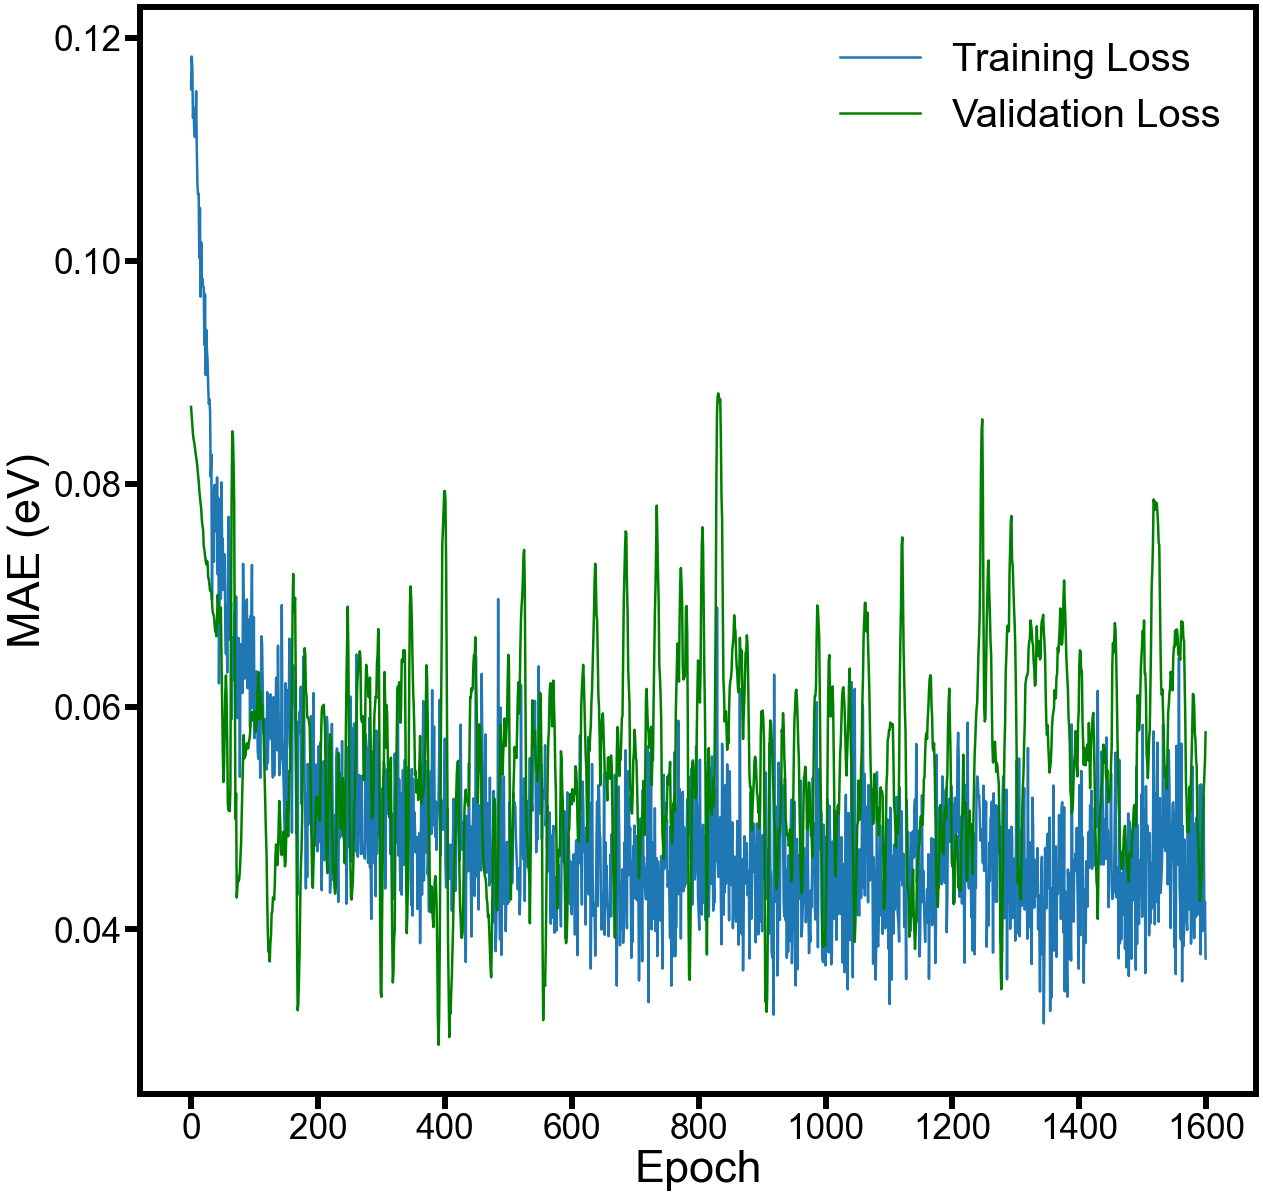

In [370]:
training_losses = model_history_mae.history['loss']
validation_losses = model_history_mae.history['val_loss']

fig, ax = plt.subplots()
plt.plot(training_losses, label="Training Loss", linewidth = 2.5)
plt.plot(validation_losses, label="Validation Loss", linewidth = 2.5, c='g')
#plt.title('Learning Curve', fontsize = 20)
ax.set_xlabel('Epoch', fontsize = 45)
ax.set_ylabel('MAE (eV)', fontsize = 45)

ax.tick_params(axis='x', colors='black', labelsize = 35, width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', labelsize = 35, width=6, length=15, color='black')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(6)

plt.legend(frameon=False, fontsize = 40);

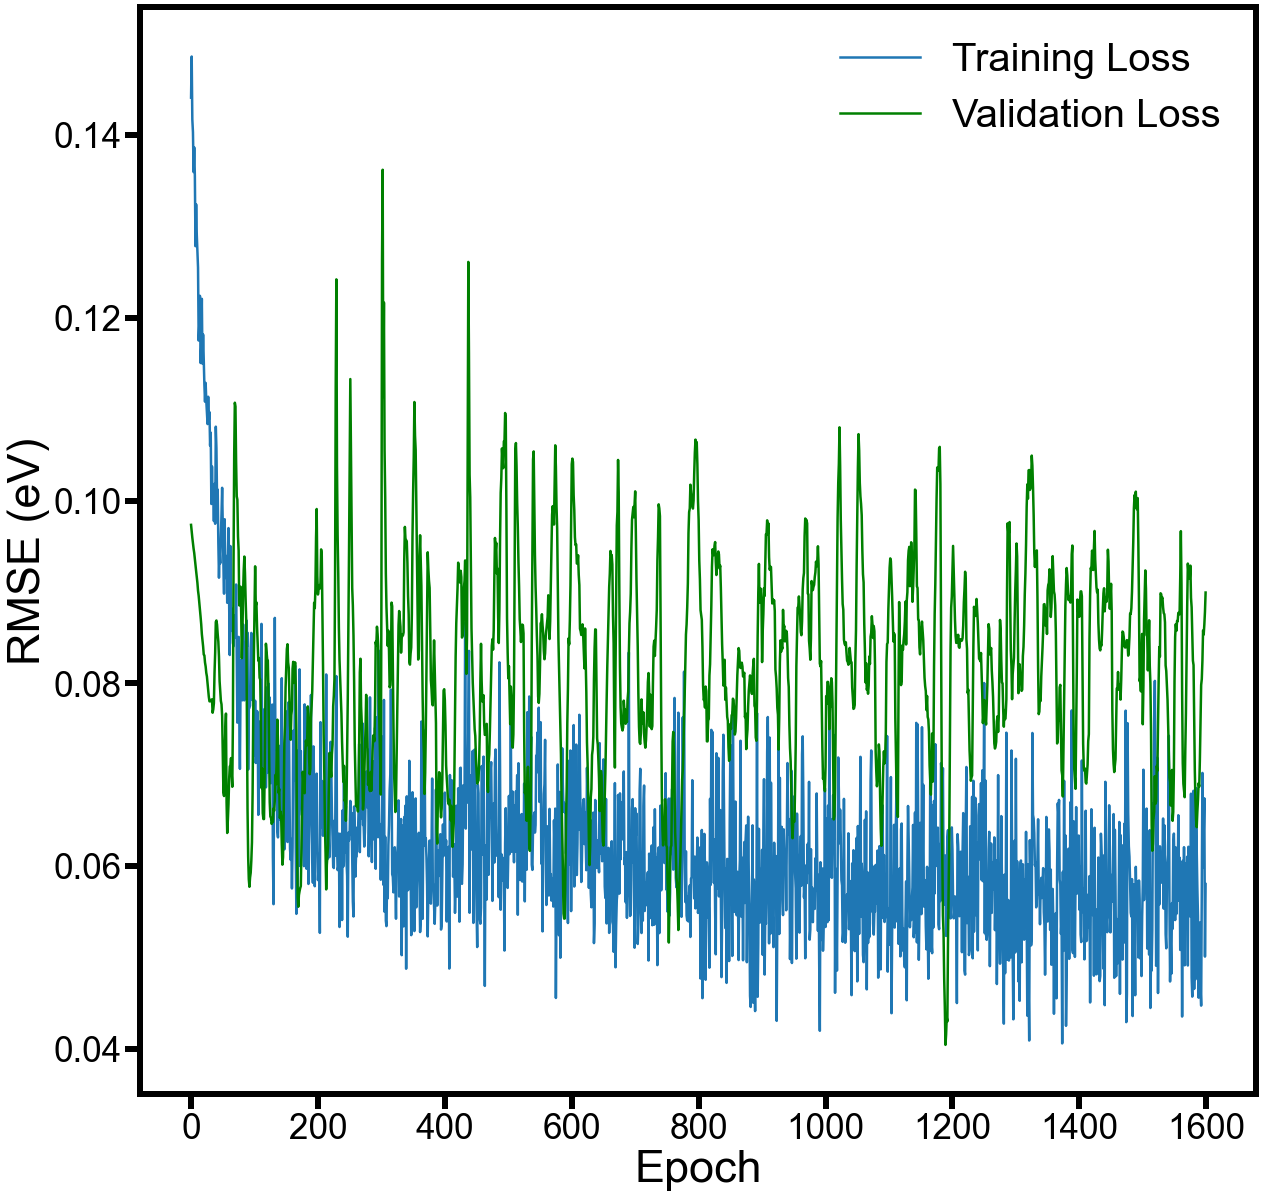

In [371]:
training_losses = model_history_rmse.history['loss']
validation_losses = model_history_rmse.history['val_loss']

fig, ax = plt.subplots()
plt.plot(training_losses, label="Training Loss", linewidth = 2.5)
plt.plot(validation_losses, label="Validation Loss", linewidth = 2.5, c='g')
#plt.title('Learning Curve', fontsize = 20)
ax.set_xlabel('Epoch', fontsize = 45)
ax.set_ylabel('RMSE (eV)', fontsize = 45)

ax.tick_params(axis='x', colors='black', labelsize = 35, width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', labelsize = 35, width=6, length=15, color='black')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(6)

plt.legend(frameon=False, fontsize = 40);

# 7. Regressor Performance Plots

In [331]:
GBR.fit(X_train, y_train)
KNR.fit(X_train, y_train)
RFR.fit(X_train, y_train)
SR.fit(X_train, y_train)
ridge.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
xgbr_optimized.fit(X_train, y_train)
light.fit(X_train, y_train)
nn = load_model('model_best_weights.h5', num_cols = len(features.columns))

In [332]:
def trendline(xd, yd, i, name, rmse, ax, order=1, c='k', alpha=1, Rval=False):
    """Make a line of best fit"""

    # Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    # Plot trendline
    if i <= 3:
        ax[0, i].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    if i > 3:
        ax[1, i - 4].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    # Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        # Plot R^2 value
        if i <= 3:
            ax[0, i].text(0.055, -0.055, name, fontsize=18)
            ax[0, i].text(0.055, -0.085, '$MAE = %0.3f$ eV' % mae, fontsize=18)
            ax[0, i].text(0.055, -0.115, '$RMSE = %0.3f$ eV' % rmse, fontsize=18)
            ax[0, i].text(0.055, -0.145, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
        if i > 3:
            ax[1, i - 4].text(0.055, -0.055, name, fontsize=18)
            ax[1, i - 4].text(0.055, -0.085, '$MAE = %0.3f$ eV' % mae, fontsize=18)
            ax[1, i - 4].text(0.055, -0.115, '$RMSE = %0.3f$ eV' % rmse, fontsize=18)
            ax[1, i - 4].text(0.055, -0.145, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
    else:
        # Return the R^2 value:
        return Rsqr


def plot_data(train_data, test_data, i, name, rmse, mae, ax):
    if i <= 3:
        # Plot data
        ax[0, i].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                         alpha=1, marker='o', s=35, facecolor = 'none', color='#1f77b4')
        
        ax[0, i].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                         alpha=1, marker='s', s=35, facecolor = 'none', color='#ff7f0e')
        ax[0, i].tick_params(axis='y', labelcolor='black', labelsize = 25, width=2, length=6, color='black', which='major')
        ax[0, i].tick_params(axis='x', labelcolor='black', labelsize = 25, width=2, length=6, color='black', which='major')
        
        for axis in ['top','bottom','left','right']:
            ax[0, i].spines[axis].set_linewidth(2)
        
        ax[0, i].set_yticks([-0.1, 0, 0.1, 0.2])
        ax[0, i].set_xticks([-0.1, 0, 0.1, 0.2])

        # Combine data for best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # plot legend/axis
        ax[0, i].legend(loc='upper left', fontsize=18, frameon=False)

    if i > 3:
        # Plot data
        ax[1, i - 4].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                             alpha=1, marker='o', s=35, facecolor = 'none', color='#1f77b4')
        ax[1, i - 4].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                             alpha=1, marker='s', s=35, facecolor = 'none', color='#ff7f0e')
        ax[1, i - 4].tick_params(axis='y', labelcolor='black', labelsize = 25, width=2, length=6, color='black', which='major')
        ax[1, i - 4].tick_params(axis='x', labelcolor='black', labelsize = 25, width=2, length=6, color='black', which='major')
        
        for axis in ['top','bottom','left','right']:
            ax[1, i - 4].spines[axis].set_linewidth(2)
        
        ax[1, i - 4].set_yticks([-0.1, 0, 0.1, 0.2])
        ax[1, i - 4].set_xticks([-0.1, 0, 0.1, 0.2])
        
        # Combine data to create best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # Plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # Plot legend/axis
        ax[1, i - 4].legend(loc='upper left', fontsize=18, frameon=False)

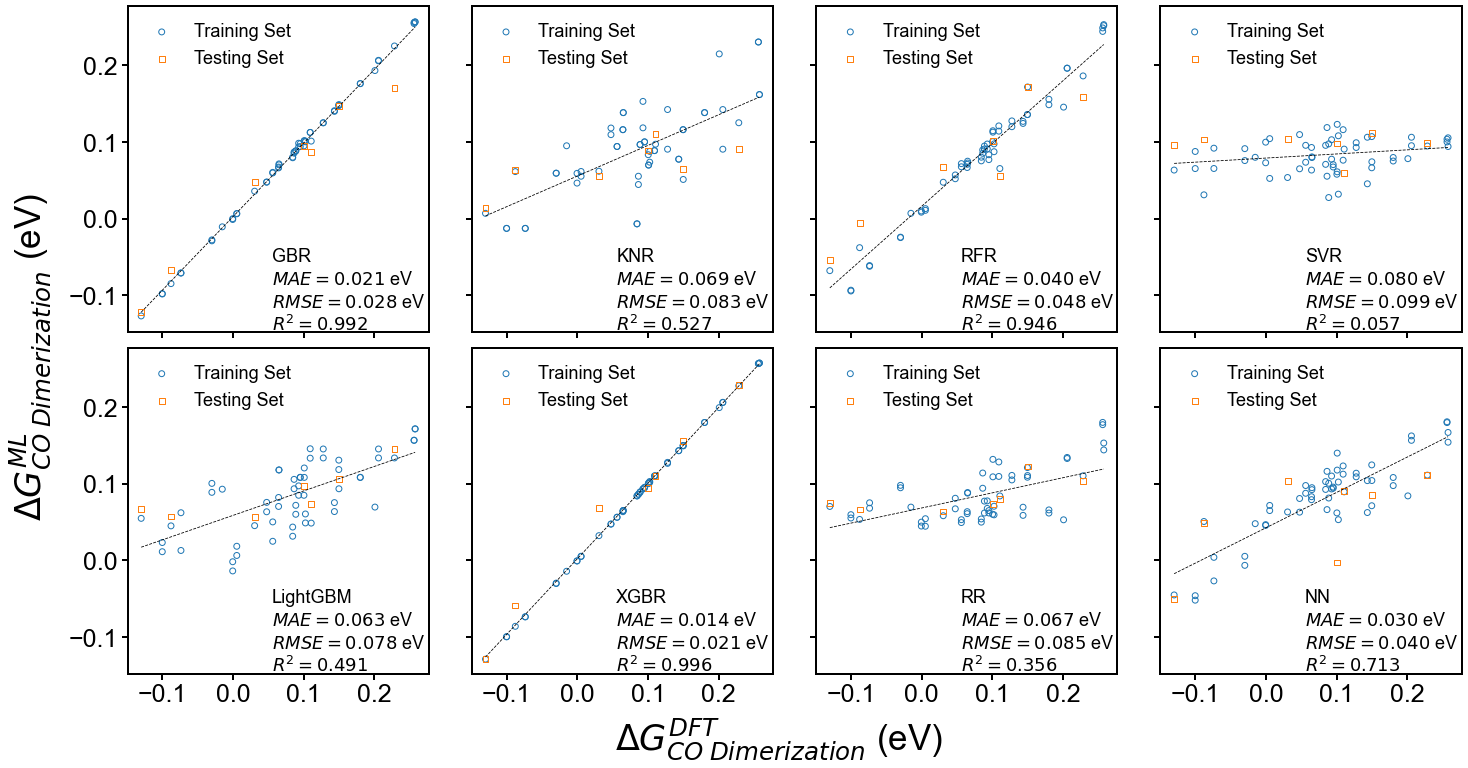

In [333]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex = True, sharey = True, figsize = (20, 10))

regressors = [GBR, KNR, RFR, SR, light, xgbr_optimized, ridge, nn]

names = {
    
    GBR: 'GBR',
    KNR: 'KNR',
    RFR: 'RFR',
    SR: 'SVR',
    light: 'LightGBM',
    xgbr_optimized: 'XGBR',
    ridge: 'RR',
    nn: 'NN'
    
}

RMSE = {
    
    GBR: results_df['GBR'][9][1],
    KNR: results_df['KNR'][9][1],
    RFR: results_df['RFR'][9][1],
    SR: results_df['SVR'][9][1],
    light: results_df['LightGBM'][9][1],
    xgbr_optimized: optimized_xgbr_rmse,
    ridge: results_df['RR'][9][1],
    nn: nn_RMSE
    
}

MAE = {
    
    GBR: results_df['GBR'][9][0],
    KNR: results_df['KNR'][9][0],
    RFR: results_df['RFR'][9][0],
    SR: results_df['SVR'][9][0],
    light: results_df['LightGBM'][9][0],
    xgbr_optimized: optimized_xgbr_mae,
    ridge: results_df['RR'][9][0],
    nn: nn_MAE
    
}

# Make Gco predictions on training and testing data using each regressor
for i, reg in enumerate(regressors):
    
    name = names[reg]
    rmse = RMSE[reg]
    mae = MAE[reg]
    
    
    # Predicting training data
    train_data = X_train.copy()
    train_data['G_co (eV)'] = y_train.copy()
    train_data['prediction'] = reg.predict(train_data.iloc[:, :-1])    
    
    # Predicting testing data
    test_data = X_test.copy()
    test_data['G_co (eV)'] = y_test.copy()
    test_data['prediction'] = reg.predict(test_data.iloc[:, :-1])    
    
    # Plotting the performance of each regressor
    plot_data(train_data, test_data, i, name, rmse, mae, ax)

fig.text(0.5, -0.03, r'$\Delta G_{CO\;Dimerization}^{DFT}$ (eV)', ha='center', va='center', fontsize = 35)
fig.text(-0.02, 0.5, r'$\Delta G_{CO\;Dimerization}^{ML}$ (eV)', ha='center', va='center', rotation='vertical', fontsize = 35)
fig.tight_layout(pad = 1);

# 8. XGBR Prediction on Full Dataset

In [373]:
prediction_df = pd.read_csv('CO Dimerization Full Data (with I).csv')

In [374]:
adsorbates = prediction_df[['Adsorbate 1', 'Adsorbate 2']]

In [375]:
prediction_df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_C2O2 - Gco
0,O,O,1.0,1.0,0.0,0.0,8.0,8.0,3.44,3.44,...,27.24,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,-0.01526
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.5,3.44,2.82,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.06446
2,O,N,1.0,1.0,0.0,0.0,8.0,7.0,3.44,3.04,...,28.15,0.48,10.50,0.45,198.13,2.36,56.25,30.25,198.11,NaN
3,O,NH,1.0,2.0,0.0,1.0,8.0,4.0,3.44,2.62,...,26.42,0.81,9.18,0.33,191.60,2.10,36.00,36.00,174.50,NaN
4,O,NH2,1.0,3.0,0.0,2.0,8.0,3.0,3.44,2.48,...,24.40,0.94,8.76,0.29,189.45,2.01,30.25,42.25,148.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,1.0,3.0,0.0,2.0,53.0,6.0,2.66,2.33,...,20.91,4.53,6.22,0.89,131.90,2.86,870.25,56.25,109.31,NaN
285,I,F,1.0,1.0,0.0,0.0,53.0,9.0,2.66,3.98,...,27.87,10.43,11.02,0.97,194.23,2.98,961.00,49.00,194.18,NaN
286,I,Cl,1.0,1.0,0.0,0.0,53.0,17.0,2.66,3.16,...,23.42,11.13,8.47,1.35,137.10,3.48,1225.00,49.00,137.12,NaN
287,I,Br,1.0,1.0,0.0,0.0,53.0,35.0,2.66,2.96,...,22.26,10.31,7.90,1.53,123.93,3.67,1936.00,49.00,123.88,NaN


In [376]:
# Savings the Gco column
targets = prediction_df['G_C2O2 - Gco']

In [377]:
diff = prediction_df.columns.difference(test_data.columns)

In [378]:
# Removing all columns that were deleted in feature selection to maintain the same prediction features as training
prediction_df = prediction_df.drop(prediction_df.columns.difference(test_data.columns), 1)

In [379]:
prediction_df.columns

Index(['Average Covalent Radius', 'Average IE',
       'Average num of Valence Electron',
       'Covalent Radius 1 minus Covalent Radius 2',
       'num of Valence 1 minus num of Valence 2'],
      dtype='object')

In [380]:
def scaler(df):
    
    base = pd.read_csv('CO Dimerization Full Data (with I).csv')
    base = base.drop(columns = ['Adsorbate 1', 'Adsorbate 2', 'G_C2O2 - Gco'])
    scales = {}
    for i in range(len(base.columns)):
        name = base.columns[i]
        minimum = min(base.iloc[:, i])
        maximum = max(base.iloc[:, i])
        scales[name] = [minimum, maximum]
    
    for i in range(len(df.columns)):
        name_1 = df.columns[i]
        if name_1 == 'G_C2O2 - Gco':
            pass
        else:
            for j, row in enumerate(df[name_1]):
                df.iloc[j, i] = (row - scales[name_1][0]) / (scales[name_1][1] - scales[name_1][0])
        
    return df


In [381]:
labels = ['$r_{cov, avg}$', '$IE_{avg}$', '# of V$E_{avg}$', 
               '$r_{cov, 1}$ $-$ $r_{cov, 2}$', '# of $VE_{1}$ $-$ # of $VE_{2}$']

In [382]:
prediction_df

,Average Covalent Radius,Average IE,Average num of Valence Electron,Covalent Radius 1 minus Covalent Radius 2,num of Valence 1 minus num of Valence 2
0,0.63,13.62,6.0,0.00,0.0
1,0.56,13.32,6.5,0.15,-1.0
2,0.67,14.08,5.5,-0.08,1.0
3,0.58,13.21,6.0,0.11,0.0
4,0.54,12.20,6.5,0.18,-1.0
...,...,...,...,...,...
284,0.95,10.46,7.5,0.77,-1.0
285,0.99,13.94,7.0,0.69,0.0
286,1.16,11.71,7.0,0.34,0.0
287,1.24,11.13,7.0,0.19,0.0


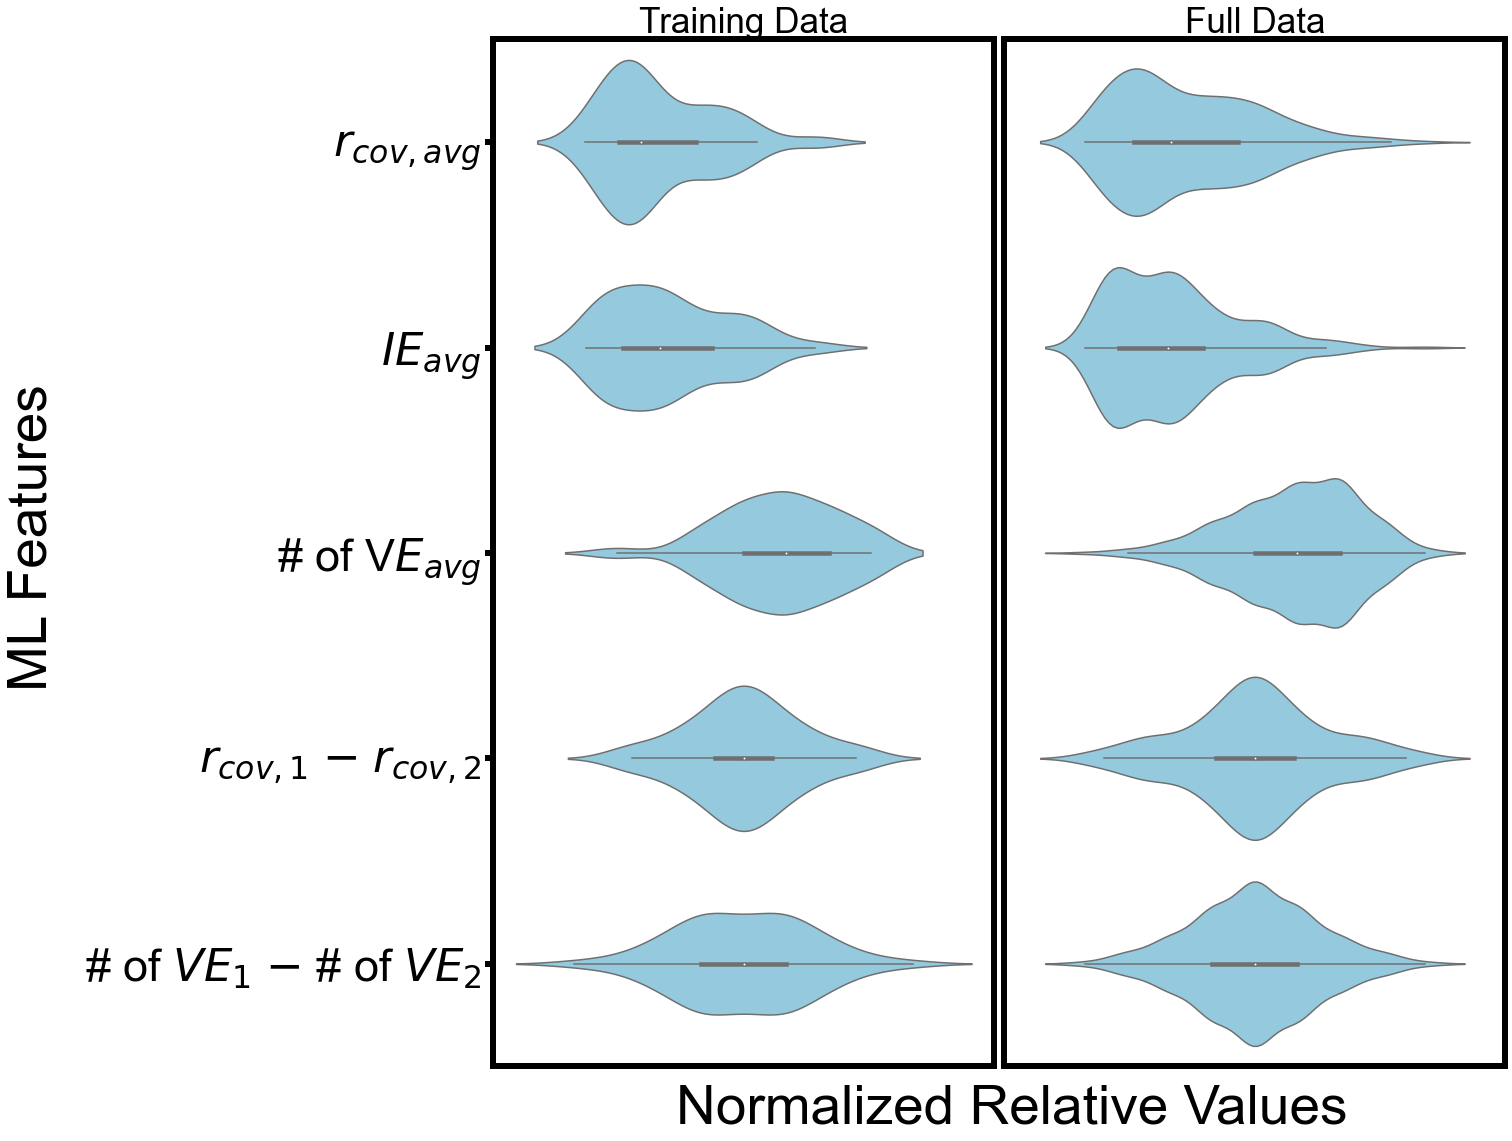

In [384]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (20, 15))

training_df = scaler(df_v9.copy())
training_df = training_df.iloc[:, :-1].melt(var_name='Features', value_name='Values')

full_df = scaler(prediction_df.copy())
full_df = full_df.melt(var_name='Features', value_name='Values')

sns.violinplot(x = 'Values', y = 'Features', data = training_df, ax=ax[0], color="skyblue").set(xticklabels=[], title='Training Data')
sns.violinplot(x = 'Values', y = 'Features', data = full_df, ax=ax[1], color="skyblue").set(xticklabels=[], title='Full Data')

ax[0].set_ylabel('')    
ax[0].set_xlabel('')
ax[1].set_ylabel('')    
ax[1].set_xlabel('')


ax[0].tick_params(axis='y', labelcolor='black', labelsize = 45, which='both', width=6, length=8)
ax[0].tick_params(axis='x', width=0, length=0)
ax[1].tick_params(width=0, length=0)
for axis in ['top','bottom','left','right']:
    ax[0].spines[axis].set_linewidth(6)
    ax[1].spines[axis].set_linewidth(6)

ax[0].set_yticklabels(labels)
    
ax[0].set_title('Training Data', fontsize=35)    
ax[1].set_title('Full Data', fontsize=35)

plt.xticks(fontsize=40)

fig.text(0.65, -0.03, 'Normalized Relative Values', ha='center', va='center', fontsize = 55)
fig.text(-0.03, 0.5, 'ML Features', ha='center', va='center', rotation='vertical', fontsize = 55)
fig.tight_layout(pad = 1);

In [345]:
# Adding the Gco column back
prediction_df['G_C2O2 - Gco'] = targets

In [346]:
def ml_predict(dataframe, name, reg):
    dataframe['Gc-c_ML'] = np.nan
    for i, col in enumerate(dataframe['Gc-c_ML']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-2]).T)

    dataframe['Gc-c_Final'] = dataframe[name]
    for i, col in enumerate(dataframe['Gc-c_Final']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-3]).T)

In [347]:
prediction_df

,Average Covalent Radius,Average IE,Average num of Valence Electron,Covalent Radius 1 minus Covalent Radius 2,num of Valence 1 minus num of Valence 2,G_C2O2 - Gco
0,0.63,13.62,6.0,0.00,0.0,-0.01526
1,0.56,13.32,6.5,0.15,-1.0,0.06446
2,0.67,14.08,5.5,-0.08,1.0,NaN
3,0.58,13.21,6.0,0.11,0.0,NaN
4,0.54,12.20,6.5,0.18,-1.0,NaN
...,...,...,...,...,...,...
284,0.95,10.46,7.5,0.77,-1.0,NaN
285,0.99,13.94,7.0,0.69,0.0,NaN
286,1.16,11.71,7.0,0.34,0.0,NaN
287,1.24,11.13,7.0,0.19,0.0,NaN


In [348]:
ml_predict(prediction_df, 'G_C2O2 - Gco' ,xgbr_optimized)

In [349]:
prediction_df

,Average Covalent Radius,Average IE,Average num of Valence Electron,Covalent Radius 1 minus Covalent Radius 2,num of Valence 1 minus num of Valence 2,G_C2O2 - Gco,Gc-c_ML,Gc-c_Final
0,0.63,13.62,6.0,0.00,0.0,-0.01526,-0.014155,-0.015260
1,0.56,13.32,6.5,0.15,-1.0,0.06446,0.063491,0.064460
2,0.67,14.08,5.5,-0.08,1.0,NaN,-0.063021,-0.063021
3,0.58,13.21,6.0,0.11,0.0,NaN,-0.004898,-0.004898
4,0.54,12.20,6.5,0.18,-1.0,NaN,0.097182,0.097182
...,...,...,...,...,...,...,...,...
284,0.95,10.46,7.5,0.77,-1.0,NaN,0.130622,0.130622
285,0.99,13.94,7.0,0.69,0.0,NaN,0.250090,0.250090
286,1.16,11.71,7.0,0.34,0.0,NaN,0.256636,0.256636
287,1.24,11.13,7.0,0.19,0.0,NaN,0.257144,0.257144


In [350]:
b = np.sqrt(((prediction_df['G_C2O2 - Gco'] - prediction_df['Gc-c_ML'])**2).mean()).round(4)

In [351]:
print('Training RMSE: {}'.format(optimized_xgbr_rmse.round(4)))
print('Testing RMSE: {}'.format(b))

Training RMSE: 0.0206
Testing RMSE: 0.0061


In [352]:
prediction_df['Gc-c_Final'].describe()

count    289.000000
mean       0.101508
std        0.090130
min       -0.130060
25%        0.041238
50%        0.100370
75%        0.149857
max        0.278123
Name: Gc-c_Final, dtype: float64

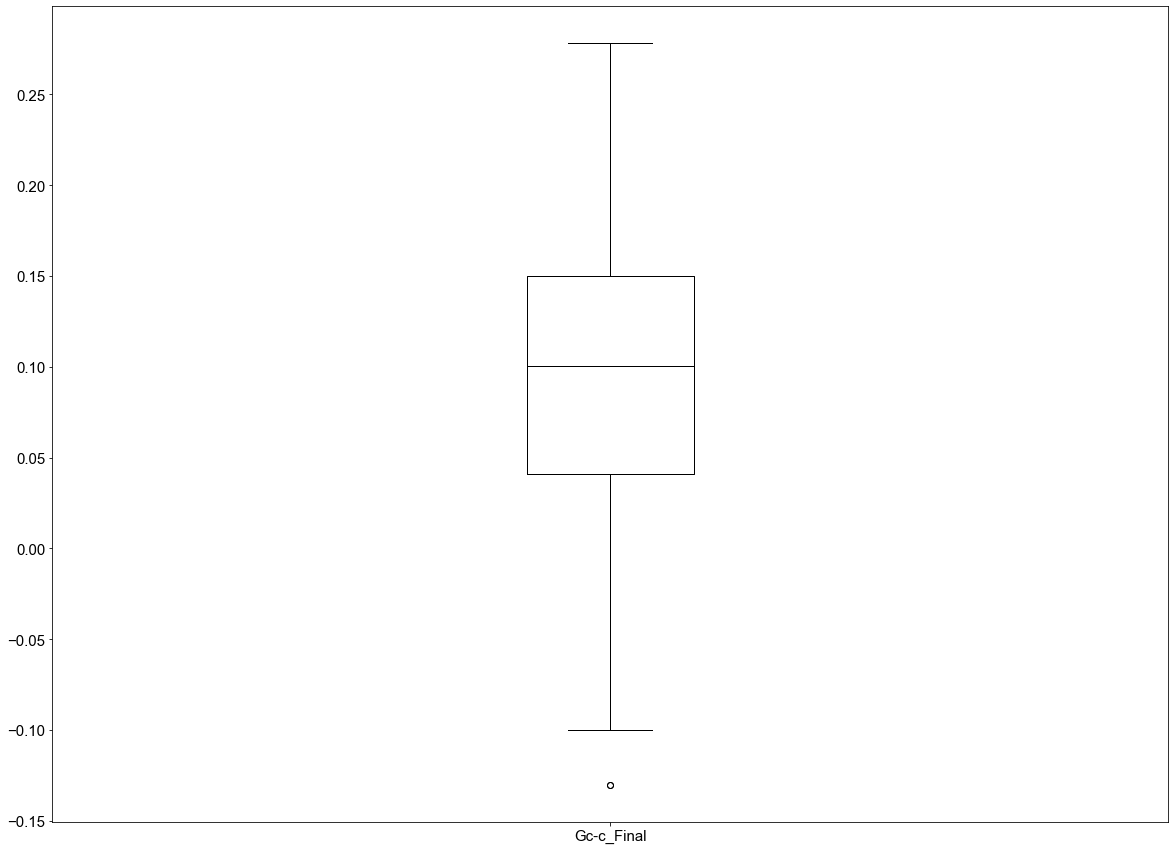

In [353]:
prediction_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='Gc-c_Final', grid=False, figsize=(20, 15));

In [354]:
final = adsorbates.join(prediction_df, how = 'left')

In [355]:
final

,Adsorbate 1,Adsorbate 2,Average Covalent Radius,Average IE,Average num of Valence Electron,Covalent Radius 1 minus Covalent Radius 2,num of Valence 1 minus num of Valence 2,G_C2O2 - Gco,Gc-c_ML,Gc-c_Final
0,O,O,0.63,13.62,6.0,0.00,0.0,-0.01526,-0.014155,-0.015260
1,O,OH,0.56,13.32,6.5,0.15,-1.0,0.06446,0.063491,0.064460
2,O,N,0.67,14.08,5.5,-0.08,1.0,NaN,-0.063021,-0.063021
3,O,NH,0.58,13.21,6.0,0.11,0.0,NaN,-0.004898,-0.004898
4,O,NH2,0.54,12.20,6.5,0.18,-1.0,NaN,0.097182,0.097182
...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,0.95,10.46,7.5,0.77,-1.0,NaN,0.130622,0.130622
285,I,F,0.99,13.94,7.0,0.69,0.0,NaN,0.250090,0.250090
286,I,Cl,1.16,11.71,7.0,0.34,0.0,NaN,0.256636,0.256636
287,I,Br,1.24,11.13,7.0,0.19,0.0,NaN,0.257144,0.257144


In [356]:
# Save the predicted dataframe
final.to_csv('predicted_Gc-c_xgbr.csv')

# 9. Full Data Heat Map

In [357]:
adsorbates = final['Adsorbate 1'].unique()
dim_energy = final['Gc-c_Final']

In [358]:
def transform_2D(series):
    result = []
    temp = []
    count = 1
    for i in series:
        if count % 18 != 0:
            temp.append(i)
            count += 1
        else:
            count = 1
            result.append(temp)
            temp = []
            temp.append(i)
            count += 1
    result.append(temp)
    return result

In [359]:
# Transform series into a 2D array
twoD = transform_2D(dim_energy)

In [360]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib.colors import ListedColormap




#Plotting
trace = go.Heatmap(z = twoD,
                   x = adsorbates,
                   y = adsorbates,
                   colorscale = 'YlOrBr',
                   colorbar   = dict(title = "Delta_Gc-c",
                                     titleside = "right"
                                    )
                  )

layout = go.Layout(dict(title = "Gc-c for different adsorbate combinations",
                        autosize = False,
                        height  = 1000,
                        width   = 1000,
                        yaxis   = dict(tickfont = dict(size = 15)),
                        xaxis   = dict(tickfont = dict(size = 15))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

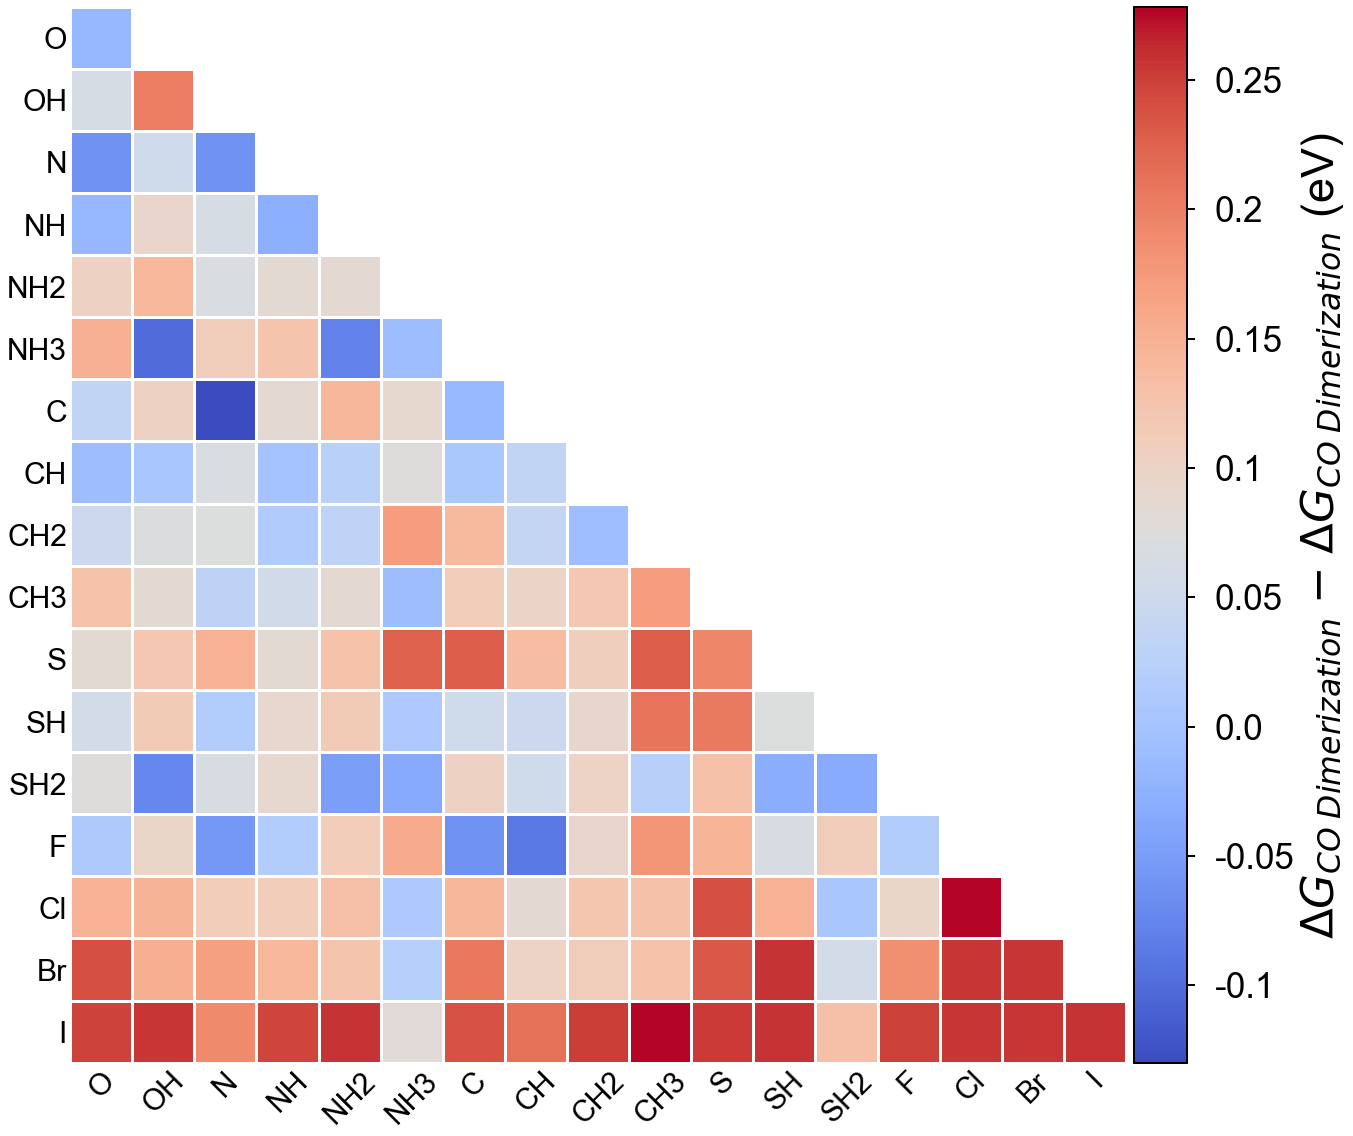

In [366]:
import matplotlib

cmap1 = matplotlib.colors.ListedColormap(['g'])
mask = np.tril(np.ones_like(twoD, dtype=bool))

ax = sns.heatmap(twoD, linewidth=2, mask = 1 - mask,
                 cmap = "coolwarm", square = True, cbar = False)
ax.figure.axes[-1].yaxis.label.set_size(30)

#ax = sns.heatmap(twoD, linewidth=2, mask = np.array(twoD) < 0.3, cmap = cmap1, square = True, cbar=False)

ax.set_xticklabels(adsorbates, rotation = 45, size = 30)
ax.set_yticklabels(adsorbates, rotation = 0, size = 30)

ax.tick_params(axis='x', colors='black', width=0, length=0, color='black')
ax.tick_params(axis='y', colors='black', width=0, length=0, color='black') 

divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1) 
cbar = plt.colorbar(ax.collections[0], cax=cax)
cbar.set_ticks([-0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2, 0.25])
cbar.ax.set_yticklabels(['-0.1', '-0.05',  '0.0', '0.05', '0.1', '0.15', '0.2', '0.25'], size=35)
cbar.ax.set_ylabel('$\Delta G_{CO \; Dimerization}$ $-$ $\Delta G_{CO\;Dimerization}$ (eV)', fontsize = 45)
cbar.ax.tick_params(axis='y', which='major', length=8, width = 2, pad=20)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)

plt.show()